In [105]:
%run function_and_library.ipynb

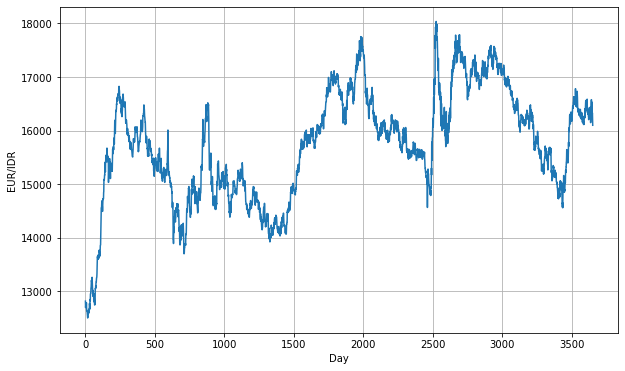

In [106]:
# Initialize lists
time_step = []
sunspots = []

# Open CSV file
with open('./currency_data_10_years.csv') as csvfile:
  
    # Initialize reader
    reader = csv.reader(csvfile, delimiter=',')

    # Skip the first line
    next(reader)

    # Append row and sunspot number to lists
    for i,row in enumerate(reader):
        time_step.append(int(i))
        sunspots.append(float(row[1]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(sunspots)

# Preview the data
plot_series(time, series, xlabel='Day', ylabel='EUR/IDR')

In [108]:
split_time = 3000

x_train = series[:split_time]
time_train = time[:split_time]

x_valid = series[split_time:]
time_valid = time[split_time:]

window_size = 30
batch_size = 128
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [4]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_1")

# Get initial weights
init_weights = model_1.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_1.set_weights(init_weights)

model_1.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_1.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_1 = model_1.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_1.name)])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     17/Unknown - 4s 30ms/step - loss: 16679.0898 - mae: 16679.5898

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 14s 476ms/step - loss: 16593.1504 - mae: 16593.6504 - val_loss: 16059.1367 - val_mae: 16059.6357
Epoch 2/100
20/24 [========================>.....] - ETA: 0s - loss: 15656.9111 - mae: 15657.4111

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 7s 253ms/step - loss: 15723.1982 - mae: 15723.6982 - val_loss: 15908.5664 - val_mae: 15909.0674
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 15581.2969 - mae: 15581.7969

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 114ms/step - loss: 15581.2969 - mae: 15581.7969 - val_loss: 15675.0850 - val_mae: 15675.5859
Epoch 4/100
15/24 [=================>............] - ETA: 0s - loss: 14968.4893 - mae: 14968.9893

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 106ms/step - loss: 15058.8057 - mae: 15059.3047 - val_loss: 14611.3467 - val_mae: 14611.8457
Epoch 5/100
17/24 [====================>.........] - ETA: 0s - loss: 13401.4834 - mae: 13401.9834

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 134ms/step - loss: 13114.8838 - mae: 13115.3848 - val_loss: 11284.8809 - val_mae: 11285.3818
Epoch 6/100
15/24 [=================>............] - ETA: 0s - loss: 9158.9395 - mae: 9159.4395

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 110ms/step - loss: 7920.1206 - mae: 7920.6211 - val_loss: 3105.2295 - val_mae: 3105.7295
Epoch 7/100
15/24 [=================>............] - ETA: 0s - loss: 1337.5894 - mae: 1338.0894

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 90ms/step - loss: 1064.6960 - mae: 1065.1960 - val_loss: 647.4288 - val_mae: 647.9288
Epoch 8/100
15/24 [=================>............] - ETA: 0s - loss: 347.0299 - mae: 347.5298

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 106ms/step - loss: 321.0249 - mae: 321.5248 - val_loss: 233.9361 - val_mae: 234.4358
Epoch 9/100
15/24 [=================>............] - ETA: 0s - loss: 225.3783 - mae: 225.8778

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 93ms/step - loss: 219.1384 - mae: 219.6379 - val_loss: 175.3943 - val_mae: 175.8943
Epoch 10/100
15/24 [=================>............] - ETA: 0s - loss: 212.9597 - mae: 213.4594

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 107ms/step - loss: 211.0892 - mae: 211.5887 - val_loss: 159.2980 - val_mae: 159.7969
Epoch 11/100
24/24 [==============================] - 1s 32ms/step - loss: 216.9479 - mae: 217.4468 - val_loss: 165.8519 - val_mae: 166.3519
Epoch 12/100
24/24 [==============================] - 1s 49ms/step - loss: 219.9896 - mae: 220.4886 - val_loss: 162.1945 - val_mae: 162.6945
Epoch 13/100
24/24 [==============================] - 2s 58ms/step - loss: 214.5488 - mae: 215.0481 - val_loss: 169.2796 - val_mae: 169.7795
Epoch 14/100
24/24 [==============================] - 1s 34ms/step - loss: 213.8208 - mae: 214.3198 - val_loss: 165.1397 - val_mae: 165.6390
Epoch 15/100
17/24 [====================>.........] - ETA: 0s - loss: 215.9263 - mae: 216.4262

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 105ms/step - loss: 215.0775 - mae: 215.5773 - val_loss: 157.2509 - val_mae: 157.7503
Epoch 16/100
16/24 [===================>..........] - ETA: 0s - loss: 209.5244 - mae: 210.0239

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 115ms/step - loss: 210.9956 - mae: 211.4953 - val_loss: 157.1428 - val_mae: 157.6424
Epoch 17/100
24/24 [==============================] - 1s 33ms/step - loss: 210.9207 - mae: 211.4203 - val_loss: 157.7619 - val_mae: 158.2615
Epoch 18/100
24/24 [==============================] - 1s 33ms/step - loss: 209.9223 - mae: 210.4216 - val_loss: 157.9468 - val_mae: 158.4467
Epoch 19/100
24/24 [==============================] - 1s 34ms/step - loss: 209.1272 - mae: 209.6268 - val_loss: 158.9772 - val_mae: 159.4759
Epoch 20/100
24/24 [==============================] - 1s 39ms/step - loss: 209.1725 - mae: 209.6720 - val_loss: 158.4743 - val_mae: 158.9743
Epoch 21/100
16/24 [===================>..........] - ETA: 0s - loss: 209.5572 - mae: 210.0569

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 4s 132ms/step - loss: 207.6602 - mae: 208.1598 - val_loss: 156.1654 - val_mae: 156.6654
Epoch 22/100
21/24 [=========================>....] - ETA: 0s - loss: 215.1416 - mae: 215.6409

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 5s 191ms/step - loss: 211.6516 - mae: 212.1510 - val_loss: 155.3193 - val_mae: 155.8192
Epoch 23/100
24/24 [==============================] - 2s 41ms/step - loss: 207.0857 - mae: 207.5852 - val_loss: 155.6889 - val_mae: 156.1878
Epoch 24/100
24/24 [==============================] - 1s 38ms/step - loss: 206.5037 - mae: 207.0033 - val_loss: 163.0009 - val_mae: 163.4995
Epoch 25/100
24/24 [==============================] - 1s 29ms/step - loss: 207.7299 - mae: 208.2293 - val_loss: 156.0531 - val_mae: 156.5522
Epoch 26/100
16/24 [===================>..........] - ETA: 0s - loss: 211.6147 - mae: 212.1144

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 93ms/step - loss: 208.9621 - mae: 209.4616 - val_loss: 154.6932 - val_mae: 155.1921
Epoch 27/100
24/24 [==============================] - 1s 37ms/step - loss: 204.7473 - mae: 205.2469 - val_loss: 165.8204 - val_mae: 166.3198
Epoch 28/100
15/24 [=================>............] - ETA: 0s - loss: 210.0845 - mae: 210.5840

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 117ms/step - loss: 212.5265 - mae: 213.0261 - val_loss: 153.8563 - val_mae: 154.3545
Epoch 29/100
24/24 [==============================] - 1s 37ms/step - loss: 205.4677 - mae: 205.9667 - val_loss: 164.6868 - val_mae: 165.1868
Epoch 30/100
24/24 [==============================] - 1s 33ms/step - loss: 208.3380 - mae: 208.8374 - val_loss: 159.9175 - val_mae: 160.4173
Epoch 31/100
24/24 [==============================] - 1s 38ms/step - loss: 212.1001 - mae: 212.5996 - val_loss: 158.7858 - val_mae: 159.2849
Epoch 32/100
15/24 [=================>............] - ETA: 0s - loss: 205.6606 - mae: 206.1597

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 4s 157ms/step - loss: 203.3819 - mae: 203.8812 - val_loss: 152.4826 - val_mae: 152.9817
Epoch 33/100
15/24 [=================>............] - ETA: 0s - loss: 200.0377 - mae: 200.5373

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 116ms/step - loss: 201.4221 - mae: 201.9216 - val_loss: 152.1722 - val_mae: 152.6718
Epoch 34/100
24/24 [==============================] - 1s 32ms/step - loss: 204.7366 - mae: 205.2360 - val_loss: 154.7833 - val_mae: 155.2819
Epoch 35/100
24/24 [==============================] - 1s 33ms/step - loss: 202.5801 - mae: 203.0799 - val_loss: 155.8184 - val_mae: 156.3177
Epoch 36/100
24/24 [==============================] - 1s 30ms/step - loss: 200.4300 - mae: 200.9297 - val_loss: 176.5288 - val_mae: 177.0278
Epoch 37/100
24/24 [==============================] - 1s 33ms/step - loss: 205.8886 - mae: 206.3883 - val_loss: 152.8674 - val_mae: 153.3665
Epoch 38/100
24/24 [==============================] - 1s 29ms/step - loss: 204.8911 - mae: 205.3905 - val_loss: 156.8025 - val_mae: 157.3015
Epoch 39/100
24/24 [==============================] - 1s 27ms/step - loss: 200.6021 - mae: 201.1017 - val_loss: 159.1436 - val_mae: 159.6435
Epoch 40/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 95ms/step - loss: 202.1208 - mae: 202.6199 - val_loss: 149.6855 - val_mae: 150.1853
Epoch 42/100
16/24 [===================>..........] - ETA: 0s - loss: 201.5807 - mae: 202.0804

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 82ms/step - loss: 198.3373 - mae: 198.8370 - val_loss: 149.2387 - val_mae: 149.7387
Epoch 43/100
24/24 [==============================] - 1s 31ms/step - loss: 197.3271 - mae: 197.8266 - val_loss: 153.7502 - val_mae: 154.2500
Epoch 44/100
24/24 [==============================] - 1s 30ms/step - loss: 197.3327 - mae: 197.8325 - val_loss: 150.1204 - val_mae: 150.6199
Epoch 45/100
24/24 [==============================] - 1s 30ms/step - loss: 197.1661 - mae: 197.6655 - val_loss: 159.4283 - val_mae: 159.9283
Epoch 46/100
15/24 [=================>............] - ETA: 0s - loss: 202.6548 - mae: 203.1540

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 108ms/step - loss: 198.8902 - mae: 199.3892 - val_loss: 147.8382 - val_mae: 148.3366
Epoch 47/100
24/24 [==============================] - 1s 22ms/step - loss: 197.4631 - mae: 197.9627 - val_loss: 147.8550 - val_mae: 148.3543
Epoch 48/100
24/24 [==============================] - 1s 24ms/step - loss: 195.8602 - mae: 196.3598 - val_loss: 168.1418 - val_mae: 168.6418
Epoch 49/100
15/24 [=================>............] - ETA: 0s - loss: 206.3986 - mae: 206.8983

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 4s 169ms/step - loss: 206.2900 - mae: 206.7896 - val_loss: 146.7074 - val_mae: 147.2068
Epoch 50/100
16/24 [===================>..........] - ETA: 0s - loss: 204.8143 - mae: 205.3134

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 96ms/step - loss: 199.1337 - mae: 199.6330 - val_loss: 146.6821 - val_mae: 147.1816
Epoch 51/100
24/24 [==============================] - 1s 31ms/step - loss: 194.4594 - mae: 194.9589 - val_loss: 151.1517 - val_mae: 151.6517
Epoch 52/100
24/24 [==============================] - 1s 30ms/step - loss: 196.7312 - mae: 197.2309 - val_loss: 152.7647 - val_mae: 153.2640
Epoch 53/100
24/24 [==============================] - 1s 37ms/step - loss: 195.0361 - mae: 195.5356 - val_loss: 203.5524 - val_mae: 204.0517
Epoch 54/100
15/24 [=================>............] - ETA: 0s - loss: 211.2970 - mae: 211.7968

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 85ms/step - loss: 204.7167 - mae: 205.2165 - val_loss: 146.3265 - val_mae: 146.8264
Epoch 55/100
16/24 [===================>..........] - ETA: 0s - loss: 197.8394 - mae: 198.3390

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 73ms/step - loss: 194.6515 - mae: 195.1510 - val_loss: 144.6588 - val_mae: 145.1571
Epoch 56/100
24/24 [==============================] - 1s 31ms/step - loss: 194.3909 - mae: 194.8906 - val_loss: 149.2159 - val_mae: 149.7157
Epoch 57/100
24/24 [==============================] - ETA: 0s - loss: 193.0688 - mae: 193.5680

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 126ms/step - loss: 193.0688 - mae: 193.5680 - val_loss: 143.7041 - val_mae: 144.2032
Epoch 58/100
24/24 [==============================] - 2s 42ms/step - loss: 191.1787 - mae: 191.6781 - val_loss: 151.9940 - val_mae: 152.4940
Epoch 59/100
24/24 [==============================] - 1s 36ms/step - loss: 191.0917 - mae: 191.5913 - val_loss: 166.4184 - val_mae: 166.9183
Epoch 60/100
19/24 [======================>.......] - ETA: 0s - loss: 191.5353 - mae: 192.0346

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 109ms/step - loss: 191.6224 - mae: 192.1219 - val_loss: 143.3297 - val_mae: 143.8289
Epoch 61/100
24/24 [==============================] - 2s 32ms/step - loss: 187.6491 - mae: 188.1481 - val_loss: 161.5863 - val_mae: 162.0852
Epoch 62/100
24/24 [==============================] - 1s 36ms/step - loss: 195.0275 - mae: 195.5270 - val_loss: 175.8242 - val_mae: 176.3233
Epoch 63/100
16/24 [===================>..........] - ETA: 0s - loss: 212.0293 - mae: 212.5285

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 89ms/step - loss: 201.6815 - mae: 202.1809 - val_loss: 141.7526 - val_mae: 142.2523
Epoch 64/100
15/24 [=================>............] - ETA: 0s - loss: 193.2261 - mae: 193.7257

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 4s 137ms/step - loss: 188.8694 - mae: 189.3689 - val_loss: 141.0128 - val_mae: 141.5122
Epoch 65/100
24/24 [==============================] - 1s 35ms/step - loss: 188.4168 - mae: 188.9165 - val_loss: 147.0567 - val_mae: 147.5555
Epoch 66/100
24/24 [==============================] - 1s 35ms/step - loss: 187.1058 - mae: 187.6052 - val_loss: 153.9210 - val_mae: 154.4203
Epoch 67/100
24/24 [==============================] - 1s 44ms/step - loss: 188.6082 - mae: 189.1073 - val_loss: 143.1527 - val_mae: 143.6526
Epoch 68/100
24/24 [==============================] - 2s 46ms/step - loss: 183.6376 - mae: 184.1367 - val_loss: 149.0209 - val_mae: 149.5209
Epoch 69/100
24/24 [==============================] - 1s 35ms/step - loss: 186.4789 - mae: 186.9778 - val_loss: 141.1498 - val_mae: 141.6486
Epoch 70/100
24/24 [==============================] - 1s 27ms/step - loss: 183.9581 - mae: 184.4577 - val_loss: 155.6663 - val_mae: 156.1653
Epoch 71/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 74ms/step - loss: 184.7178 - mae: 185.2173 - val_loss: 136.8146 - val_mae: 137.3145
Epoch 76/100
24/24 [==============================] - 1s 24ms/step - loss: 179.6017 - mae: 180.1005 - val_loss: 141.5018 - val_mae: 142.0008
Epoch 77/100
15/24 [=================>............] - ETA: 0s - loss: 180.4691 - mae: 180.9682

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 104ms/step - loss: 178.5440 - mae: 179.0432 - val_loss: 135.8146 - val_mae: 136.3128
Epoch 78/100
24/24 [==============================] - 1s 29ms/step - loss: 179.6700 - mae: 180.1693 - val_loss: 135.8925 - val_mae: 136.3925
Epoch 79/100
16/24 [===================>..........] - ETA: 0s - loss: 183.0501 - mae: 183.5496

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 84ms/step - loss: 181.7529 - mae: 182.2525 - val_loss: 134.9931 - val_mae: 135.4924
Epoch 80/100
24/24 [==============================] - 1s 31ms/step - loss: 180.1580 - mae: 180.6574 - val_loss: 153.2757 - val_mae: 153.7752
Epoch 81/100
24/24 [==============================] - 1s 36ms/step - loss: 180.3198 - mae: 180.8191 - val_loss: 136.6413 - val_mae: 137.1413
Epoch 82/100
24/24 [==============================] - 1s 40ms/step - loss: 178.4563 - mae: 178.9555 - val_loss: 154.9539 - val_mae: 155.4534
Epoch 83/100
24/24 [==============================] - 1s 34ms/step - loss: 176.5182 - mae: 177.0175 - val_loss: 142.6765 - val_mae: 143.1765
Epoch 84/100
24/24 [==============================] - 1s 45ms/step - loss: 181.2429 - mae: 181.7422 - val_loss: 143.5748 - val_mae: 144.0737
Epoch 85/100
24/24 [==============================] - ETA: 0s - loss: 174.3034 - mae: 174.8031

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 3s 108ms/step - loss: 174.3034 - mae: 174.8031 - val_loss: 134.6693 - val_mae: 135.1686
Epoch 86/100
15/24 [=================>............] - ETA: 0s - loss: 174.5803 - mae: 175.0798

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 72ms/step - loss: 175.7480 - mae: 176.2476 - val_loss: 133.8776 - val_mae: 134.3762
Epoch 87/100
24/24 [==============================] - 1s 26ms/step - loss: 176.1738 - mae: 176.6731 - val_loss: 134.5872 - val_mae: 135.0862
Epoch 88/100
24/24 [==============================] - ETA: 0s - loss: 173.5250 - mae: 174.0245

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 97ms/step - loss: 173.5250 - mae: 174.0245 - val_loss: 133.3354 - val_mae: 133.8341
Epoch 89/100
16/24 [===================>..........] - ETA: 0s - loss: 176.3169 - mae: 176.8167

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 75ms/step - loss: 174.4259 - mae: 174.9254 - val_loss: 130.6788 - val_mae: 131.1774
Epoch 90/100
24/24 [==============================] - 1s 35ms/step - loss: 175.9229 - mae: 176.4224 - val_loss: 159.0157 - val_mae: 159.5153
Epoch 91/100
24/24 [==============================] - 1s 41ms/step - loss: 172.7133 - mae: 173.2126 - val_loss: 132.8577 - val_mae: 133.3569
Epoch 92/100
24/24 [==============================] - 1s 30ms/step - loss: 171.0047 - mae: 171.5044 - val_loss: 134.1963 - val_mae: 134.6951
Epoch 93/100
24/24 [==============================] - 1s 36ms/step - loss: 169.8915 - mae: 170.3907 - val_loss: 142.3051 - val_mae: 142.8047
Epoch 94/100
24/24 [==============================] - 1s 27ms/step - loss: 170.3820 - mae: 170.8812 - val_loss: 137.2741 - val_mae: 137.7735
Epoch 95/100
24/24 [==============================] - 1s 28ms/step - loss: 168.2099 - mae: 168.7094 - val_loss: 134.4874 - val_mae: 134.9873
Epoch 96/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 79ms/step - loss: 167.3984 - mae: 167.8979 - val_loss: 127.1824 - val_mae: 127.6799
Epoch 98/100
24/24 [==============================] - 1s 24ms/step - loss: 167.6654 - mae: 168.1650 - val_loss: 134.5950 - val_mae: 135.0950
Epoch 99/100
24/24 [==============================] - 1s 23ms/step - loss: 166.0231 - mae: 166.5220 - val_loss: 138.8028 - val_mae: 139.3023
Epoch 100/100
24/24 [==============================] - 1s 23ms/step - loss: 166.6276 - mae: 167.1273 - val_loss: 151.8898 - val_mae: 152.3898


5/5 [==============================] - 0s 13ms/step - loss: 127.1824 - mae: 127.6799


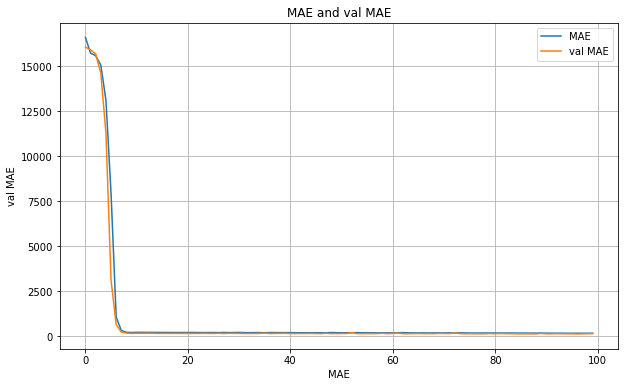

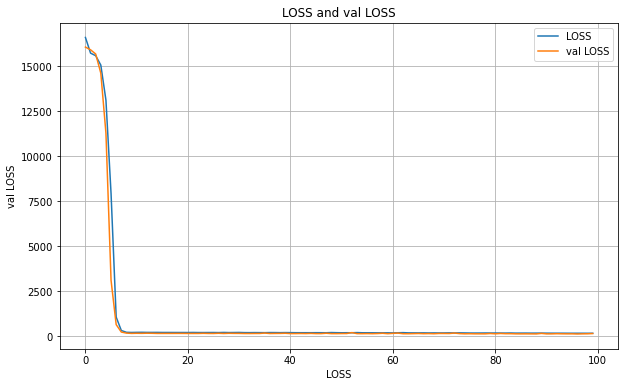

6/6 [==============================] - 0s 44ms/step


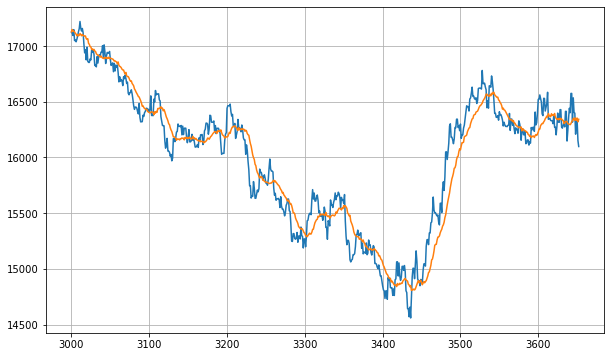

{'mae': 125.148796,
 'mse': 26133.807,
 'rmse': 161.65955,
 'mape': 0.7871754,
 'mase': 2.4182568}

In [5]:
# Load in best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1/")
model_1.evaluate(valid_set)

# Get mae and loss from history log
mae=history_1.history['mae']
val_mae=history_1.history['val_mae']
loss=history_1.history['loss']
val_loss=history_1.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_1, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_1 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_1))

eval_model_1 = evaluate_preds(y_true=x_valid,
                               y_pred=results_1)
eval_model_1

In [6]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_2")

# Get initial weights
init_weights = model_2.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_2.set_weights(init_weights)

model_2.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_2.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_2 = model_2.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_2.name)])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     21/Unknown - 2s 24ms/step - loss: 5234.7075 - mae: 5235.2075

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 4s 97ms/step - loss: 4811.9302 - mae: 4812.4302 - val_loss: 2037.2173 - val_mae: 2037.7173
Epoch 2/100
15/24 [=================>............] - ETA: 0s - loss: 928.5067 - mae: 929.0067  

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 3s 95ms/step - loss: 812.3265 - mae: 812.8265 - val_loss: 444.4894 - val_mae: 444.9894
Epoch 3/100
19/24 [======================>.......] - ETA: 0s - loss: 314.7089 - mae: 315.2089

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 78ms/step - loss: 295.1562 - mae: 295.6562 - val_loss: 159.5251 - val_mae: 160.0251
Epoch 4/100
21/24 [=========================>....] - ETA: 0s - loss: 222.1108 - mae: 222.6101

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 86ms/step - loss: 222.9670 - mae: 223.4663 - val_loss: 158.6661 - val_mae: 159.1653
Epoch 5/100
24/24 [==============================] - 1s 33ms/step - loss: 209.2252 - mae: 209.7249 - val_loss: 166.6666 - val_mae: 167.1666
Epoch 6/100
24/24 [==============================] - 1s 33ms/step - loss: 196.9836 - mae: 197.4828 - val_loss: 184.1636 - val_mae: 184.6634
Epoch 7/100
15/24 [=================>............] - ETA: 0s - loss: 226.7155 - mae: 227.2149

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 80ms/step - loss: 215.7048 - mae: 216.2043 - val_loss: 146.3632 - val_mae: 146.8628
Epoch 8/100
23/24 [===========================>..] - ETA: 0s - loss: 219.4254 - mae: 219.9251

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 4s 143ms/step - loss: 219.7660 - mae: 220.2657 - val_loss: 143.6452 - val_mae: 144.1445
Epoch 9/100
24/24 [==============================] - 1s 32ms/step - loss: 207.5046 - mae: 208.0040 - val_loss: 228.7662 - val_mae: 229.2662
Epoch 10/100
24/24 [==============================] - 1s 27ms/step - loss: 218.7754 - mae: 219.2749 - val_loss: 177.3998 - val_mae: 177.8995
Epoch 11/100
24/24 [==============================] - 1s 32ms/step - loss: 172.4742 - mae: 172.9738 - val_loss: 222.6847 - val_mae: 223.1840
Epoch 12/100
24/24 [==============================] - 1s 28ms/step - loss: 191.2778 - mae: 191.7772 - val_loss: 148.5559 - val_mae: 149.0548
Epoch 13/100
24/24 [==============================] - 1s 34ms/step - loss: 169.9253 - mae: 170.4250 - val_loss: 183.0031 - val_mae: 183.5031
Epoch 14/100
24/24 [==============================] - ETA: 0s - loss: 169.0931 - mae: 169.5926

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 77ms/step - loss: 169.0931 - mae: 169.5926 - val_loss: 126.0311 - val_mae: 126.5294
Epoch 15/100
24/24 [==============================] - 1s 28ms/step - loss: 255.1088 - mae: 255.6084 - val_loss: 351.1389 - val_mae: 351.6389
Epoch 16/100
24/24 [==============================] - 1s 31ms/step - loss: 298.0069 - mae: 298.5066 - val_loss: 240.4898 - val_mae: 240.9898
Epoch 17/100
24/24 [==============================] - 1s 26ms/step - loss: 204.6594 - mae: 205.1589 - val_loss: 312.8973 - val_mae: 313.3973
Epoch 18/100
24/24 [==============================] - 1s 27ms/step - loss: 205.4775 - mae: 205.9773 - val_loss: 321.3468 - val_mae: 321.8468
Epoch 19/100
24/24 [==============================] - 1s 27ms/step - loss: 259.7972 - mae: 260.2969 - val_loss: 270.1631 - val_mae: 270.6629
Epoch 20/100
24/24 [==============================] - 1s 33ms/step - loss: 266.5838 - mae: 267.0836 - val_loss: 181.7389 - val_mae: 182.2379
Epoch 21/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 81ms/step - loss: 174.0447 - mae: 174.5439 - val_loss: 113.4997 - val_mae: 113.9987
Epoch 23/100
24/24 [==============================] - 1s 38ms/step - loss: 221.5608 - mae: 222.0603 - val_loss: 352.5764 - val_mae: 353.0764
Epoch 24/100
24/24 [==============================] - 1s 26ms/step - loss: 279.3559 - mae: 279.8557 - val_loss: 261.7485 - val_mae: 262.2485
Epoch 25/100
24/24 [==============================] - 1s 24ms/step - loss: 253.2442 - mae: 253.7439 - val_loss: 154.8871 - val_mae: 155.3868
Epoch 26/100
24/24 [==============================] - 1s 26ms/step - loss: 187.0686 - mae: 187.5681 - val_loss: 187.2774 - val_mae: 187.7767
Epoch 27/100
15/24 [=================>............] - ETA: 0s - loss: 191.9270 - mae: 192.4264

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 70ms/step - loss: 177.3164 - mae: 177.8158 - val_loss: 112.0483 - val_mae: 112.5478
Epoch 28/100
24/24 [==============================] - 1s 30ms/step - loss: 149.9716 - mae: 150.4707 - val_loss: 119.4299 - val_mae: 119.9284
Epoch 29/100
24/24 [==============================] - 1s 28ms/step - loss: 142.1204 - mae: 142.6190 - val_loss: 138.8837 - val_mae: 139.3836
Epoch 30/100
24/24 [==============================] - 1s 28ms/step - loss: 147.2802 - mae: 147.7797 - val_loss: 117.3694 - val_mae: 117.8688
Epoch 31/100
15/24 [=================>............] - ETA: 0s - loss: 148.4741 - mae: 148.9734

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 76ms/step - loss: 143.3167 - mae: 143.8158 - val_loss: 108.1670 - val_mae: 108.6648
Epoch 32/100
24/24 [==============================] - 1s 24ms/step - loss: 149.9322 - mae: 150.4315 - val_loss: 206.4047 - val_mae: 206.9041
Epoch 33/100
24/24 [==============================] - 1s 27ms/step - loss: 146.8551 - mae: 147.3542 - val_loss: 159.4462 - val_mae: 159.9462
Epoch 34/100
24/24 [==============================] - 1s 24ms/step - loss: 150.0349 - mae: 150.5345 - val_loss: 350.6341 - val_mae: 351.1341
Epoch 35/100
24/24 [==============================] - 1s 34ms/step - loss: 274.7155 - mae: 275.2154 - val_loss: 442.8033 - val_mae: 443.3033
Epoch 36/100
24/24 [==============================] - 1s 38ms/step - loss: 291.1631 - mae: 291.6631 - val_loss: 245.9330 - val_mae: 246.4330
Epoch 37/100
24/24 [==============================] - 1s 26ms/step - loss: 243.7670 - mae: 244.2667 - val_loss: 195.7409 - val_mae: 196.2409
Epoch 38/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 3s 118ms/step - loss: 207.1848 - mae: 207.6845 - val_loss: 101.9164 - val_mae: 102.4157
Epoch 40/100
24/24 [==============================] - 1s 24ms/step - loss: 195.5976 - mae: 196.0970 - val_loss: 166.0380 - val_mae: 166.5368
Epoch 41/100
24/24 [==============================] - 1s 24ms/step - loss: 159.9760 - mae: 160.4754 - val_loss: 400.3635 - val_mae: 400.8635
Epoch 42/100
24/24 [==============================] - 1s 26ms/step - loss: 446.7650 - mae: 447.2650 - val_loss: 523.0290 - val_mae: 523.5290
Epoch 43/100
24/24 [==============================] - 1s 25ms/step - loss: 438.5558 - mae: 439.0558 - val_loss: 402.4642 - val_mae: 402.9642
Epoch 44/100
24/24 [==============================] - 1s 24ms/step - loss: 393.5874 - mae: 394.0871 - val_loss: 467.2349 - val_mae: 467.7349
Epoch 45/100
24/24 [==============================] - 1s 26ms/step - loss: 273.0601 - mae: 273.5597 - val_loss: 166.1880 - val_mae: 166.6868
Epoch 46/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 89ms/step - loss: 130.1353 - mae: 130.6346 - val_loss: 97.5319 - val_mae: 98.0307
Epoch 59/100
24/24 [==============================] - 1s 28ms/step - loss: 133.0440 - mae: 133.5430 - val_loss: 134.1807 - val_mae: 134.6802
Epoch 60/100
24/24 [==============================] - 1s 33ms/step - loss: 129.8271 - mae: 130.3264 - val_loss: 249.9670 - val_mae: 250.4665
Epoch 61/100
24/24 [==============================] - 1s 30ms/step - loss: 139.4661 - mae: 139.9654 - val_loss: 105.6569 - val_mae: 106.1561
Epoch 62/100
15/24 [=================>............] - ETA: 0s - loss: 122.7614 - mae: 123.2607

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 96ms/step - loss: 118.7838 - mae: 119.2833 - val_loss: 94.0226 - val_mae: 94.5224
Epoch 63/100
24/24 [==============================] - 1s 29ms/step - loss: 131.9717 - mae: 132.4708 - val_loss: 181.1039 - val_mae: 181.6039
Epoch 64/100
24/24 [==============================] - 1s 29ms/step - loss: 207.0563 - mae: 207.5558 - val_loss: 269.0783 - val_mae: 269.5783
Epoch 65/100
24/24 [==============================] - 1s 31ms/step - loss: 191.4319 - mae: 191.9316 - val_loss: 234.9723 - val_mae: 235.4723
Epoch 66/100
24/24 [==============================] - 1s 36ms/step - loss: 210.0591 - mae: 210.5586 - val_loss: 350.0707 - val_mae: 350.5703
Epoch 67/100
24/24 [==============================] - 1s 38ms/step - loss: 162.6276 - mae: 163.1270 - val_loss: 138.8061 - val_mae: 139.3043
Epoch 68/100
24/24 [==============================] - 1s 30ms/step - loss: 124.2566 - mae: 124.7557 - val_loss: 199.9554 - val_mae: 200.4552
Epoch 69/100
24/24 [========

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 71ms/step - loss: 132.1572 - mae: 132.6563 - val_loss: 89.4640 - val_mae: 89.9631
Epoch 74/100
24/24 [==============================] - 1s 27ms/step - loss: 116.4726 - mae: 116.9717 - val_loss: 90.2948 - val_mae: 90.7935
Epoch 75/100
24/24 [==============================] - 1s 28ms/step - loss: 125.1845 - mae: 125.6840 - val_loss: 175.8342 - val_mae: 176.3342
Epoch 76/100
24/24 [==============================] - 1s 38ms/step - loss: 144.6171 - mae: 145.1167 - val_loss: 190.9719 - val_mae: 191.4719
Epoch 77/100
24/24 [==============================] - 1s 29ms/step - loss: 219.2080 - mae: 219.7074 - val_loss: 394.0479 - val_mae: 394.5479
Epoch 78/100
24/24 [==============================] - 1s 38ms/step - loss: 166.7146 - mae: 167.2139 - val_loss: 234.1778 - val_mae: 234.6778
Epoch 79/100
24/24 [==============================] - 1s 28ms/step - loss: 195.8931 - mae: 196.3924 - val_loss: 98.8922 - val_mae: 99.3907
Epoch 80/100
24/24 [============

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 67ms/step - loss: 119.1331 - mae: 119.6318 - val_loss: 83.6303 - val_mae: 84.1282
Epoch 97/100
24/24 [==============================] - 1s 23ms/step - loss: 114.2170 - mae: 114.7158 - val_loss: 200.7682 - val_mae: 201.2682
Epoch 98/100
24/24 [==============================] - 1s 24ms/step - loss: 119.3597 - mae: 119.8583 - val_loss: 249.2507 - val_mae: 249.7507
Epoch 99/100
24/24 [==============================] - 1s 24ms/step - loss: 197.3269 - mae: 197.8265 - val_loss: 204.8865 - val_mae: 205.3865
Epoch 100/100
24/24 [==============================] - 1s 23ms/step - loss: 148.1369 - mae: 148.6361 - val_loss: 184.6370 - val_mae: 185.1370


5/5 [==============================] - 0s 15ms/step - loss: 83.6303 - mae: 84.1282


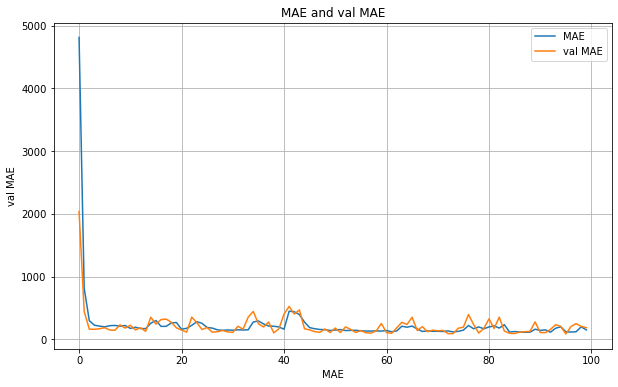

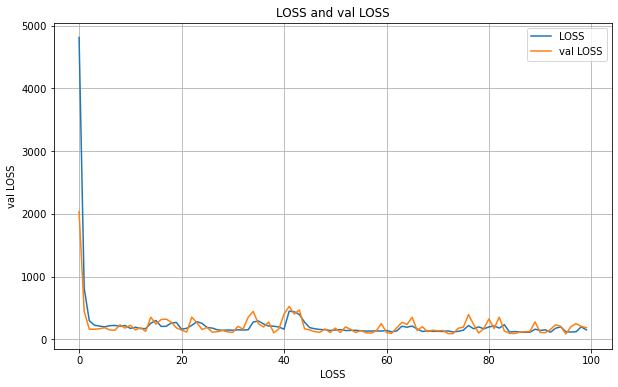

6/6 [==============================] - 0s 28ms/step


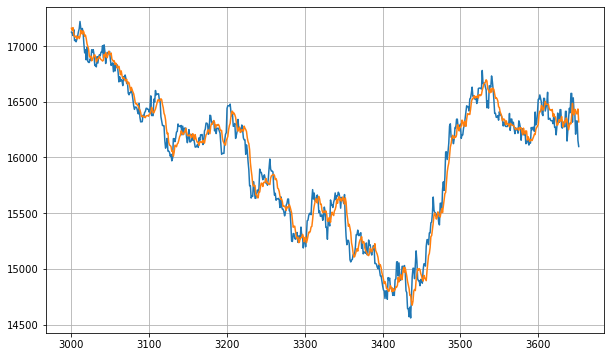

{'mae': 83.13104,
 'mse': 11340.779,
 'rmse': 106.493095,
 'mape': 0.52333164,
 'mase': 1.6063454}

In [7]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(valid_set)

# Get mae and loss from history log
mae=history_2.history['mae']
val_mae=history_2.history['val_mae']
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_2 = model_forecast(model_2, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_2 = forecast_2.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_2))

eval_model_2 = evaluate_preds(y_true=x_valid,
                               y_pred=results_2)
eval_model_2

In [8]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_3")

# Get initial weights
init_weights = model_3.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_3.set_weights(init_weights)

model_3.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_3.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_3 = model_3.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_3.name)])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     24/Unknown - 2s 20ms/step - loss: 14453.0771 - mae: 14453.5771

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 3s 74ms/step - loss: 14453.0771 - mae: 14453.5771 - val_loss: 9142.7324 - val_mae: 9143.2324
Epoch 2/100
22/24 [==========================>...] - ETA: 0s - loss: 4761.2090 - mae: 4761.7090

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 66ms/step - loss: 4544.8496 - mae: 4545.3496 - val_loss: 219.8046 - val_mae: 220.3042
Epoch 3/100
24/24 [==============================] - 1s 38ms/step - loss: 463.3040 - mae: 463.8037 - val_loss: 288.7792 - val_mae: 289.2787
Epoch 4/100
21/24 [=========================>....] - ETA: 0s - loss: 290.9672 - mae: 291.4665

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 62ms/step - loss: 291.2737 - mae: 291.7729 - val_loss: 204.6230 - val_mae: 205.1229
Epoch 5/100
16/24 [===================>..........] - ETA: 0s - loss: 272.9021 - mae: 273.4016

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 57ms/step - loss: 271.2484 - mae: 271.7480 - val_loss: 202.5356 - val_mae: 203.0354
Epoch 6/100
24/24 [==============================] - 1s 25ms/step - loss: 268.3837 - mae: 268.8831 - val_loss: 202.7791 - val_mae: 203.2791
Epoch 7/100
15/24 [=================>............] - ETA: 0s - loss: 275.6423 - mae: 276.1420

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 76ms/step - loss: 267.1713 - mae: 267.6709 - val_loss: 202.2741 - val_mae: 202.7733
Epoch 8/100
24/24 [==============================] - 1s 25ms/step - loss: 269.3664 - mae: 269.8660 - val_loss: 203.4231 - val_mae: 203.9230
Epoch 9/100
24/24 [==============================] - 1s 25ms/step - loss: 267.4815 - mae: 267.9810 - val_loss: 207.0037 - val_mae: 207.5029
Epoch 10/100
24/24 [==============================] - ETA: 0s - loss: 266.4973 - mae: 266.9968

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 79ms/step - loss: 266.4973 - mae: 266.9968 - val_loss: 201.8457 - val_mae: 202.3457
Epoch 11/100
24/24 [==============================] - 1s 33ms/step - loss: 266.9404 - mae: 267.4400 - val_loss: 207.9071 - val_mae: 208.4068
Epoch 12/100
24/24 [==============================] - 1s 32ms/step - loss: 265.4028 - mae: 265.9022 - val_loss: 204.1200 - val_mae: 204.6193
Epoch 13/100
24/24 [==============================] - 1s 29ms/step - loss: 266.1123 - mae: 266.6118 - val_loss: 213.4934 - val_mae: 213.9933
Epoch 14/100
24/24 [==============================] - 1s 24ms/step - loss: 265.4279 - mae: 265.9272 - val_loss: 213.8652 - val_mae: 214.3646
Epoch 15/100
24/24 [==============================] - 1s 25ms/step - loss: 264.4582 - mae: 264.9577 - val_loss: 202.5349 - val_mae: 203.0343
Epoch 16/100
24/24 [==============================] - 1s 23ms/step - loss: 264.8549 - mae: 265.3547 - val_loss: 210.1583 - val_mae: 210.6582
Epoch 17/100
16/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 69ms/step - loss: 264.0295 - mae: 264.5291 - val_loss: 201.4477 - val_mae: 201.9477
Epoch 18/100
24/24 [==============================] - 1s 23ms/step - loss: 263.2271 - mae: 263.7266 - val_loss: 203.7578 - val_mae: 204.2574
Epoch 19/100
24/24 [==============================] - 1s 23ms/step - loss: 267.1608 - mae: 267.6598 - val_loss: 211.1523 - val_mae: 211.6521
Epoch 20/100
24/24 [==============================] - 1s 24ms/step - loss: 262.3984 - mae: 262.8982 - val_loss: 202.1409 - val_mae: 202.6409
Epoch 21/100
24/24 [==============================] - 1s 23ms/step - loss: 262.0295 - mae: 262.5289 - val_loss: 201.5225 - val_mae: 202.0224
Epoch 22/100
15/24 [=================>............] - ETA: 0s - loss: 267.5645 - mae: 268.0637

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 55ms/step - loss: 262.2249 - mae: 262.7241 - val_loss: 201.0455 - val_mae: 201.5448
Epoch 23/100
24/24 [==============================] - 1s 22ms/step - loss: 263.3939 - mae: 263.8930 - val_loss: 202.0995 - val_mae: 202.5992
Epoch 24/100
24/24 [==============================] - 1s 23ms/step - loss: 263.7097 - mae: 264.2093 - val_loss: 216.5366 - val_mae: 217.0366
Epoch 25/100
16/24 [===================>..........] - ETA: 0s - loss: 265.1902 - mae: 265.6900

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 72ms/step - loss: 259.9397 - mae: 260.4392 - val_loss: 200.2374 - val_mae: 200.7371
Epoch 26/100
24/24 [==============================] - 1s 29ms/step - loss: 261.0809 - mae: 261.5806 - val_loss: 208.6896 - val_mae: 209.1896
Epoch 27/100
24/24 [==============================] - 1s 29ms/step - loss: 259.8858 - mae: 260.3855 - val_loss: 202.3210 - val_mae: 202.8210
Epoch 28/100
15/24 [=================>............] - ETA: 0s - loss: 262.5948 - mae: 263.0946

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 79ms/step - loss: 259.4193 - mae: 259.9188 - val_loss: 197.4827 - val_mae: 197.9823
Epoch 29/100
24/24 [==============================] - 1s 39ms/step - loss: 266.7653 - mae: 267.2646 - val_loss: 206.9073 - val_mae: 207.4072
Epoch 30/100
20/24 [========================>.....] - ETA: 0s - loss: 255.6798 - mae: 256.1793

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 76ms/step - loss: 258.8275 - mae: 259.3271 - val_loss: 196.9938 - val_mae: 197.4938
Epoch 31/100
24/24 [==============================] - 1s 35ms/step - loss: 259.9367 - mae: 260.4366 - val_loss: 205.6446 - val_mae: 206.1440
Epoch 32/100
24/24 [==============================] - 1s 31ms/step - loss: 257.2838 - mae: 257.7832 - val_loss: 201.3717 - val_mae: 201.8714
Epoch 33/100
24/24 [==============================] - 1s 27ms/step - loss: 256.3605 - mae: 256.8599 - val_loss: 206.7809 - val_mae: 207.2809
Epoch 34/100
15/24 [=================>............] - ETA: 0s - loss: 261.5049 - mae: 262.0048

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 89ms/step - loss: 255.9503 - mae: 256.4499 - val_loss: 193.7097 - val_mae: 194.2089
Epoch 35/100
24/24 [==============================] - 1s 30ms/step - loss: 261.9549 - mae: 262.4548 - val_loss: 195.1161 - val_mae: 195.6155
Epoch 36/100
24/24 [==============================] - 1s 26ms/step - loss: 262.7781 - mae: 263.2776 - val_loss: 205.4947 - val_mae: 205.9945
Epoch 37/100
24/24 [==============================] - 1s 30ms/step - loss: 258.3463 - mae: 258.8455 - val_loss: 216.7726 - val_mae: 217.2717
Epoch 38/100
24/24 [==============================] - 1s 22ms/step - loss: 254.7284 - mae: 255.2283 - val_loss: 195.8734 - val_mae: 196.3730
Epoch 39/100
24/24 [==============================] - 1s 22ms/step - loss: 255.2552 - mae: 255.7546 - val_loss: 198.2526 - val_mae: 198.7511
Epoch 40/100
15/24 [=================>............] - ETA: 0s - loss: 260.1532 - mae: 260.6526

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 59ms/step - loss: 259.2745 - mae: 259.7739 - val_loss: 192.0412 - val_mae: 192.5411
Epoch 41/100
15/24 [=================>............] - ETA: 0s - loss: 264.6771 - mae: 265.1767

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 60ms/step - loss: 256.1964 - mae: 256.6957 - val_loss: 190.9451 - val_mae: 191.4439
Epoch 42/100
16/24 [===================>..........] - ETA: 0s - loss: 259.4681 - mae: 259.9670

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 61ms/step - loss: 255.7553 - mae: 256.2545 - val_loss: 190.3791 - val_mae: 190.8773
Epoch 43/100
24/24 [==============================] - 1s 23ms/step - loss: 252.1757 - mae: 252.6752 - val_loss: 190.5885 - val_mae: 191.0881
Epoch 44/100
16/24 [===================>..........] - ETA: 0s - loss: 256.5092 - mae: 257.0081

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 61ms/step - loss: 251.5645 - mae: 252.0631 - val_loss: 189.7219 - val_mae: 190.2210
Epoch 45/100
16/24 [===================>..........] - ETA: 0s - loss: 258.9963 - mae: 259.4959

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 56ms/step - loss: 253.6996 - mae: 254.1991 - val_loss: 189.1796 - val_mae: 189.6796
Epoch 46/100
24/24 [==============================] - 1s 25ms/step - loss: 250.8739 - mae: 251.3732 - val_loss: 194.1604 - val_mae: 194.6597
Epoch 47/100
24/24 [==============================] - 1s 25ms/step - loss: 248.1520 - mae: 248.6516 - val_loss: 189.6098 - val_mae: 190.1093
Epoch 48/100
22/24 [==========================>...] - ETA: 0s - loss: 251.0833 - mae: 251.5831

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 77ms/step - loss: 249.8888 - mae: 250.3885 - val_loss: 188.3878 - val_mae: 188.8863
Epoch 49/100
16/24 [===================>..........] - ETA: 0s - loss: 258.5581 - mae: 259.0570

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 52ms/step - loss: 251.1657 - mae: 251.6648 - val_loss: 187.5469 - val_mae: 188.0468
Epoch 50/100
24/24 [==============================] - 1s 23ms/step - loss: 252.2843 - mae: 252.7838 - val_loss: 194.2493 - val_mae: 194.7487
Epoch 51/100
16/24 [===================>..........] - ETA: 0s - loss: 259.0225 - mae: 259.5220

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 54ms/step - loss: 252.2246 - mae: 252.7241 - val_loss: 186.8294 - val_mae: 187.3291
Epoch 52/100
16/24 [===================>..........] - ETA: 0s - loss: 249.9815 - mae: 250.4811

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 66ms/step - loss: 248.0733 - mae: 248.5730 - val_loss: 186.4891 - val_mae: 186.9885
Epoch 53/100
24/24 [==============================] - 1s 24ms/step - loss: 246.3399 - mae: 246.8396 - val_loss: 186.5334 - val_mae: 187.0321
Epoch 54/100
24/24 [==============================] - 1s 23ms/step - loss: 243.7423 - mae: 244.2416 - val_loss: 199.8803 - val_mae: 200.3790
Epoch 55/100
24/24 [==============================] - 1s 25ms/step - loss: 249.1190 - mae: 249.6185 - val_loss: 187.2617 - val_mae: 187.7591
Epoch 56/100
24/24 [==============================] - 1s 24ms/step - loss: 252.8151 - mae: 253.3147 - val_loss: 190.8745 - val_mae: 191.3731
Epoch 57/100
15/24 [=================>............] - ETA: 0s - loss: 265.8721 - mae: 266.3719

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 66ms/step - loss: 252.2251 - mae: 252.7247 - val_loss: 185.2249 - val_mae: 185.7243
Epoch 58/100
24/24 [==============================] - 1s 23ms/step - loss: 241.7900 - mae: 242.2894 - val_loss: 185.7702 - val_mae: 186.2697
Epoch 59/100
15/24 [=================>............] - ETA: 0s - loss: 252.0327 - mae: 252.5327

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 57ms/step - loss: 245.3719 - mae: 245.8718 - val_loss: 183.4408 - val_mae: 183.9404
Epoch 60/100
24/24 [==============================] - 1s 27ms/step - loss: 247.0290 - mae: 247.5287 - val_loss: 184.7038 - val_mae: 185.2038
Epoch 61/100
15/24 [=================>............] - ETA: 0s - loss: 238.9040 - mae: 239.4036

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 58ms/step - loss: 240.4059 - mae: 240.9053 - val_loss: 182.5537 - val_mae: 183.0532
Epoch 62/100
16/24 [===================>..........] - ETA: 0s - loss: 244.0313 - mae: 244.5309

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 76ms/step - loss: 242.3442 - mae: 242.8438 - val_loss: 182.1003 - val_mae: 182.5998
Epoch 63/100
24/24 [==============================] - 1s 25ms/step - loss: 239.3370 - mae: 239.8367 - val_loss: 182.2261 - val_mae: 182.7250
Epoch 64/100
24/24 [==============================] - 1s 22ms/step - loss: 240.4972 - mae: 240.9967 - val_loss: 197.2167 - val_mae: 197.7154
Epoch 65/100
24/24 [==============================] - 1s 21ms/step - loss: 239.6480 - mae: 240.1474 - val_loss: 187.9052 - val_mae: 188.4052
Epoch 66/100
24/24 [==============================] - 1s 23ms/step - loss: 237.8941 - mae: 238.3938 - val_loss: 183.5568 - val_mae: 184.0550
Epoch 67/100
15/24 [=================>............] - ETA: 0s - loss: 236.9344 - mae: 237.4336

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 73ms/step - loss: 238.7874 - mae: 239.2867 - val_loss: 180.4440 - val_mae: 180.9434
Epoch 68/100
15/24 [=================>............] - ETA: 0s - loss: 239.9473 - mae: 240.4466

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 89ms/step - loss: 236.6641 - mae: 237.1632 - val_loss: 179.5088 - val_mae: 180.0078
Epoch 69/100
24/24 [==============================] - 1s 34ms/step - loss: 236.2907 - mae: 236.7901 - val_loss: 190.9215 - val_mae: 191.4215
Epoch 70/100
24/24 [==============================] - 1s 34ms/step - loss: 235.7429 - mae: 236.2425 - val_loss: 181.3963 - val_mae: 181.8958
Epoch 71/100
15/24 [=================>............] - ETA: 0s - loss: 241.9437 - mae: 242.4430

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 3s 117ms/step - loss: 234.3720 - mae: 234.8714 - val_loss: 178.7538 - val_mae: 179.2526
Epoch 72/100
24/24 [==============================] - 1s 31ms/step - loss: 238.9985 - mae: 239.4977 - val_loss: 178.7743 - val_mae: 179.2740
Epoch 73/100
15/24 [=================>............] - ETA: 0s - loss: 236.1485 - mae: 236.6479

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 3s 118ms/step - loss: 234.1658 - mae: 234.6654 - val_loss: 177.3887 - val_mae: 177.8883
Epoch 74/100
24/24 [==============================] - 1s 43ms/step - loss: 233.5131 - mae: 234.0125 - val_loss: 178.4015 - val_mae: 178.9011
Epoch 75/100
24/24 [==============================] - 2s 58ms/step - loss: 230.9799 - mae: 231.4793 - val_loss: 185.1720 - val_mae: 185.6712
Epoch 76/100
24/24 [==============================] - ETA: 0s - loss: 233.3000 - mae: 233.7992

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 4s 140ms/step - loss: 233.3000 - mae: 233.7992 - val_loss: 177.3626 - val_mae: 177.8619
Epoch 77/100
16/24 [===================>..........] - ETA: 0s - loss: 237.8304 - mae: 238.3300

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 4s 137ms/step - loss: 234.0720 - mae: 234.5716 - val_loss: 175.5970 - val_mae: 176.0964
Epoch 78/100
24/24 [==============================] - 1s 33ms/step - loss: 231.2083 - mae: 231.7080 - val_loss: 190.3640 - val_mae: 190.8638
Epoch 79/100
24/24 [==============================] - 1s 39ms/step - loss: 230.5568 - mae: 231.0564 - val_loss: 184.1346 - val_mae: 184.6340
Epoch 80/100
15/24 [=================>............] - ETA: 0s - loss: 230.7137 - mae: 231.2131

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 95ms/step - loss: 228.4509 - mae: 228.9505 - val_loss: 174.3389 - val_mae: 174.8380
Epoch 81/100
24/24 [==============================] - 1s 31ms/step - loss: 228.6303 - mae: 229.1300 - val_loss: 175.4229 - val_mae: 175.9226
Epoch 82/100
24/24 [==============================] - 1s 36ms/step - loss: 232.4923 - mae: 232.9916 - val_loss: 177.4725 - val_mae: 177.9715
Epoch 83/100
24/24 [==============================] - 1s 33ms/step - loss: 229.5027 - mae: 230.0023 - val_loss: 177.3489 - val_mae: 177.8479
Epoch 84/100
24/24 [==============================] - 1s 36ms/step - loss: 227.6949 - mae: 228.1939 - val_loss: 175.6884 - val_mae: 176.1876
Epoch 85/100
15/24 [=================>............] - ETA: 0s - loss: 233.1979 - mae: 233.6977

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 56ms/step - loss: 231.6284 - mae: 232.1282 - val_loss: 173.7828 - val_mae: 174.2828
Epoch 86/100
16/24 [===================>..........] - ETA: 0s - loss: 234.9839 - mae: 235.4835

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 74ms/step - loss: 229.0461 - mae: 229.5458 - val_loss: 171.7462 - val_mae: 172.2462
Epoch 87/100
24/24 [==============================] - 1s 20ms/step - loss: 224.2669 - mae: 224.7662 - val_loss: 173.2177 - val_mae: 173.7177
Epoch 88/100
15/24 [=================>............] - ETA: 0s - loss: 228.5591 - mae: 229.0588

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 50ms/step - loss: 225.4475 - mae: 225.9473 - val_loss: 171.2000 - val_mae: 171.6987
Epoch 89/100
24/24 [==============================] - 1s 20ms/step - loss: 225.0518 - mae: 225.5511 - val_loss: 173.7742 - val_mae: 174.2733
Epoch 90/100
18/24 [=====================>........] - ETA: 0s - loss: 226.2519 - mae: 226.7516

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 96ms/step - loss: 225.2244 - mae: 225.7240 - val_loss: 170.4295 - val_mae: 170.9290
Epoch 91/100
24/24 [==============================] - 1s 28ms/step - loss: 222.0439 - mae: 222.5435 - val_loss: 170.8719 - val_mae: 171.3714
Epoch 92/100
24/24 [==============================] - 1s 25ms/step - loss: 226.4514 - mae: 226.9503 - val_loss: 176.4772 - val_mae: 176.9767
Epoch 93/100
24/24 [==============================] - 1s 25ms/step - loss: 225.8587 - mae: 226.3583 - val_loss: 170.5641 - val_mae: 171.0636
Epoch 94/100
15/24 [=================>............] - ETA: 0s - loss: 225.5398 - mae: 226.0398

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 71ms/step - loss: 219.7124 - mae: 220.2121 - val_loss: 168.5495 - val_mae: 169.0488
Epoch 95/100
24/24 [==============================] - 1s 30ms/step - loss: 222.9128 - mae: 223.4124 - val_loss: 171.4659 - val_mae: 171.9653
Epoch 96/100
16/24 [===================>..........] - ETA: 0s - loss: 223.2384 - mae: 223.7379

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 80ms/step - loss: 218.2863 - mae: 218.7855 - val_loss: 167.5224 - val_mae: 168.0219
Epoch 97/100
24/24 [==============================] - 1s 19ms/step - loss: 220.9649 - mae: 221.4639 - val_loss: 169.2355 - val_mae: 169.7351
Epoch 98/100
24/24 [==============================] - 1s 18ms/step - loss: 220.6582 - mae: 221.1574 - val_loss: 170.0848 - val_mae: 170.5844
Epoch 99/100
24/24 [==============================] - 1s 19ms/step - loss: 217.6833 - mae: 218.1825 - val_loss: 186.8534 - val_mae: 187.3534
Epoch 100/100
24/24 [==============================] - 1s 19ms/step - loss: 221.3992 - mae: 221.8988 - val_loss: 174.5573 - val_mae: 175.0573


5/5 [==============================] - 0s 10ms/step - loss: 167.5224 - mae: 168.0219


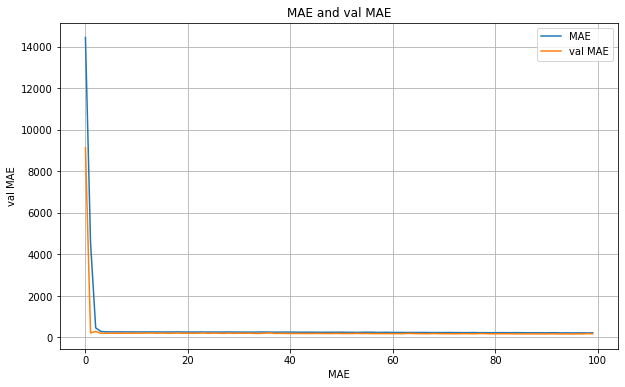

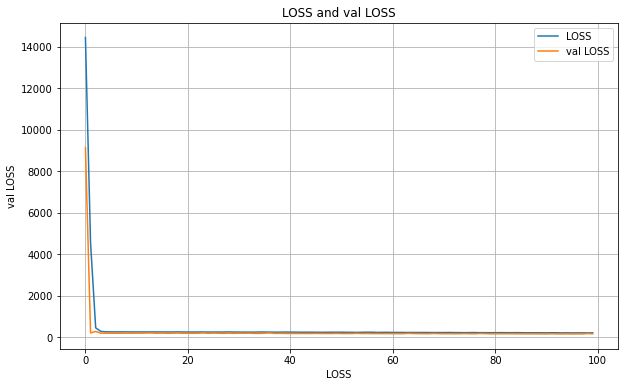

6/6 [==============================] - 0s 20ms/step


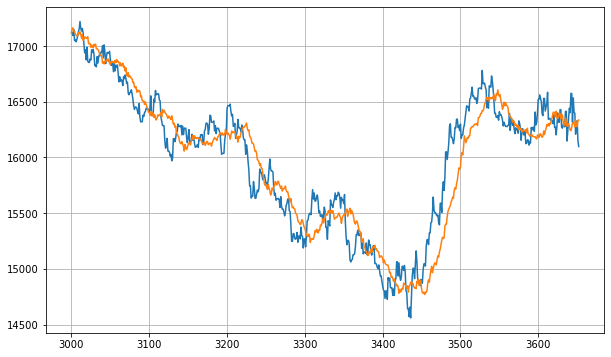

{'mae': 163.87306,
 'mse': 44114.215,
 'rmse': 210.03384,
 'mape': 1.0303183,
 'mase': 3.1665277}

In [9]:
# Load in best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3/")
model_3.evaluate(valid_set)

# Get mae and loss from history log
mae=history_3.history['mae']
val_mae=history_3.history['val_mae']
loss=history_3.history['loss']
val_loss=history_3.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_3 = model_forecast(model_3, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_3 = forecast_3.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_3))

eval_model_3 = evaluate_preds(y_true=x_valid,
                               y_pred=results_3)
eval_model_3

In [10]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_4")

# Get initial weights
init_weights = model_4.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_4.set_weights(init_weights)

model_4.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_4.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_4 = model_4.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_4.name)])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     16/Unknown - 2s 20ms/step - loss: 16188.8594 - mae: 16189.3594

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 3s 71ms/step - loss: 13859.0049 - mae: 13859.5039 - val_loss: 5443.6626 - val_mae: 5444.1626
Epoch 2/100
15/24 [=================>............] - ETA: 0s - loss: 2165.4712 - mae: 2165.9712

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 69ms/step - loss: 1667.3215 - mae: 1667.8215 - val_loss: 244.1406 - val_mae: 244.6401
Epoch 3/100
18/24 [=====================>........] - ETA: 0s - loss: 368.7910 - mae: 369.2907

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 71ms/step - loss: 341.7354 - mae: 342.2352 - val_loss: 181.7079 - val_mae: 182.2062
Epoch 4/100
17/24 [====================>.........] - ETA: 0s - loss: 225.7680 - mae: 226.2672

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 63ms/step - loss: 227.0051 - mae: 227.5045 - val_loss: 170.3970 - val_mae: 170.8956
Epoch 5/100
16/24 [===================>..........] - ETA: 0s - loss: 224.1568 - mae: 224.6561

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 60ms/step - loss: 219.4200 - mae: 219.9194 - val_loss: 168.6732 - val_mae: 169.1729
Epoch 6/100
17/24 [====================>.........] - ETA: 0s - loss: 219.5138 - mae: 220.0137

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 61ms/step - loss: 217.5889 - mae: 218.0887 - val_loss: 160.5748 - val_mae: 161.0730
Epoch 7/100
24/24 [==============================] - 1s 19ms/step - loss: 220.9329 - mae: 221.4321 - val_loss: 191.4448 - val_mae: 191.9448
Epoch 8/100
24/24 [==============================] - 1s 19ms/step - loss: 225.6714 - mae: 226.1713 - val_loss: 163.9396 - val_mae: 164.4382
Epoch 9/100
24/24 [==============================] - 1s 19ms/step - loss: 212.3384 - mae: 212.8374 - val_loss: 171.0796 - val_mae: 171.5795
Epoch 10/100
17/24 [====================>.........] - ETA: 0s - loss: 219.6168 - mae: 220.1165

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 59ms/step - loss: 215.0628 - mae: 215.5625 - val_loss: 155.3782 - val_mae: 155.8772
Epoch 11/100
24/24 [==============================] - 1s 19ms/step - loss: 206.1777 - mae: 206.6764 - val_loss: 155.7286 - val_mae: 156.2279
Epoch 12/100
18/24 [=====================>........] - ETA: 0s - loss: 206.6133 - mae: 207.1127

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 58ms/step - loss: 206.3882 - mae: 206.8875 - val_loss: 152.6472 - val_mae: 153.1471
Epoch 13/100
24/24 [==============================] - 1s 19ms/step - loss: 204.8999 - mae: 205.3995 - val_loss: 180.8391 - val_mae: 181.3382
Epoch 14/100
24/24 [==============================] - 1s 19ms/step - loss: 214.9671 - mae: 215.4664 - val_loss: 180.9708 - val_mae: 181.4688
Epoch 15/100
24/24 [==============================] - 1s 19ms/step - loss: 206.4495 - mae: 206.9489 - val_loss: 196.4121 - val_mae: 196.9103
Epoch 16/100
17/24 [====================>.........] - ETA: 0s - loss: 206.5190 - mae: 207.0187

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 60ms/step - loss: 202.4777 - mae: 202.9772 - val_loss: 148.3990 - val_mae: 148.8988
Epoch 17/100
24/24 [==============================] - 1s 20ms/step - loss: 195.3253 - mae: 195.8244 - val_loss: 170.5173 - val_mae: 171.0164
Epoch 18/100
24/24 [==============================] - 1s 21ms/step - loss: 191.5923 - mae: 192.0916 - val_loss: 170.8474 - val_mae: 171.3472
Epoch 19/100
24/24 [==============================] - 1s 21ms/step - loss: 209.8952 - mae: 210.3949 - val_loss: 149.1896 - val_mae: 149.6895
Epoch 20/100
24/24 [==============================] - 1s 23ms/step - loss: 192.8704 - mae: 193.3698 - val_loss: 157.4359 - val_mae: 157.9359
Epoch 21/100
17/24 [====================>.........] - ETA: 0s - loss: 190.8960 - mae: 191.3954

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 69ms/step - loss: 186.9187 - mae: 187.4182 - val_loss: 139.1834 - val_mae: 139.6827
Epoch 22/100
19/24 [======================>.......] - ETA: 0s - loss: 183.3282 - mae: 183.8276

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 79ms/step - loss: 179.9544 - mae: 180.4538 - val_loss: 137.9880 - val_mae: 138.4860
Epoch 23/100
15/24 [=================>............] - ETA: 0s - loss: 175.2826 - mae: 175.7823

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 73ms/step - loss: 176.2446 - mae: 176.7439 - val_loss: 135.9204 - val_mae: 136.4197
Epoch 24/100
24/24 [==============================] - 1s 20ms/step - loss: 173.3914 - mae: 173.8901 - val_loss: 167.2622 - val_mae: 167.7622
Epoch 25/100
24/24 [==============================] - 1s 22ms/step - loss: 172.3974 - mae: 172.8969 - val_loss: 136.1434 - val_mae: 136.6415
Epoch 26/100
16/24 [===================>..........] - ETA: 0s - loss: 178.4686 - mae: 178.9683

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 63ms/step - loss: 177.6187 - mae: 178.1183 - val_loss: 130.4615 - val_mae: 130.9609
Epoch 27/100
24/24 [==============================] - 1s 24ms/step - loss: 164.0459 - mae: 164.5453 - val_loss: 165.6363 - val_mae: 166.1339
Epoch 28/100
24/24 [==============================] - 1s 22ms/step - loss: 169.7937 - mae: 170.2934 - val_loss: 139.7877 - val_mae: 140.2868
Epoch 29/100
15/24 [=================>............] - ETA: 0s - loss: 166.0196 - mae: 166.5188

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 66ms/step - loss: 164.0971 - mae: 164.5965 - val_loss: 126.1462 - val_mae: 126.6446
Epoch 30/100
24/24 [==============================] - 1s 20ms/step - loss: 161.0071 - mae: 161.5065 - val_loss: 141.7534 - val_mae: 142.2533
Epoch 31/100
24/24 [==============================] - 1s 26ms/step - loss: 159.7175 - mae: 160.2171 - val_loss: 140.0813 - val_mae: 140.5801
Epoch 32/100
24/24 [==============================] - 1s 23ms/step - loss: 153.6831 - mae: 154.1826 - val_loss: 139.3810 - val_mae: 139.8796
Epoch 33/100
23/24 [===========================>..] - ETA: 0s - loss: 165.3171 - mae: 165.8168

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 70ms/step - loss: 165.0376 - mae: 165.5373 - val_loss: 120.3183 - val_mae: 120.8178
Epoch 34/100
24/24 [==============================] - 1s 21ms/step - loss: 149.5774 - mae: 150.0765 - val_loss: 240.3139 - val_mae: 240.8134
Epoch 35/100
24/24 [==============================] - 1s 25ms/step - loss: 186.9615 - mae: 187.4607 - val_loss: 125.0017 - val_mae: 125.5010
Epoch 36/100
24/24 [==============================] - 1s 25ms/step - loss: 143.0760 - mae: 143.5750 - val_loss: 121.0532 - val_mae: 121.5522
Epoch 37/100
24/24 [==============================] - 1s 25ms/step - loss: 141.5581 - mae: 142.0569 - val_loss: 120.7081 - val_mae: 121.2081
Epoch 38/100
24/24 [==============================] - 1s 22ms/step - loss: 143.4511 - mae: 143.9508 - val_loss: 169.5240 - val_mae: 170.0227
Epoch 39/100
15/24 [=================>............] - ETA: 0s - loss: 150.2661 - mae: 150.7651

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 67ms/step - loss: 147.2187 - mae: 147.7180 - val_loss: 119.4222 - val_mae: 119.9218
Epoch 40/100
16/24 [===================>..........] - ETA: 0s - loss: 146.8825 - mae: 147.3814

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 66ms/step - loss: 149.6254 - mae: 150.1246 - val_loss: 115.2159 - val_mae: 115.7153
Epoch 41/100
24/24 [==============================] - 1s 21ms/step - loss: 155.4407 - mae: 155.9402 - val_loss: 136.5043 - val_mae: 137.0041
Epoch 42/100
24/24 [==============================] - 1s 20ms/step - loss: 137.4154 - mae: 137.9148 - val_loss: 131.5309 - val_mae: 132.0297
Epoch 43/100
16/24 [===================>..........] - ETA: 0s - loss: 142.8750 - mae: 143.3742

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 60ms/step - loss: 138.1007 - mae: 138.5997 - val_loss: 112.9277 - val_mae: 113.4258
Epoch 44/100
24/24 [==============================] - 1s 23ms/step - loss: 130.7023 - mae: 131.2017 - val_loss: 121.1554 - val_mae: 121.6538
Epoch 45/100
24/24 [==============================] - 1s 21ms/step - loss: 136.2313 - mae: 136.7306 - val_loss: 120.2978 - val_mae: 120.7955
Epoch 46/100
24/24 [==============================] - 1s 24ms/step - loss: 142.9993 - mae: 143.4979 - val_loss: 120.9734 - val_mae: 121.4722
Epoch 47/100
24/24 [==============================] - 1s 21ms/step - loss: 153.5316 - mae: 154.0307 - val_loss: 298.6265 - val_mae: 299.1265
Epoch 48/100
15/24 [=================>............] - ETA: 0s - loss: 160.9159 - mae: 161.4153

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 94ms/step - loss: 149.6545 - mae: 150.1540 - val_loss: 111.7943 - val_mae: 112.2936
Epoch 49/100
16/24 [===================>..........] - ETA: 0s - loss: 127.3974 - mae: 127.8965

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 67ms/step - loss: 126.1203 - mae: 126.6194 - val_loss: 109.9078 - val_mae: 110.4078
Epoch 50/100
24/24 [==============================] - 1s 23ms/step - loss: 135.5926 - mae: 136.0918 - val_loss: 172.8228 - val_mae: 173.3225
Epoch 51/100
24/24 [==============================] - 1s 20ms/step - loss: 145.6541 - mae: 146.1533 - val_loss: 115.7079 - val_mae: 116.2079
Epoch 52/100
24/24 [==============================] - 1s 19ms/step - loss: 142.4213 - mae: 142.9206 - val_loss: 127.4016 - val_mae: 127.9014
Epoch 53/100
24/24 [==============================] - 1s 19ms/step - loss: 129.8728 - mae: 130.3720 - val_loss: 130.3314 - val_mae: 130.8305
Epoch 54/100
24/24 [==============================] - 1s 19ms/step - loss: 139.1543 - mae: 139.6535 - val_loss: 141.6528 - val_mae: 142.1514
Epoch 55/100
24/24 [==============================] - 1s 19ms/step - loss: 125.8690 - mae: 126.3684 - val_loss: 111.4438 - val_mae: 111.9434
Epoch 56/100
15/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 73ms/step - loss: 137.9889 - mae: 138.4880 - val_loss: 105.4661 - val_mae: 105.9647
Epoch 57/100
24/24 [==============================] - 1s 24ms/step - loss: 123.8558 - mae: 124.3552 - val_loss: 137.3255 - val_mae: 137.8253
Epoch 58/100
24/24 [==============================] - 1s 20ms/step - loss: 142.4748 - mae: 142.9741 - val_loss: 188.6015 - val_mae: 189.1015
Epoch 59/100
24/24 [==============================] - 1s 20ms/step - loss: 143.4837 - mae: 143.9828 - val_loss: 128.6914 - val_mae: 129.1901
Epoch 60/100
24/24 [==============================] - 1s 19ms/step - loss: 128.7113 - mae: 129.2108 - val_loss: 106.6979 - val_mae: 107.1975
Epoch 61/100
17/24 [====================>.........] - ETA: 0s - loss: 121.8596 - mae: 122.3591

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 59ms/step - loss: 121.3640 - mae: 121.8633 - val_loss: 104.9142 - val_mae: 105.4132
Epoch 62/100
17/24 [====================>.........] - ETA: 0s - loss: 123.9047 - mae: 124.4036

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 60ms/step - loss: 123.1612 - mae: 123.6599 - val_loss: 103.7898 - val_mae: 104.2896
Epoch 63/100
24/24 [==============================] - 1s 19ms/step - loss: 122.4715 - mae: 122.9707 - val_loss: 154.5432 - val_mae: 155.0427
Epoch 64/100
24/24 [==============================] - 1s 19ms/step - loss: 141.8703 - mae: 142.3696 - val_loss: 107.1221 - val_mae: 107.6217
Epoch 65/100
24/24 [==============================] - 1s 19ms/step - loss: 129.7931 - mae: 130.2922 - val_loss: 116.4359 - val_mae: 116.9343
Epoch 66/100
24/24 [==============================] - 1s 19ms/step - loss: 130.7252 - mae: 131.2245 - val_loss: 114.7767 - val_mae: 115.2763
Epoch 67/100
17/24 [====================>.........] - ETA: 0s - loss: 120.5246 - mae: 121.0237

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 60ms/step - loss: 120.7108 - mae: 121.2100 - val_loss: 102.8787 - val_mae: 103.3786
Epoch 68/100
24/24 [==============================] - 1s 20ms/step - loss: 123.3960 - mae: 123.8951 - val_loss: 105.2237 - val_mae: 105.7227
Epoch 69/100
24/24 [==============================] - 1s 19ms/step - loss: 122.6260 - mae: 123.1247 - val_loss: 109.2492 - val_mae: 109.7477
Epoch 70/100
24/24 [==============================] - 1s 20ms/step - loss: 132.4188 - mae: 132.9174 - val_loss: 137.8926 - val_mae: 138.3925
Epoch 71/100
24/24 [==============================] - 1s 19ms/step - loss: 130.1431 - mae: 130.6424 - val_loss: 105.0066 - val_mae: 105.5045
Epoch 72/100
24/24 [==============================] - 1s 19ms/step - loss: 121.9533 - mae: 122.4524 - val_loss: 137.6107 - val_mae: 138.1095
Epoch 73/100
15/24 [=================>............] - ETA: 0s - loss: 119.6105 - mae: 120.1096

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 62ms/step - loss: 120.5524 - mae: 121.0509 - val_loss: 101.9879 - val_mae: 102.4868
Epoch 74/100
24/24 [==============================] - 1s 20ms/step - loss: 117.7459 - mae: 118.2447 - val_loss: 103.6733 - val_mae: 104.1727
Epoch 75/100
24/24 [==============================] - 1s 19ms/step - loss: 125.9243 - mae: 126.4236 - val_loss: 129.4375 - val_mae: 129.9357
Epoch 76/100
24/24 [==============================] - 1s 19ms/step - loss: 119.7389 - mae: 120.2378 - val_loss: 119.1025 - val_mae: 119.6023
Epoch 77/100
24/24 [==============================] - 1s 20ms/step - loss: 117.2205 - mae: 117.7196 - val_loss: 157.1246 - val_mae: 157.6243
Epoch 78/100
24/24 [==============================] - 1s 20ms/step - loss: 132.3116 - mae: 132.8107 - val_loss: 111.2488 - val_mae: 111.7478
Epoch 79/100
16/24 [===================>..........] - ETA: 0s - loss: 121.6656 - mae: 122.1648

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 70ms/step - loss: 119.7577 - mae: 120.2569 - val_loss: 100.7815 - val_mae: 101.2792
Epoch 80/100
24/24 [==============================] - 1s 19ms/step - loss: 123.5014 - mae: 124.0003 - val_loss: 105.6240 - val_mae: 106.1223
Epoch 81/100
16/24 [===================>..........] - ETA: 0s - loss: 118.2908 - mae: 118.7893

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 60ms/step - loss: 114.6357 - mae: 115.1341 - val_loss: 99.9730 - val_mae: 100.4719
Epoch 82/100
24/24 [==============================] - 1s 19ms/step - loss: 115.4305 - mae: 115.9299 - val_loss: 100.2295 - val_mae: 100.7282
Epoch 83/100
24/24 [==============================] - 1s 27ms/step - loss: 121.7149 - mae: 122.2139 - val_loss: 100.7383 - val_mae: 101.2375
Epoch 84/100
24/24 [==============================] - 1s 28ms/step - loss: 121.0011 - mae: 121.5002 - val_loss: 164.6993 - val_mae: 165.1986
Epoch 85/100
24/24 [==============================] - 1s 22ms/step - loss: 120.1282 - mae: 120.6270 - val_loss: 112.8943 - val_mae: 113.3934
Epoch 86/100
24/24 [==============================] - 1s 21ms/step - loss: 112.3380 - mae: 112.8368 - val_loss: 102.5386 - val_mae: 103.0378
Epoch 87/100
24/24 [==============================] - 1s 30ms/step - loss: 114.0221 - mae: 114.5208 - val_loss: 107.8862 - val_mae: 108.3851
Epoch 88/100
23/24 [=======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 81ms/step - loss: 114.8219 - mae: 115.3213 - val_loss: 98.6418 - val_mae: 99.1412
Epoch 89/100
24/24 [==============================] - 1s 28ms/step - loss: 119.9386 - mae: 120.4380 - val_loss: 98.7763 - val_mae: 99.2748
Epoch 90/100
24/24 [==============================] - 1s 20ms/step - loss: 112.0175 - mae: 112.5164 - val_loss: 99.7089 - val_mae: 100.2079
Epoch 91/100
24/24 [==============================] - 1s 20ms/step - loss: 121.4759 - mae: 121.9751 - val_loss: 134.5341 - val_mae: 135.0335
Epoch 92/100
24/24 [==============================] - 1s 20ms/step - loss: 115.1765 - mae: 115.6758 - val_loss: 98.9493 - val_mae: 99.4485
Epoch 93/100
16/24 [===================>..........] - ETA: 0s - loss: 110.3264 - mae: 110.8254

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 61ms/step - loss: 115.6298 - mae: 116.1289 - val_loss: 97.3781 - val_mae: 97.8769
Epoch 94/100
24/24 [==============================] - 1s 20ms/step - loss: 122.9694 - mae: 123.4682 - val_loss: 180.6481 - val_mae: 181.1479
Epoch 95/100
24/24 [==============================] - 1s 20ms/step - loss: 139.2046 - mae: 139.7036 - val_loss: 123.5388 - val_mae: 124.0381
Epoch 96/100
24/24 [==============================] - 1s 19ms/step - loss: 114.8937 - mae: 115.3931 - val_loss: 119.5976 - val_mae: 120.0963
Epoch 97/100
24/24 [==============================] - 1s 19ms/step - loss: 119.8174 - mae: 120.3160 - val_loss: 103.4523 - val_mae: 103.9512
Epoch 98/100
24/24 [==============================] - 1s 19ms/step - loss: 131.3167 - mae: 131.8159 - val_loss: 102.4151 - val_mae: 102.9124
Epoch 99/100
24/24 [==============================] - 1s 21ms/step - loss: 115.1308 - mae: 115.6303 - val_loss: 136.9366 - val_mae: 137.4364
Epoch 100/100
15/24 [=======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 3s 111ms/step - loss: 115.2644 - mae: 115.7631 - val_loss: 96.3314 - val_mae: 96.8290


5/5 [==============================] - 1s 19ms/step - loss: 96.3314 - mae: 96.8290


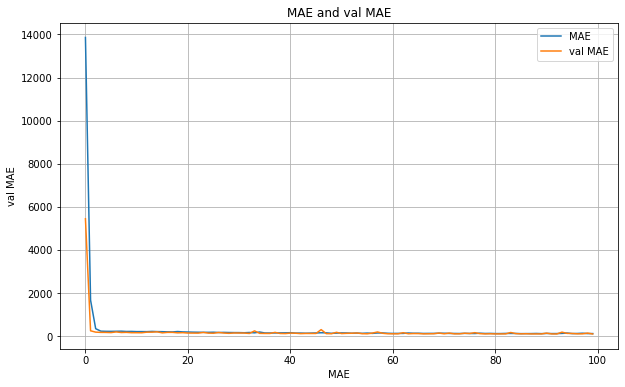

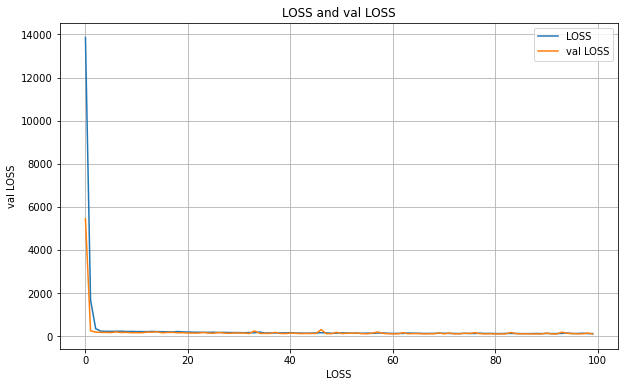

6/6 [==============================] - 0s 31ms/step


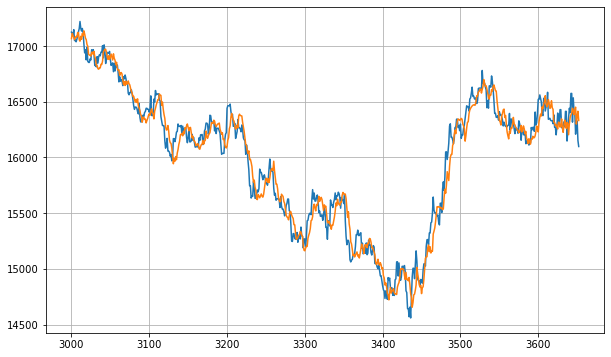

{'mae': 95.121864,
 'mse': 14782.062,
 'rmse': 121.581505,
 'mape': 0.5981941,
 'mase': 1.8380448}

In [11]:
# Load in best performing model
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(valid_set)

# Get mae and loss from history log
mae=history_4.history['mae']
val_mae=history_4.history['val_mae']
loss=history_4.history['loss']
val_loss=history_4.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_4 = model_forecast(model_4, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_4 = forecast_4.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_4))

eval_model_4 = evaluate_preds(y_true=x_valid,
                               y_pred=results_4)
eval_model_4

In [12]:
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(7)
], name="model_5")

# Get initial weights
init_weights = model_5.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_5.set_weights(init_weights)

model_5.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_5.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_5 = model_5.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_5.name)])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
Total params: 2,455
Trainable params: 2,455
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     17/Unknown - 2s 19ms/step - loss: 15420.0479 - mae: 15420.5479

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 4s 79ms/step - loss: 15285.7119 - mae: 15286.2119 - val_loss: 14436.7852 - val_mae: 14437.2861
Epoch 2/100
17/24 [====================>.........] - ETA: 0s - loss: 13382.7598 - mae: 13383.2598

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 13148.7422 - mae: 13149.2422 - val_loss: 11506.3145 - val_mae: 11506.8145
Epoch 3/100
16/24 [===================>..........] - ETA: 0s - loss: 10403.1963 - mae: 10403.6963

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 10340.9473 - mae: 10341.4473 - val_loss: 9811.2266 - val_mae: 9811.7266
Epoch 4/100
17/24 [====================>.........] - ETA: 0s - loss: 9191.5527 - mae: 9192.0527

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 69ms/step - loss: 9157.8828 - mae: 9158.3828 - val_loss: 8754.5918 - val_mae: 8755.0918
Epoch 5/100
15/24 [=================>............] - ETA: 0s - loss: 8200.3887 - mae: 8200.8887

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 76ms/step - loss: 8179.3408 - mae: 8179.8413 - val_loss: 7799.7754 - val_mae: 7800.2754
Epoch 6/100
16/24 [===================>..........] - ETA: 0s - loss: 7329.2129 - mae: 7329.7129

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 63ms/step - loss: 7319.6982 - mae: 7320.1978 - val_loss: 7021.8306 - val_mae: 7022.3306
Epoch 7/100
16/24 [===================>..........] - ETA: 0s - loss: 6615.9307 - mae: 6616.4307

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 65ms/step - loss: 6595.6699 - mae: 6596.1704 - val_loss: 6310.4155 - val_mae: 6310.9155
Epoch 8/100
16/24 [===================>..........] - ETA: 0s - loss: 5921.7715 - mae: 5922.2715

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 76ms/step - loss: 5912.5625 - mae: 5913.0625 - val_loss: 5678.9028 - val_mae: 5679.4019
Epoch 9/100
16/24 [===================>..........] - ETA: 0s - loss: 5405.3555 - mae: 5405.8545

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 5415.4883 - mae: 5415.9873 - val_loss: 5248.8662 - val_mae: 5249.3662
Epoch 10/100
16/24 [===================>..........] - ETA: 0s - loss: 4979.4785 - mae: 4979.9775

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 70ms/step - loss: 4980.7783 - mae: 4981.2778 - val_loss: 4798.4712 - val_mae: 4798.9712
Epoch 11/100
17/24 [====================>.........] - ETA: 0s - loss: 4545.5845 - mae: 4546.0835

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 4528.6016 - mae: 4529.1006 - val_loss: 4314.5991 - val_mae: 4315.0981
Epoch 12/100
16/24 [===================>..........] - ETA: 0s - loss: 4059.9890 - mae: 4060.4885

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 4039.2729 - mae: 4039.7727 - val_loss: 3795.0735 - val_mae: 3795.5735
Epoch 13/100
16/24 [===================>..........] - ETA: 0s - loss: 3534.7671 - mae: 3535.2671

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 3497.8564 - mae: 3498.3564 - val_loss: 3217.3796 - val_mae: 3217.8792
Epoch 14/100
17/24 [====================>.........] - ETA: 0s - loss: 2932.0537 - mae: 2932.5532

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 2877.4451 - mae: 2877.9443 - val_loss: 2539.7651 - val_mae: 2540.2649
Epoch 15/100
16/24 [===================>..........] - ETA: 0s - loss: 2390.8389 - mae: 2391.3384

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 2357.6123 - mae: 2358.1121 - val_loss: 2147.6147 - val_mae: 2148.1145
Epoch 16/100
16/24 [===================>..........] - ETA: 0s - loss: 1982.7622 - mae: 1983.2618

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 1956.4209 - mae: 1956.9207 - val_loss: 1797.5712 - val_mae: 1798.0710
Epoch 17/100
16/24 [===================>..........] - ETA: 0s - loss: 1732.8357 - mae: 1733.3351

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 1718.9395 - mae: 1719.4387 - val_loss: 1594.8004 - val_mae: 1595.3002
Epoch 18/100
16/24 [===================>..........] - ETA: 0s - loss: 1539.2271 - mae: 1539.7268

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 70ms/step - loss: 1527.8871 - mae: 1528.3867 - val_loss: 1412.7426 - val_mae: 1413.2419
Epoch 19/100
18/24 [=====================>........] - ETA: 0s - loss: 1359.2028 - mae: 1359.7023

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 1348.4182 - mae: 1348.9177 - val_loss: 1219.3472 - val_mae: 1219.8463
Epoch 20/100
16/24 [===================>..........] - ETA: 0s - loss: 1172.6738 - mae: 1173.1733

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 1156.3644 - mae: 1156.8639 - val_loss: 1013.1653 - val_mae: 1013.6640
Epoch 21/100
16/24 [===================>..........] - ETA: 0s - loss: 924.2209 - mae: 924.7205

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 858.7330 - mae: 859.2325 - val_loss: 545.2856 - val_mae: 545.7852
Epoch 22/100
16/24 [===================>..........] - ETA: 0s - loss: 331.2028 - mae: 331.7023

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 304.9427 - mae: 305.4423 - val_loss: 182.1218 - val_mae: 182.6214
Epoch 23/100
16/24 [===================>..........] - ETA: 0s - loss: 203.9633 - mae: 204.4629

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 199.8524 - mae: 200.3519 - val_loss: 153.7764 - val_mae: 154.2758
Epoch 24/100
24/24 [==============================] - 1s 19ms/step - loss: 193.9711 - mae: 194.4706 - val_loss: 212.1448 - val_mae: 212.6445
Epoch 25/100
24/24 [==============================] - 1s 19ms/step - loss: 204.6949 - mae: 205.1941 - val_loss: 160.2492 - val_mae: 160.7482
Epoch 26/100
17/24 [====================>.........] - ETA: 0s - loss: 193.7460 - mae: 194.2454

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 190.5892 - mae: 191.0885 - val_loss: 141.9572 - val_mae: 142.4559
Epoch 27/100
15/24 [=================>............] - ETA: 0s - loss: 190.6628 - mae: 191.1623

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 186.5420 - mae: 187.0415 - val_loss: 140.3548 - val_mae: 140.8537
Epoch 28/100
24/24 [==============================] - 1s 19ms/step - loss: 187.1026 - mae: 187.6019 - val_loss: 148.2130 - val_mae: 148.7125
Epoch 29/100
24/24 [==============================] - 1s 20ms/step - loss: 186.3201 - mae: 186.8196 - val_loss: 153.7845 - val_mae: 154.2841
Epoch 30/100
24/24 [==============================] - 1s 22ms/step - loss: 183.6017 - mae: 184.1011 - val_loss: 159.5027 - val_mae: 160.0020
Epoch 31/100
24/24 [==============================] - 1s 20ms/step - loss: 190.7016 - mae: 191.2011 - val_loss: 156.2924 - val_mae: 156.7914
Epoch 32/100
16/24 [===================>..........] - ETA: 0s - loss: 202.5446 - mae: 203.0440

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 67ms/step - loss: 205.2111 - mae: 205.7106 - val_loss: 140.0004 - val_mae: 140.4998
Epoch 33/100
18/24 [=====================>........] - ETA: 0s - loss: 196.3780 - mae: 196.8774

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 192.5209 - mae: 193.0202 - val_loss: 138.7372 - val_mae: 139.2360
Epoch 34/100
24/24 [==============================] - 1s 19ms/step - loss: 183.3626 - mae: 183.8618 - val_loss: 161.5495 - val_mae: 162.0488
Epoch 35/100
16/24 [===================>..........] - ETA: 0s - loss: 182.3351 - mae: 182.8346

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 183.2577 - mae: 183.7573 - val_loss: 137.7043 - val_mae: 138.2029
Epoch 36/100
17/24 [====================>.........] - ETA: 0s - loss: 191.9472 - mae: 192.4467

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 189.6626 - mae: 190.1620 - val_loss: 137.3092 - val_mae: 137.8081
Epoch 37/100
24/24 [==============================] - 1s 19ms/step - loss: 186.3224 - mae: 186.8218 - val_loss: 176.7660 - val_mae: 177.2658
Epoch 38/100
24/24 [==============================] - 1s 19ms/step - loss: 185.7840 - mae: 186.2832 - val_loss: 146.7349 - val_mae: 147.2343
Epoch 39/100
24/24 [==============================] - 1s 20ms/step - loss: 181.1208 - mae: 181.6199 - val_loss: 170.5141 - val_mae: 171.0132
Epoch 40/100
24/24 [==============================] - 1s 19ms/step - loss: 184.4781 - mae: 184.9773 - val_loss: 147.8953 - val_mae: 148.3951
Epoch 41/100
24/24 [==============================] - 1s 20ms/step - loss: 179.4669 - mae: 179.9660 - val_loss: 143.0917 - val_mae: 143.5911
Epoch 42/100
17/24 [====================>.........] - ETA: 0s - loss: 180.5970 - mae: 181.0964

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 177.8989 - mae: 178.3982 - val_loss: 133.0099 - val_mae: 133.5094
Epoch 43/100
24/24 [==============================] - 1s 19ms/step - loss: 184.9670 - mae: 185.4665 - val_loss: 162.4265 - val_mae: 162.9258
Epoch 44/100
24/24 [==============================] - 1s 19ms/step - loss: 176.8206 - mae: 177.3201 - val_loss: 154.6805 - val_mae: 155.1799
Epoch 45/100
17/24 [====================>.........] - ETA: 0s - loss: 185.4713 - mae: 185.9707

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 181.6390 - mae: 182.1384 - val_loss: 132.3114 - val_mae: 132.8099
Epoch 46/100
24/24 [==============================] - 1s 19ms/step - loss: 173.9947 - mae: 174.4940 - val_loss: 139.5085 - val_mae: 140.0081
Epoch 47/100
16/24 [===================>..........] - ETA: 0s - loss: 189.5431 - mae: 190.0425

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 181.7158 - mae: 182.2153 - val_loss: 131.3370 - val_mae: 131.8358
Epoch 48/100
16/24 [===================>..........] - ETA: 0s - loss: 172.7954 - mae: 173.2946

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 170.3651 - mae: 170.8643 - val_loss: 131.0508 - val_mae: 131.5503
Epoch 49/100
16/24 [===================>..........] - ETA: 0s - loss: 169.5967 - mae: 170.0961

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 170.1329 - mae: 170.6322 - val_loss: 129.7043 - val_mae: 130.2029
Epoch 50/100
24/24 [==============================] - 1s 20ms/step - loss: 170.3557 - mae: 170.8551 - val_loss: 132.9811 - val_mae: 133.4801
Epoch 51/100
24/24 [==============================] - 1s 19ms/step - loss: 173.2379 - mae: 173.7374 - val_loss: 139.1673 - val_mae: 139.6668
Epoch 52/100
16/24 [===================>..........] - ETA: 0s - loss: 179.1277 - mae: 179.6268

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 71ms/step - loss: 176.7107 - mae: 177.2098 - val_loss: 129.2732 - val_mae: 129.7726
Epoch 53/100
16/24 [===================>..........] - ETA: 0s - loss: 175.7072 - mae: 176.2067

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 171.1040 - mae: 171.6034 - val_loss: 129.2588 - val_mae: 129.7575
Epoch 54/100
24/24 [==============================] - 1s 19ms/step - loss: 170.4409 - mae: 170.9400 - val_loss: 129.3652 - val_mae: 129.8640
Epoch 55/100
16/24 [===================>..........] - ETA: 0s - loss: 169.7759 - mae: 170.2753

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 168.7099 - mae: 169.2093 - val_loss: 128.1126 - val_mae: 128.6120
Epoch 56/100
17/24 [====================>.........] - ETA: 0s - loss: 168.4154 - mae: 168.9147

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 165.2966 - mae: 165.7958 - val_loss: 127.7641 - val_mae: 128.2630
Epoch 57/100
24/24 [==============================] - 1s 20ms/step - loss: 167.2509 - mae: 167.7503 - val_loss: 128.1891 - val_mae: 128.6888
Epoch 58/100
17/24 [====================>.........] - ETA: 0s - loss: 162.3767 - mae: 162.8759

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 164.3949 - mae: 164.8942 - val_loss: 126.4195 - val_mae: 126.9190
Epoch 59/100
24/24 [==============================] - 1s 19ms/step - loss: 162.8605 - mae: 163.3598 - val_loss: 129.5810 - val_mae: 130.0804
Epoch 60/100
24/24 [==============================] - 1s 19ms/step - loss: 163.3897 - mae: 163.8891 - val_loss: 132.9699 - val_mae: 133.4693
Epoch 61/100
24/24 [==============================] - 1s 19ms/step - loss: 163.8014 - mae: 164.3006 - val_loss: 141.1920 - val_mae: 141.6915
Epoch 62/100
24/24 [==============================] - 1s 19ms/step - loss: 165.2391 - mae: 165.7382 - val_loss: 133.2121 - val_mae: 133.7113
Epoch 63/100
16/24 [===================>..........] - ETA: 0s - loss: 162.6208 - mae: 163.1204

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 159.3745 - mae: 159.8740 - val_loss: 124.9161 - val_mae: 125.4157
Epoch 64/100
24/24 [==============================] - 1s 20ms/step - loss: 162.7156 - mae: 163.2149 - val_loss: 127.2775 - val_mae: 127.7769
Epoch 65/100
24/24 [==============================] - 1s 19ms/step - loss: 161.1338 - mae: 161.6331 - val_loss: 139.3341 - val_mae: 139.8335
Epoch 66/100
24/24 [==============================] - 1s 19ms/step - loss: 162.9104 - mae: 163.4096 - val_loss: 128.1078 - val_mae: 128.6073
Epoch 67/100
24/24 [==============================] - 1s 19ms/step - loss: 157.5463 - mae: 158.0455 - val_loss: 151.9176 - val_mae: 152.4171
Epoch 68/100
15/24 [=================>............] - ETA: 0s - loss: 173.6905 - mae: 174.1896

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 168.1483 - mae: 168.6473 - val_loss: 123.2207 - val_mae: 123.7200
Epoch 69/100
16/24 [===================>..........] - ETA: 0s - loss: 156.7835 - mae: 157.2829

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 69ms/step - loss: 156.0373 - mae: 156.5365 - val_loss: 122.1812 - val_mae: 122.6804
Epoch 70/100
16/24 [===================>..........] - ETA: 0s - loss: 163.4938 - mae: 163.9930

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 160.5439 - mae: 161.0431 - val_loss: 121.7554 - val_mae: 122.2546
Epoch 71/100
24/24 [==============================] - 1s 19ms/step - loss: 157.6918 - mae: 158.1911 - val_loss: 134.9398 - val_mae: 135.4389
Epoch 72/100
16/24 [===================>..........] - ETA: 0s - loss: 161.4940 - mae: 161.9933

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 158.0179 - mae: 158.5171 - val_loss: 120.2129 - val_mae: 120.7121
Epoch 73/100
24/24 [==============================] - 1s 19ms/step - loss: 153.3310 - mae: 153.8302 - val_loss: 120.5740 - val_mae: 121.0726
Epoch 74/100
17/24 [====================>.........] - ETA: 0s - loss: 162.9483 - mae: 163.4479

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 158.6613 - mae: 159.1608 - val_loss: 118.3768 - val_mae: 118.8762
Epoch 75/100
24/24 [==============================] - 1s 19ms/step - loss: 154.8020 - mae: 155.3011 - val_loss: 119.9681 - val_mae: 120.4666
Epoch 76/100
24/24 [==============================] - 1s 19ms/step - loss: 154.7348 - mae: 155.2341 - val_loss: 135.2720 - val_mae: 135.7711
Epoch 77/100
24/24 [==============================] - 1s 19ms/step - loss: 150.7569 - mae: 151.2561 - val_loss: 130.4015 - val_mae: 130.9010
Epoch 78/100
16/24 [===================>..........] - ETA: 0s - loss: 153.9905 - mae: 154.4897

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 148.9762 - mae: 149.4754 - val_loss: 117.1940 - val_mae: 117.6930
Epoch 79/100
24/24 [==============================] - 1s 20ms/step - loss: 148.2720 - mae: 148.7711 - val_loss: 152.0683 - val_mae: 152.5680
Epoch 80/100
24/24 [==============================] - 1s 19ms/step - loss: 160.2989 - mae: 160.7979 - val_loss: 121.5673 - val_mae: 122.0663
Epoch 81/100
24/24 [==============================] - 1s 19ms/step - loss: 163.3630 - mae: 163.8624 - val_loss: 118.5885 - val_mae: 119.0878
Epoch 82/100
24/24 [==============================] - 1s 20ms/step - loss: 145.9984 - mae: 146.4976 - val_loss: 125.3314 - val_mae: 125.8303
Epoch 83/100
24/24 [==============================] - 1s 20ms/step - loss: 153.8284 - mae: 154.3277 - val_loss: 123.0669 - val_mae: 123.5663
Epoch 84/100
24/24 [==============================] - 1s 21ms/step - loss: 153.9885 - mae: 154.4875 - val_loss: 128.0571 - val_mae: 128.5562
Epoch 85/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 59ms/step - loss: 147.4662 - mae: 147.9655 - val_loss: 114.3993 - val_mae: 114.8982
Epoch 88/100
17/24 [====================>.........] - ETA: 0s - loss: 147.1803 - mae: 147.6794

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 60ms/step - loss: 146.0369 - mae: 146.5360 - val_loss: 112.8099 - val_mae: 113.3090
Epoch 89/100
24/24 [==============================] - 1s 19ms/step - loss: 142.6048 - mae: 143.1041 - val_loss: 129.1422 - val_mae: 129.6414
Epoch 90/100
24/24 [==============================] - 1s 19ms/step - loss: 144.9609 - mae: 145.4599 - val_loss: 115.3856 - val_mae: 115.8844
Epoch 91/100
24/24 [==============================] - 1s 19ms/step - loss: 139.7757 - mae: 140.2751 - val_loss: 117.3430 - val_mae: 117.8420
Epoch 92/100
16/24 [===================>..........] - ETA: 0s - loss: 145.7119 - mae: 146.2113

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 142.9204 - mae: 143.4198 - val_loss: 112.0218 - val_mae: 112.5215
Epoch 93/100
16/24 [===================>..........] - ETA: 0s - loss: 140.6277 - mae: 141.1270

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 139.8752 - mae: 140.3745 - val_loss: 110.3126 - val_mae: 110.8119
Epoch 94/100
24/24 [==============================] - 1s 19ms/step - loss: 139.9503 - mae: 140.4496 - val_loss: 111.5804 - val_mae: 112.0796
Epoch 95/100
24/24 [==============================] - 1s 19ms/step - loss: 137.4645 - mae: 137.9637 - val_loss: 118.9194 - val_mae: 119.4181
Epoch 96/100
24/24 [==============================] - 1s 19ms/step - loss: 142.3944 - mae: 142.8937 - val_loss: 124.6389 - val_mae: 125.1379
Epoch 97/100
24/24 [==============================] - 1s 19ms/step - loss: 140.9409 - mae: 141.4402 - val_loss: 116.7007 - val_mae: 117.1995
Epoch 98/100
16/24 [===================>..........] - ETA: 0s - loss: 142.1110 - mae: 142.6102

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 69ms/step - loss: 138.3223 - mae: 138.8214 - val_loss: 109.4394 - val_mae: 109.9380
Epoch 99/100
17/24 [====================>.........] - ETA: 0s - loss: 143.6622 - mae: 144.1616

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 63ms/step - loss: 140.9044 - mae: 141.4036 - val_loss: 108.4651 - val_mae: 108.9640
Epoch 100/100
24/24 [==============================] - 1s 19ms/step - loss: 137.7035 - mae: 138.2023 - val_loss: 122.4005 - val_mae: 122.8998


5/5 [==============================] - 0s 11ms/step - loss: 108.4651 - mae: 108.9640


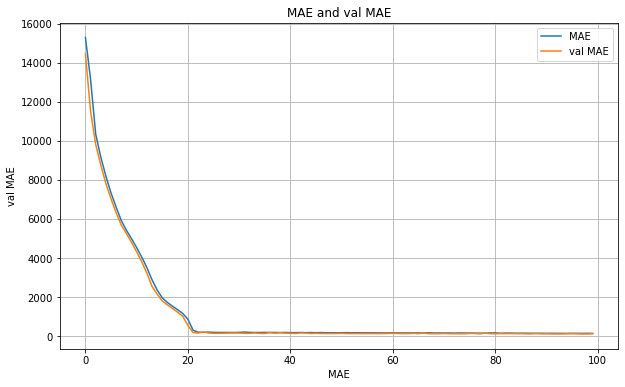

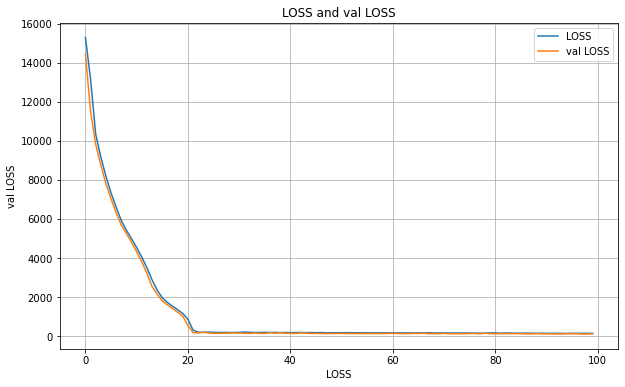

6/6 [==============================] - 0s 22ms/step


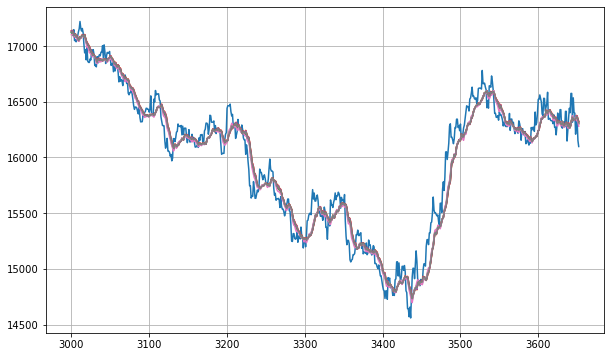

{'mae': 107.08035,
 'mse': 19030.744,
 'rmse': 107.58305,
 'mape': 0.67343193,
 'mase': 2.069119}

In [13]:
# Load in best performing model
model_5 = tf.keras.models.load_model("model_experiments/model_5/")
model_5.evaluate(valid_set)

# Get mae and loss from history log
mae=history_5.history['mae']
val_mae=history_5.history['val_mae']
loss=history_5.history['loss']
val_loss=history_5.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_5 = model_forecast(model_5, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_5 = forecast_5.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_5))

# Reshape the array to the desired format
repeated_arr = np.repeat(x_valid, 7)
x_valid_h = repeated_arr.reshape((653, 7)).astype(np.float32)

eval_model_5 = evaluate_predss(y_true=x_valid_h,
                               y_pred=results_5)
eval_model_5

In [14]:
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                            strides=1,
                            activation="relu",
                            padding='causal',
                            input_shape=[window_size, 1]),
    tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer
    tf.keras.layers.Dense(1)
], name="model_6")

# Get initial weights
init_weights = model_6.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_6.set_weights(init_weights)

model_6.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_6.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_6 = model_6.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_6.name)])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            256       
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     22/Unknown - 1s 17ms/step - loss: 14008.3936 - mae: 14008.8936

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 2s 63ms/step - loss: 13794.6885 - mae: 13795.1875 - val_loss: 9092.2227 - val_mae: 9092.7227
Epoch 2/100
23/24 [===========================>..] - ETA: 0s - loss: 4691.8989 - mae: 4692.3989

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 4652.7559 - mae: 4653.2559 - val_loss: 315.6017 - val_mae: 316.1010
Epoch 3/100
16/24 [===================>..........] - ETA: 0s - loss: 770.8417 - mae: 771.3416

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 53ms/step - loss: 672.6764 - mae: 673.1762 - val_loss: 180.8126 - val_mae: 181.3122
Epoch 4/100
24/24 [==============================] - 1s 21ms/step - loss: 246.9627 - mae: 247.4622 - val_loss: 198.4674 - val_mae: 198.9671
Epoch 5/100
23/24 [===========================>..] - ETA: 0s - loss: 228.3038 - mae: 228.8034

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 53ms/step - loss: 227.7644 - mae: 228.2639 - val_loss: 165.9913 - val_mae: 166.4910
Epoch 6/100
24/24 [==============================] - 1s 22ms/step - loss: 218.6364 - mae: 219.1360 - val_loss: 167.1197 - val_mae: 167.6192
Epoch 7/100
24/24 [==============================] - 1s 21ms/step - loss: 221.1028 - mae: 221.6020 - val_loss: 168.6743 - val_mae: 169.1737
Epoch 8/100
24/24 [==============================] - 1s 22ms/step - loss: 223.7893 - mae: 224.2888 - val_loss: 176.4750 - val_mae: 176.9737
Epoch 9/100
24/24 [==============================] - 1s 22ms/step - loss: 220.5298 - mae: 221.0296 - val_loss: 179.2903 - val_mae: 179.7896
Epoch 10/100
24/24 [==============================] - 1s 22ms/step - loss: 219.8116 - mae: 220.3112 - val_loss: 169.3947 - val_mae: 169.8933
Epoch 11/100
23/24 [===========================>..] - ETA: 0s - loss: 218.8573 - mae: 219.3565

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 2s 61ms/step - loss: 218.9981 - mae: 219.4972 - val_loss: 164.9080 - val_mae: 165.4077
Epoch 12/100
24/24 [==============================] - 1s 21ms/step - loss: 221.7132 - mae: 222.2126 - val_loss: 166.9080 - val_mae: 167.4077
Epoch 13/100
24/24 [==============================] - 1s 21ms/step - loss: 222.9550 - mae: 223.4545 - val_loss: 170.0271 - val_mae: 170.5266
Epoch 14/100
16/24 [===================>..........] - ETA: 0s - loss: 228.7290 - mae: 229.2285

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 225.1193 - mae: 225.6188 - val_loss: 164.6631 - val_mae: 165.1627
Epoch 15/100
24/24 [==============================] - 1s 21ms/step - loss: 220.6562 - mae: 221.1555 - val_loss: 165.0811 - val_mae: 165.5801
Epoch 16/100
24/24 [==============================] - 1s 21ms/step - loss: 223.4961 - mae: 223.9958 - val_loss: 168.2015 - val_mae: 168.7009
Epoch 17/100
16/24 [===================>..........] - ETA: 0s - loss: 233.7556 - mae: 234.2551

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 231.5779 - mae: 232.0773 - val_loss: 163.2840 - val_mae: 163.7831
Epoch 18/100
24/24 [==============================] - 1s 21ms/step - loss: 222.2356 - mae: 222.7351 - val_loss: 163.6427 - val_mae: 164.1421
Epoch 19/100
15/24 [=================>............] - ETA: 0s - loss: 229.2477 - mae: 229.7467

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 222.8532 - mae: 223.3523 - val_loss: 162.4986 - val_mae: 162.9969
Epoch 20/100
24/24 [==============================] - 1s 21ms/step - loss: 218.9845 - mae: 219.4839 - val_loss: 164.6106 - val_mae: 165.1099
Epoch 21/100
24/24 [==============================] - 1s 21ms/step - loss: 218.1191 - mae: 218.6189 - val_loss: 163.2515 - val_mae: 163.7513
Epoch 22/100
24/24 [==============================] - 1s 21ms/step - loss: 220.6166 - mae: 221.1158 - val_loss: 162.5757 - val_mae: 163.0755
Epoch 23/100
16/24 [===================>..........] - ETA: 0s - loss: 215.4955 - mae: 215.9947

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 216.0390 - mae: 216.5383 - val_loss: 161.9442 - val_mae: 162.4442
Epoch 24/100
15/24 [=================>............] - ETA: 0s - loss: 221.5277 - mae: 222.0273

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 217.8239 - mae: 218.3235 - val_loss: 161.8398 - val_mae: 162.3398
Epoch 25/100
15/24 [=================>............] - ETA: 0s - loss: 221.9876 - mae: 222.4868

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 53ms/step - loss: 219.2866 - mae: 219.7859 - val_loss: 161.7993 - val_mae: 162.2993
Epoch 26/100
24/24 [==============================] - 1s 21ms/step - loss: 218.7707 - mae: 219.2702 - val_loss: 180.7029 - val_mae: 181.2023
Epoch 27/100
16/24 [===================>..........] - ETA: 0s - loss: 225.1104 - mae: 225.6100

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 219.4271 - mae: 219.9267 - val_loss: 161.3743 - val_mae: 161.8743
Epoch 28/100
24/24 [==============================] - 1s 22ms/step - loss: 216.5326 - mae: 217.0320 - val_loss: 161.5021 - val_mae: 162.0009
Epoch 29/100
24/24 [==============================] - 1s 21ms/step - loss: 214.2905 - mae: 214.7894 - val_loss: 163.0331 - val_mae: 163.5324
Epoch 30/100
24/24 [==============================] - 1s 20ms/step - loss: 214.0440 - mae: 214.5430 - val_loss: 162.6458 - val_mae: 163.1454
Epoch 31/100
24/24 [==============================] - 1s 21ms/step - loss: 215.0907 - mae: 215.5902 - val_loss: 169.9324 - val_mae: 170.4315
Epoch 32/100
24/24 [==============================] - 1s 21ms/step - loss: 219.8717 - mae: 220.3711 - val_loss: 163.1363 - val_mae: 163.6363
Epoch 33/100
24/24 [==============================] - 1s 20ms/step - loss: 214.8470 - mae: 215.3464 - val_loss: 164.6716 - val_mae: 165.1709
Epoch 34/100
16/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 215.6044 - mae: 216.1039 - val_loss: 160.7652 - val_mae: 161.2642
Epoch 35/100
16/24 [===================>..........] - ETA: 0s - loss: 223.1886 - mae: 223.6883

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 221.5395 - mae: 222.0391 - val_loss: 160.2893 - val_mae: 160.7883
Epoch 36/100
24/24 [==============================] - 1s 21ms/step - loss: 213.2789 - mae: 213.7782 - val_loss: 161.6335 - val_mae: 162.1334
Epoch 37/100
24/24 [==============================] - 1s 21ms/step - loss: 220.3090 - mae: 220.8087 - val_loss: 172.1452 - val_mae: 172.6449
Epoch 38/100
24/24 [==============================] - 1s 21ms/step - loss: 211.6485 - mae: 212.1484 - val_loss: 166.9313 - val_mae: 167.4305
Epoch 39/100
24/24 [==============================] - 1s 21ms/step - loss: 215.1502 - mae: 215.6499 - val_loss: 161.4083 - val_mae: 161.9073
Epoch 40/100
24/24 [==============================] - 1s 21ms/step - loss: 221.3466 - mae: 221.8461 - val_loss: 161.0948 - val_mae: 161.5948
Epoch 41/100
24/24 [==============================] - 1s 21ms/step - loss: 211.1010 - mae: 211.6003 - val_loss: 161.7466 - val_mae: 162.2465
Epoch 42/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 50ms/step - loss: 212.6331 - mae: 213.1327 - val_loss: 158.5759 - val_mae: 159.0755
Epoch 44/100
24/24 [==============================] - 1s 21ms/step - loss: 218.5537 - mae: 219.0533 - val_loss: 173.3149 - val_mae: 173.8146
Epoch 45/100
24/24 [==============================] - 1s 21ms/step - loss: 222.1087 - mae: 222.6079 - val_loss: 162.5453 - val_mae: 163.0450
Epoch 46/100
24/24 [==============================] - 1s 21ms/step - loss: 210.8775 - mae: 211.3774 - val_loss: 158.7981 - val_mae: 159.2973
Epoch 47/100
24/24 [==============================] - 1s 21ms/step - loss: 212.4256 - mae: 212.9246 - val_loss: 165.8108 - val_mae: 166.3086
Epoch 48/100
24/24 [==============================] - 1s 21ms/step - loss: 208.8659 - mae: 209.3653 - val_loss: 163.6033 - val_mae: 164.1032
Epoch 49/100
24/24 [==============================] - 1s 21ms/step - loss: 217.0787 - mae: 217.5779 - val_loss: 162.7586 - val_mae: 163.2578
Epoch 50/100
16/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 215.0873 - mae: 215.5869 - val_loss: 157.1858 - val_mae: 157.6851
Epoch 51/100
16/24 [===================>..........] - ETA: 0s - loss: 216.6044 - mae: 217.1040

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 2s 63ms/step - loss: 213.0663 - mae: 213.5661 - val_loss: 157.0022 - val_mae: 157.5013
Epoch 52/100
24/24 [==============================] - 1s 20ms/step - loss: 209.4442 - mae: 209.9436 - val_loss: 157.1123 - val_mae: 157.6117
Epoch 53/100
24/24 [==============================] - 1s 20ms/step - loss: 209.7285 - mae: 210.2278 - val_loss: 161.6188 - val_mae: 162.1188
Epoch 54/100
24/24 [==============================] - 1s 20ms/step - loss: 223.4133 - mae: 223.9126 - val_loss: 161.8633 - val_mae: 162.3624
Epoch 55/100
24/24 [==============================] - 1s 21ms/step - loss: 219.3067 - mae: 219.8064 - val_loss: 161.0282 - val_mae: 161.5277
Epoch 56/100
24/24 [==============================] - 1s 21ms/step - loss: 220.2849 - mae: 220.7844 - val_loss: 158.8323 - val_mae: 159.3323
Epoch 57/100
24/24 [==============================] - 1s 21ms/step - loss: 215.3843 - mae: 215.8834 - val_loss: 170.7213 - val_mae: 171.2210
Epoch 58/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 212.2289 - mae: 212.7281 - val_loss: 156.7020 - val_mae: 157.2020
Epoch 60/100
24/24 [==============================] - 1s 21ms/step - loss: 206.9775 - mae: 207.4767 - val_loss: 157.5205 - val_mae: 158.0201
Epoch 61/100
16/24 [===================>..........] - ETA: 0s - loss: 208.4490 - mae: 208.9488

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 205.4966 - mae: 205.9963 - val_loss: 155.2709 - val_mae: 155.7708
Epoch 62/100
24/24 [==============================] - 1s 21ms/step - loss: 210.8563 - mae: 211.3556 - val_loss: 179.6187 - val_mae: 180.1185
Epoch 63/100
24/24 [==============================] - 1s 21ms/step - loss: 211.4176 - mae: 211.9170 - val_loss: 173.7717 - val_mae: 174.2705
Epoch 64/100
24/24 [==============================] - 1s 21ms/step - loss: 210.8612 - mae: 211.3607 - val_loss: 156.0138 - val_mae: 156.5137
Epoch 65/100
24/24 [==============================] - 1s 21ms/step - loss: 209.6431 - mae: 210.1427 - val_loss: 171.8102 - val_mae: 172.3099
Epoch 66/100
16/24 [===================>..........] - ETA: 0s - loss: 218.9714 - mae: 219.4712

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 210.5577 - mae: 211.0572 - val_loss: 154.4311 - val_mae: 154.9299
Epoch 67/100
24/24 [==============================] - 1s 22ms/step - loss: 212.7549 - mae: 213.2540 - val_loss: 160.6781 - val_mae: 161.1773
Epoch 68/100
24/24 [==============================] - 1s 21ms/step - loss: 210.9822 - mae: 211.4815 - val_loss: 155.0540 - val_mae: 155.5540
Epoch 69/100
24/24 [==============================] - 1s 21ms/step - loss: 204.7922 - mae: 205.2910 - val_loss: 156.8684 - val_mae: 157.3684
Epoch 70/100
24/24 [==============================] - 1s 21ms/step - loss: 210.2421 - mae: 210.7412 - val_loss: 157.3769 - val_mae: 157.8760
Epoch 71/100
24/24 [==============================] - 1s 21ms/step - loss: 206.9640 - mae: 207.4635 - val_loss: 164.3109 - val_mae: 164.8109
Epoch 72/100
24/24 [==============================] - 1s 22ms/step - loss: 209.1293 - mae: 209.6289 - val_loss: 171.5702 - val_mae: 172.0701
Epoch 73/100
16/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 216.4486 - mae: 216.9483 - val_loss: 154.1134 - val_mae: 154.6119
Epoch 74/100
24/24 [==============================] - 1s 21ms/step - loss: 206.5205 - mae: 207.0201 - val_loss: 160.1283 - val_mae: 160.6282
Epoch 75/100
16/24 [===================>..........] - ETA: 0s - loss: 213.3232 - mae: 213.8232

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 210.4033 - mae: 210.9033 - val_loss: 153.3177 - val_mae: 153.8168
Epoch 76/100
24/24 [==============================] - 1s 21ms/step - loss: 207.9816 - mae: 208.4807 - val_loss: 158.0521 - val_mae: 158.5514
Epoch 77/100
24/24 [==============================] - 1s 22ms/step - loss: 208.6102 - mae: 209.1099 - val_loss: 190.2821 - val_mae: 190.7812
Epoch 78/100
16/24 [===================>..........] - ETA: 0s - loss: 234.2999 - mae: 234.7993

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 224.7130 - mae: 225.2124 - val_loss: 152.6285 - val_mae: 153.1273
Epoch 79/100
24/24 [==============================] - 1s 21ms/step - loss: 201.7027 - mae: 202.2014 - val_loss: 153.4314 - val_mae: 153.9312
Epoch 80/100
24/24 [==============================] - 1s 21ms/step - loss: 208.7126 - mae: 209.2118 - val_loss: 160.9214 - val_mae: 161.4213
Epoch 81/100
24/24 [==============================] - 1s 21ms/step - loss: 216.7434 - mae: 217.2426 - val_loss: 157.7652 - val_mae: 158.2648
Epoch 82/100
24/24 [==============================] - 1s 21ms/step - loss: 224.0062 - mae: 224.5058 - val_loss: 156.3714 - val_mae: 156.8714
Epoch 83/100
24/24 [==============================] - 1s 21ms/step - loss: 203.9688 - mae: 204.4685 - val_loss: 160.0226 - val_mae: 160.5225
Epoch 84/100
24/24 [==============================] - 1s 21ms/step - loss: 211.2187 - mae: 211.7184 - val_loss: 161.8423 - val_mae: 162.3423
Epoch 85/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 209.6972 - mae: 210.1963 - val_loss: 150.9025 - val_mae: 151.4019
Epoch 94/100
24/24 [==============================] - 1s 21ms/step - loss: 202.0928 - mae: 202.5926 - val_loss: 157.4275 - val_mae: 157.9265
Epoch 95/100
24/24 [==============================] - 1s 21ms/step - loss: 213.3140 - mae: 213.8133 - val_loss: 162.8382 - val_mae: 163.3378
Epoch 96/100
16/24 [===================>..........] - ETA: 0s - loss: 210.5132 - mae: 211.0127

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 205.2956 - mae: 205.7951 - val_loss: 150.8644 - val_mae: 151.3637
Epoch 97/100
16/24 [===================>..........] - ETA: 0s - loss: 201.7011 - mae: 202.2007

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 201.9181 - mae: 202.4178 - val_loss: 150.3269 - val_mae: 150.8247
Epoch 98/100
24/24 [==============================] - 1s 21ms/step - loss: 209.0415 - mae: 209.5410 - val_loss: 175.9819 - val_mae: 176.4816
Epoch 99/100
16/24 [===================>..........] - ETA: 0s - loss: 210.1328 - mae: 210.6322

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 206.3814 - mae: 206.8808 - val_loss: 150.0101 - val_mae: 150.5091
Epoch 100/100
24/24 [==============================] - 1s 21ms/step - loss: 207.6236 - mae: 208.1230 - val_loss: 166.0002 - val_mae: 166.4992


5/5 [==============================] - 0s 12ms/step - loss: 150.0101 - mae: 150.5092


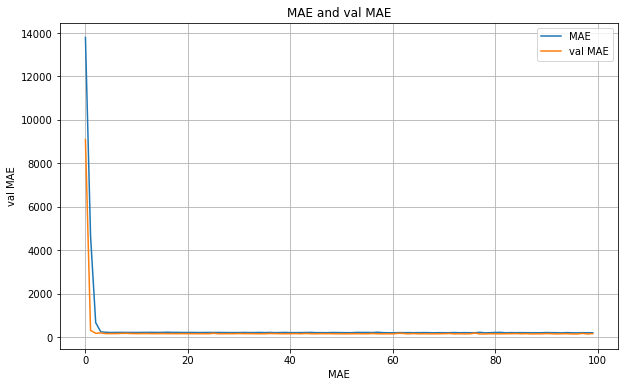

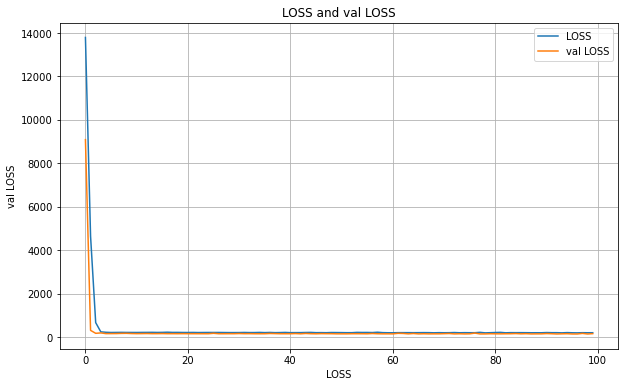

6/6 [==============================] - 0s 21ms/step


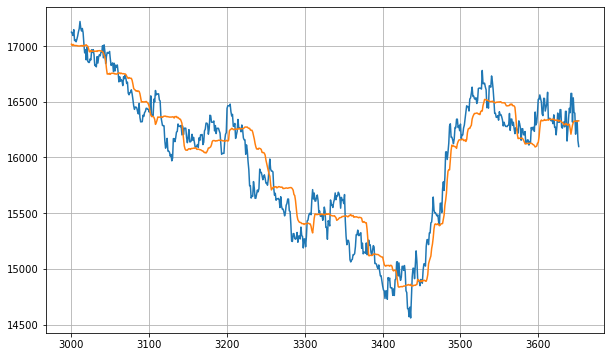

{'mae': 147.61456,
 'mse': 32713.25,
 'rmse': 180.86804,
 'mape': 0.9293015,
 'mase': 2.8523638}

In [15]:
# Load in best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6/")
model_6.evaluate(valid_set)

# Get mae and loss from history log
mae=history_6.history['mae']
val_mae=history_6.history['val_mae']
loss=history_6.history['loss']
val_loss=history_6.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_6 = model_forecast(model_6, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_6 = forecast_6.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_6))

eval_model_6 = evaluate_preds(y_true=x_valid,
                               y_pred=results_6)
eval_model_6

In [16]:
modeld_7 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=512, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer
  tf.keras.layers.Dense(1)
], name="modeld_7")

# Get initial weights
init_weights = modeld_7.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
modeld_7.set_weights(init_weights)

modeld_7.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
modeld_7.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_7 = modeld_7.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=modeld_7.name)])

Model: "modeld_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 512)           2048      
                                                                 
 global_max_pooling1d (Globa  (None, 512)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     24/Unknown - 2s 32ms/step - loss: 5925.9609 - mae: 5926.4614

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 3s 79ms/step - loss: 5925.9609 - mae: 5926.4614 - val_loss: 2067.2212 - val_mae: 2067.7212
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 708.8387 - mae: 709.3386

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 69ms/step - loss: 708.8387 - mae: 709.3386 - val_loss: 358.6028 - val_mae: 359.1023
Epoch 3/100
23/24 [===========================>..] - ETA: 0s - loss: 271.8547 - mae: 272.3542

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 68ms/step - loss: 271.7010 - mae: 272.2004 - val_loss: 209.7108 - val_mae: 210.2101
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 249.7870 - mae: 250.2866

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 69ms/step - loss: 249.7870 - mae: 250.2866 - val_loss: 195.2019 - val_mae: 195.7012
Epoch 5/100
24/24 [==============================] - ETA: 0s - loss: 247.4659 - mae: 247.9653

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 69ms/step - loss: 247.4659 - mae: 247.9653 - val_loss: 179.5179 - val_mae: 180.0174
Epoch 6/100
23/24 [===========================>..] - ETA: 0s - loss: 243.0041 - mae: 243.5035

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 75ms/step - loss: 242.8035 - mae: 243.3029 - val_loss: 178.9513 - val_mae: 179.4513
Epoch 7/100
24/24 [==============================] - 1s 39ms/step - loss: 237.5524 - mae: 238.0522 - val_loss: 195.4752 - val_mae: 195.9735
Epoch 8/100
24/24 [==============================] - 1s 41ms/step - loss: 242.1114 - mae: 242.6110 - val_loss: 189.0497 - val_mae: 189.5488
Epoch 9/100
24/24 [==============================] - 1s 41ms/step - loss: 254.5733 - mae: 255.0728 - val_loss: 205.2676 - val_mae: 205.7675
Epoch 10/100
24/24 [==============================] - 1s 39ms/step - loss: 243.1507 - mae: 243.6504 - val_loss: 180.1784 - val_mae: 180.6777
Epoch 11/100
23/24 [===========================>..] - ETA: 0s - loss: 237.3626 - mae: 237.8618

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 74ms/step - loss: 237.5246 - mae: 238.0239 - val_loss: 176.2389 - val_mae: 176.7382
Epoch 12/100
24/24 [==============================] - 1s 39ms/step - loss: 238.6366 - mae: 239.1363 - val_loss: 177.4555 - val_mae: 177.9548
Epoch 13/100
24/24 [==============================] - 1s 40ms/step - loss: 240.2057 - mae: 240.7050 - val_loss: 186.9561 - val_mae: 187.4561
Epoch 14/100
24/24 [==============================] - 1s 40ms/step - loss: 236.4259 - mae: 236.9253 - val_loss: 178.0968 - val_mae: 178.5957
Epoch 15/100
24/24 [==============================] - 1s 40ms/step - loss: 235.7914 - mae: 236.2910 - val_loss: 185.2247 - val_mae: 185.7243
Epoch 16/100
24/24 [==============================] - 1s 41ms/step - loss: 238.8593 - mae: 239.3587 - val_loss: 180.2354 - val_mae: 180.7348
Epoch 17/100
24/24 [==============================] - 1s 40ms/step - loss: 231.0433 - mae: 231.5428 - val_loss: 201.8376 - val_mae: 202.3367
Epoch 18/100
23/24 [======

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 71ms/step - loss: 263.6532 - mae: 264.1528 - val_loss: 173.7251 - val_mae: 174.2251
Epoch 19/100
23/24 [===========================>..] - ETA: 0s - loss: 233.4774 - mae: 233.9771

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 69ms/step - loss: 233.4682 - mae: 233.9680 - val_loss: 172.2800 - val_mae: 172.7795
Epoch 20/100
24/24 [==============================] - ETA: 0s - loss: 239.5861 - mae: 240.0855

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 78ms/step - loss: 239.5861 - mae: 240.0855 - val_loss: 171.9963 - val_mae: 172.4960
Epoch 21/100
24/24 [==============================] - ETA: 0s - loss: 232.5385 - mae: 233.0377

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 67ms/step - loss: 232.5385 - mae: 233.0377 - val_loss: 170.5305 - val_mae: 171.0297
Epoch 22/100
24/24 [==============================] - 1s 37ms/step - loss: 243.4547 - mae: 243.9543 - val_loss: 170.8304 - val_mae: 171.3301
Epoch 23/100
24/24 [==============================] - ETA: 0s - loss: 255.9355 - mae: 256.4353

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 67ms/step - loss: 255.9355 - mae: 256.4353 - val_loss: 169.6754 - val_mae: 170.1754
Epoch 24/100
24/24 [==============================] - 1s 37ms/step - loss: 233.3525 - mae: 233.8518 - val_loss: 195.7305 - val_mae: 196.2305
Epoch 25/100
24/24 [==============================] - 1s 38ms/step - loss: 246.5649 - mae: 247.0644 - val_loss: 178.6320 - val_mae: 179.1316
Epoch 26/100
24/24 [==============================] - 1s 39ms/step - loss: 229.3012 - mae: 229.8001 - val_loss: 192.7169 - val_mae: 193.2162
Epoch 27/100
24/24 [==============================] - 1s 39ms/step - loss: 237.7848 - mae: 238.2844 - val_loss: 184.2402 - val_mae: 184.7401
Epoch 28/100
24/24 [==============================] - 1s 39ms/step - loss: 231.2076 - mae: 231.7069 - val_loss: 177.4618 - val_mae: 177.9606
Epoch 29/100
23/24 [===========================>..] - ETA: 0s - loss: 228.6520 - mae: 229.1519

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 68ms/step - loss: 228.4602 - mae: 228.9601 - val_loss: 169.3847 - val_mae: 169.8847
Epoch 30/100
24/24 [==============================] - 1s 38ms/step - loss: 225.9166 - mae: 226.4160 - val_loss: 171.2735 - val_mae: 171.7717
Epoch 31/100
24/24 [==============================] - 1s 39ms/step - loss: 220.6973 - mae: 221.1971 - val_loss: 177.7578 - val_mae: 178.2572
Epoch 32/100
24/24 [==============================] - 1s 39ms/step - loss: 244.0381 - mae: 244.5378 - val_loss: 197.7738 - val_mae: 198.2736
Epoch 33/100
23/24 [===========================>..] - ETA: 0s - loss: 223.2949 - mae: 223.7946

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 74ms/step - loss: 223.3269 - mae: 223.8265 - val_loss: 167.8087 - val_mae: 168.3086
Epoch 34/100
24/24 [==============================] - 1s 39ms/step - loss: 226.3845 - mae: 226.8841 - val_loss: 169.3465 - val_mae: 169.8458
Epoch 35/100
24/24 [==============================] - 1s 40ms/step - loss: 217.1227 - mae: 217.6221 - val_loss: 177.6073 - val_mae: 178.1070
Epoch 36/100
24/24 [==============================] - 1s 40ms/step - loss: 225.1076 - mae: 225.6073 - val_loss: 172.0467 - val_mae: 172.5457
Epoch 37/100
23/24 [===========================>..] - ETA: 0s - loss: 220.8061 - mae: 221.3052

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 72ms/step - loss: 220.1936 - mae: 220.6927 - val_loss: 163.8127 - val_mae: 164.3125
Epoch 38/100
24/24 [==============================] - 1s 38ms/step - loss: 217.0734 - mae: 217.5727 - val_loss: 188.1555 - val_mae: 188.6553
Epoch 39/100
24/24 [==============================] - 1s 39ms/step - loss: 229.9600 - mae: 230.4599 - val_loss: 206.0718 - val_mae: 206.5710
Epoch 40/100
23/24 [===========================>..] - ETA: 0s - loss: 222.3253 - mae: 222.8249

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 71ms/step - loss: 222.1055 - mae: 222.6051 - val_loss: 162.0575 - val_mae: 162.5575
Epoch 41/100
24/24 [==============================] - 1s 40ms/step - loss: 215.6389 - mae: 216.1384 - val_loss: 164.7180 - val_mae: 165.2173
Epoch 42/100
24/24 [==============================] - 1s 39ms/step - loss: 218.8915 - mae: 219.3911 - val_loss: 167.2391 - val_mae: 167.7385
Epoch 43/100
24/24 [==============================] - 1s 40ms/step - loss: 225.0976 - mae: 225.5968 - val_loss: 178.6956 - val_mae: 179.1956
Epoch 44/100
22/24 [==========================>...] - ETA: 0s - loss: 222.8758 - mae: 223.3755

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 71ms/step - loss: 223.8769 - mae: 224.3766 - val_loss: 160.4831 - val_mae: 160.9830
Epoch 45/100
24/24 [==============================] - 1s 39ms/step - loss: 224.3742 - mae: 224.8735 - val_loss: 170.7853 - val_mae: 171.2853
Epoch 46/100
23/24 [===========================>..] - ETA: 0s - loss: 215.9008 - mae: 216.3999

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 71ms/step - loss: 216.7233 - mae: 217.2224 - val_loss: 158.5556 - val_mae: 159.0556
Epoch 47/100
24/24 [==============================] - 1s 38ms/step - loss: 222.1395 - mae: 222.6392 - val_loss: 192.9127 - val_mae: 193.4117
Epoch 48/100
24/24 [==============================] - 1s 39ms/step - loss: 225.3008 - mae: 225.8007 - val_loss: 166.4180 - val_mae: 166.9165
Epoch 49/100
24/24 [==============================] - 1s 41ms/step - loss: 237.1802 - mae: 237.6797 - val_loss: 194.5676 - val_mae: 195.0662
Epoch 50/100
24/24 [==============================] - 1s 39ms/step - loss: 234.3122 - mae: 234.8115 - val_loss: 190.5659 - val_mae: 191.0648
Epoch 51/100
22/24 [==========================>...] - ETA: 0s - loss: 224.1418 - mae: 224.6417

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 69ms/step - loss: 222.5906 - mae: 223.0904 - val_loss: 157.8213 - val_mae: 158.3212
Epoch 52/100
24/24 [==============================] - 1s 38ms/step - loss: 213.2528 - mae: 213.7523 - val_loss: 222.9620 - val_mae: 223.4620
Epoch 53/100
24/24 [==============================] - 1s 39ms/step - loss: 235.0445 - mae: 235.5439 - val_loss: 186.4097 - val_mae: 186.9093
Epoch 54/100
24/24 [==============================] - 1s 40ms/step - loss: 213.5314 - mae: 214.0310 - val_loss: 173.5281 - val_mae: 174.0276
Epoch 55/100
22/24 [==========================>...] - ETA: 0s - loss: 207.6380 - mae: 208.1373

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 72ms/step - loss: 207.4508 - mae: 207.9501 - val_loss: 157.3830 - val_mae: 157.8825
Epoch 56/100
24/24 [==============================] - 1s 38ms/step - loss: 206.7483 - mae: 207.2481 - val_loss: 232.6244 - val_mae: 233.1236
Epoch 57/100
24/24 [==============================] - 1s 39ms/step - loss: 234.4434 - mae: 234.9430 - val_loss: 181.6347 - val_mae: 182.1342
Epoch 58/100
23/24 [===========================>..] - ETA: 0s - loss: 216.7164 - mae: 217.2158

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 70ms/step - loss: 215.9883 - mae: 216.4876 - val_loss: 154.2034 - val_mae: 154.7033
Epoch 59/100
24/24 [==============================] - 1s 38ms/step - loss: 208.5736 - mae: 209.0733 - val_loss: 188.2705 - val_mae: 188.7698
Epoch 60/100
24/24 [==============================] - 1s 39ms/step - loss: 239.0754 - mae: 239.5753 - val_loss: 204.4868 - val_mae: 204.9860
Epoch 61/100
24/24 [==============================] - 1s 40ms/step - loss: 213.9061 - mae: 214.4054 - val_loss: 158.3412 - val_mae: 158.8409
Epoch 62/100
24/24 [==============================] - 1s 40ms/step - loss: 206.2519 - mae: 206.7513 - val_loss: 171.5468 - val_mae: 172.0464
Epoch 63/100
24/24 [==============================] - 1s 46ms/step - loss: 211.9822 - mae: 212.4812 - val_loss: 168.8679 - val_mae: 169.3667
Epoch 64/100
23/24 [===========================>..] - ETA: 0s - loss: 211.6978 - mae: 212.1974

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 83ms/step - loss: 211.3440 - mae: 211.8436 - val_loss: 152.4980 - val_mae: 152.9972
Epoch 65/100
24/24 [==============================] - ETA: 0s - loss: 210.9267 - mae: 211.4262

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 70ms/step - loss: 210.9267 - mae: 211.4262 - val_loss: 152.3527 - val_mae: 152.8506
Epoch 66/100
24/24 [==============================] - 1s 38ms/step - loss: 211.1552 - mae: 211.6550 - val_loss: 158.5916 - val_mae: 159.0915
Epoch 67/100
24/24 [==============================] - 1s 39ms/step - loss: 218.2639 - mae: 218.7634 - val_loss: 159.1423 - val_mae: 159.6413
Epoch 68/100
24/24 [==============================] - 1s 39ms/step - loss: 218.8154 - mae: 219.3148 - val_loss: 169.1729 - val_mae: 169.6718
Epoch 69/100
24/24 [==============================] - 1s 42ms/step - loss: 223.2319 - mae: 223.7313 - val_loss: 173.9138 - val_mae: 174.4134
Epoch 70/100
24/24 [==============================] - 1s 45ms/step - loss: 222.3666 - mae: 222.8662 - val_loss: 205.7409 - val_mae: 206.2409
Epoch 71/100
24/24 [==============================] - 1s 46ms/step - loss: 212.2724 - mae: 212.7719 - val_loss: 158.7990 - val_mae: 159.2982
Epoch 72/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 94ms/step - loss: 243.3279 - mae: 243.8278 - val_loss: 151.8166 - val_mae: 152.3161
Epoch 75/100
24/24 [==============================] - 1s 40ms/step - loss: 203.3388 - mae: 203.8385 - val_loss: 163.8128 - val_mae: 164.3126
Epoch 76/100
24/24 [==============================] - 1s 39ms/step - loss: 208.3006 - mae: 208.8001 - val_loss: 169.4391 - val_mae: 169.9380
Epoch 77/100
24/24 [==============================] - 1s 38ms/step - loss: 212.8555 - mae: 213.3547 - val_loss: 159.8796 - val_mae: 160.3788
Epoch 78/100
24/24 [==============================] - 1s 41ms/step - loss: 213.5338 - mae: 214.0335 - val_loss: 172.2314 - val_mae: 172.7312
Epoch 79/100
24/24 [==============================] - 1s 42ms/step - loss: 207.8522 - mae: 208.3513 - val_loss: 156.4199 - val_mae: 156.9182
Epoch 80/100
24/24 [==============================] - 1s 42ms/step - loss: 211.4763 - mae: 211.9760 - val_loss: 174.3885 - val_mae: 174.8878
Epoch 81/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 65ms/step - loss: 215.4721 - mae: 215.9714 - val_loss: 150.1845 - val_mae: 150.6845
Epoch 86/100
24/24 [==============================] - 1s 35ms/step - loss: 204.5088 - mae: 205.0085 - val_loss: 160.9303 - val_mae: 161.4299
Epoch 87/100
24/24 [==============================] - 1s 36ms/step - loss: 222.2490 - mae: 222.7487 - val_loss: 172.4471 - val_mae: 172.9471
Epoch 88/100
24/24 [==============================] - 1s 35ms/step - loss: 215.2670 - mae: 215.7664 - val_loss: 152.1449 - val_mae: 152.6446
Epoch 89/100
23/24 [===========================>..] - ETA: 0s - loss: 203.5195 - mae: 204.0190

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 89ms/step - loss: 203.9498 - mae: 204.4492 - val_loss: 148.9917 - val_mae: 149.4902
Epoch 90/100
23/24 [===========================>..] - ETA: 0s - loss: 201.9187 - mae: 202.4181

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 81ms/step - loss: 201.8115 - mae: 202.3109 - val_loss: 148.5557 - val_mae: 149.0554
Epoch 91/100
24/24 [==============================] - 1s 38ms/step - loss: 199.3151 - mae: 199.8143 - val_loss: 155.1863 - val_mae: 155.6848
Epoch 92/100
24/24 [==============================] - 1s 40ms/step - loss: 205.1279 - mae: 205.6267 - val_loss: 152.4324 - val_mae: 152.9324
Epoch 93/100
24/24 [==============================] - 1s 38ms/step - loss: 202.5913 - mae: 203.0906 - val_loss: 150.4420 - val_mae: 150.9419
Epoch 94/100
24/24 [==============================] - 1s 38ms/step - loss: 212.6993 - mae: 213.1985 - val_loss: 149.4622 - val_mae: 149.9608
Epoch 95/100
24/24 [==============================] - 1s 36ms/step - loss: 200.8857 - mae: 201.3849 - val_loss: 185.4053 - val_mae: 185.9053
Epoch 96/100
24/24 [==============================] - 1s 38ms/step - loss: 214.7435 - mae: 215.2427 - val_loss: 187.5669 - val_mae: 188.0667
Epoch 97/100
24/24 [======

5/5 [==============================] - 0s 14ms/step - loss: 148.5557 - mae: 149.0554


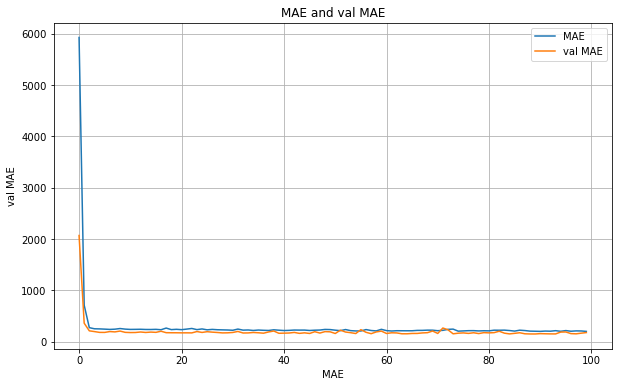

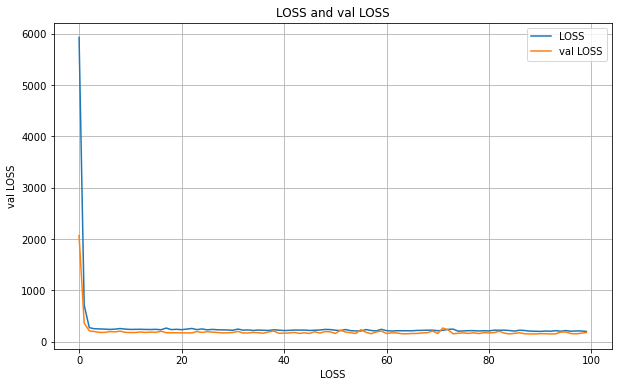

6/6 [==============================] - 0s 25ms/step


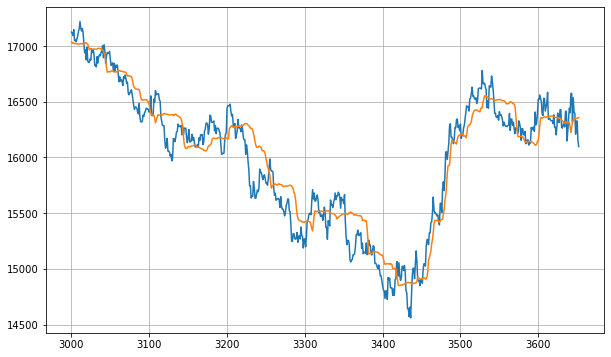

{'mae': 146.05115,
 'mse': 32521.854,
 'rmse': 180.33817,
 'mape': 0.9205384,
 'mase': 2.8221538}

In [17]:
# Load in best performing model
model_7 = tf.keras.models.load_model("model_experiments/modeld_7/")
model_7.evaluate(valid_set)

# Get mae and loss from history log
mae=history_7.history['mae']
val_mae=history_7.history['val_mae']
loss=history_7.history['loss']
val_loss=history_7.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_7 = model_forecast(model_7, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_7 = forecast_7.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_7))

eval_model_7 = evaluate_preds(y_true=x_valid,
                               y_pred=results_7)
eval_model_7

In [18]:
model_8 = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=[window_size, 1]),
  tf.keras.layers.Dense(1)
], name="model_8")

# Get initial weights
init_weights = model_8.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_8.set_weights(init_weights)

model_8.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_8.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_8 = model_8.fit(train_set,
                      epochs=20,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_8.name)])

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               8704      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
     24/Unknown - 6s 28ms/step - loss: 15704.5176 - mae: 15705.0166

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 20s 657ms/step - loss: 15704.5176 - mae: 15705.0166 - val_loss: 15955.4336 - val_mae: 15955.9326
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 15704.2305 - mae: 15704.7295

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 15s 648ms/step - loss: 15704.2305 - mae: 15704.7295 - val_loss: 15955.1465 - val_mae: 15955.6455
Epoch 3/20
24/24 [==============================] - ETA: 0s - loss: 15703.9463 - mae: 15704.4453

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 719ms/step - loss: 15703.9463 - mae: 15704.4453 - val_loss: 15954.8604 - val_mae: 15955.3613
Epoch 4/20
24/24 [==============================] - ETA: 0s - loss: 15703.6592 - mae: 15704.1592

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 14s 618ms/step - loss: 15703.6592 - mae: 15704.1592 - val_loss: 15954.5762 - val_mae: 15955.0752
Epoch 5/20
23/24 [===========================>..] - ETA: 0s - loss: 15702.6738 - mae: 15703.1738

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 15s 628ms/step - loss: 15703.3750 - mae: 15703.8750 - val_loss: 15954.2910 - val_mae: 15954.7900
Epoch 6/20
23/24 [===========================>..] - ETA: 0s - loss: 15699.2051 - mae: 15699.7051

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 14s 616ms/step - loss: 15703.0918 - mae: 15703.5918 - val_loss: 15954.0068 - val_mae: 15954.5068
Epoch 7/20
23/24 [===========================>..] - ETA: 0s - loss: 15696.2051 - mae: 15696.7051

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 15s 646ms/step - loss: 15702.8076 - mae: 15703.3076 - val_loss: 15953.7227 - val_mae: 15954.2227
Epoch 8/20
23/24 [===========================>..] - ETA: 0s - loss: 15697.0801 - mae: 15697.5801

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 14s 610ms/step - loss: 15702.5215 - mae: 15703.0205 - val_loss: 15953.4385 - val_mae: 15953.9395
Epoch 9/20
23/24 [===========================>..] - ETA: 0s - loss: 15697.8682 - mae: 15698.3682

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 16s 679ms/step - loss: 15702.2354 - mae: 15702.7354 - val_loss: 15953.1543 - val_mae: 15953.6553
Epoch 10/20
23/24 [===========================>..] - ETA: 0s - loss: 15695.2910 - mae: 15695.7910

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 730ms/step - loss: 15701.9551 - mae: 15702.4551 - val_loss: 15952.8701 - val_mae: 15953.3711
Epoch 11/20
23/24 [===========================>..] - ETA: 0s - loss: 15697.6777 - mae: 15698.1777

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 721ms/step - loss: 15701.6670 - mae: 15702.1680 - val_loss: 15952.5879 - val_mae: 15953.0869
Epoch 12/20
23/24 [===========================>..] - ETA: 0s - loss: 15695.9404 - mae: 15696.4404

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 723ms/step - loss: 15701.3867 - mae: 15701.8867 - val_loss: 15952.3037 - val_mae: 15952.8027
Epoch 13/20
22/24 [==========================>...] - ETA: 0s - loss: 15676.3604 - mae: 15676.8604

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 18s 762ms/step - loss: 15701.1016 - mae: 15701.6016 - val_loss: 15952.0195 - val_mae: 15952.5186
Epoch 14/20
24/24 [==============================] - ETA: 0s - loss: 15700.8193 - mae: 15701.3184

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 25s 1s/step - loss: 15700.8193 - mae: 15701.3184 - val_loss: 15951.7354 - val_mae: 15952.2344
Epoch 15/20
23/24 [===========================>..] - ETA: 0s - loss: 15696.7490 - mae: 15697.2490

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 15s 654ms/step - loss: 15700.5352 - mae: 15701.0361 - val_loss: 15951.4531 - val_mae: 15951.9531
Epoch 16/20
24/24 [==============================] - ETA: 0s - loss: 15700.2520 - mae: 15700.7529

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 15s 628ms/step - loss: 15700.2520 - mae: 15700.7529 - val_loss: 15951.1689 - val_mae: 15951.6689
Epoch 17/20
22/24 [==========================>...] - ETA: 0s - loss: 15666.6152 - mae: 15667.1152

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 15s 634ms/step - loss: 15699.9688 - mae: 15700.4688 - val_loss: 15950.8848 - val_mae: 15951.3838
Epoch 18/20
24/24 [==============================] - ETA: 0s - loss: 15699.6836 - mae: 15700.1836

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 15s 631ms/step - loss: 15699.6836 - mae: 15700.1836 - val_loss: 15950.6006 - val_mae: 15951.1016
Epoch 19/20
23/24 [===========================>..] - ETA: 0s - loss: 15692.4814 - mae: 15692.9814

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 15s 634ms/step - loss: 15699.4023 - mae: 15699.9014 - val_loss: 15950.3164 - val_mae: 15950.8174
Epoch 20/20
22/24 [==========================>...] - ETA: 0s - loss: 15674.7031 - mae: 15675.2031

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 14s 621ms/step - loss: 15699.1182 - mae: 15699.6172 - val_loss: 15950.0322 - val_mae: 15950.5332


5/5 [==============================] - 1s 19ms/step - loss: 15950.0322 - mae: 15950.5332


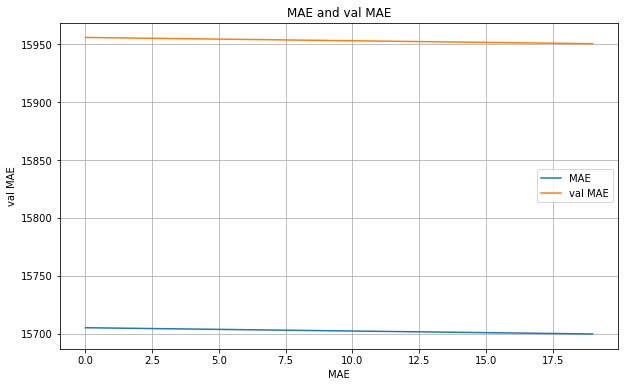

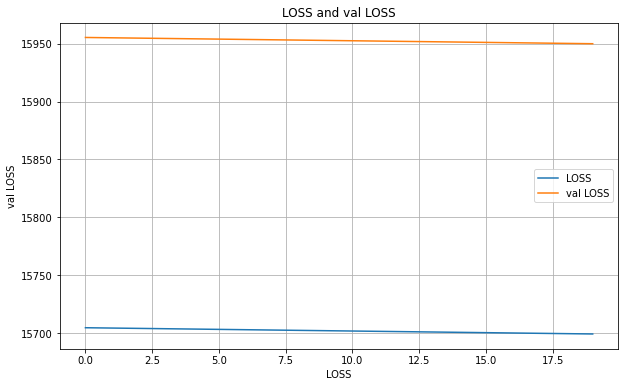

6/6 [==============================] - 1s 22ms/step


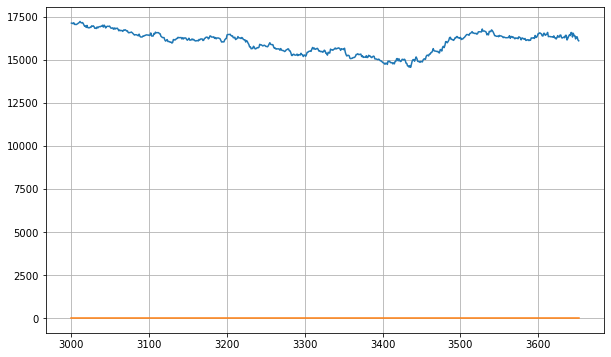

{'mae': 15999.692,
 'mse': 256362830.0,
 'rmse': 16011.335,
 'mape': 99.961784,
 'mase': 309.16287}

In [19]:
# Load in best performing model
model_8 = tf.keras.models.load_model("model_experiments/model_8/")
model_8.evaluate(valid_set)

# Get mae and loss from history log
mae=history_8.history['mae']
val_mae=history_8.history['val_mae']
loss=history_8.history['loss']
val_loss=history_8.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_8 = model_forecast(model_8, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_8 = forecast_8.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_8))

eval_model_8 = evaluate_predss(y_true=x_valid,
                               y_pred=results_8)
eval_model_8

In [20]:
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                            strides=1,
                            activation="relu",
                            padding='causal',
                            input_shape=[window_size, 1]),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_9")

# Get initial weights
init_weights = model_9.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_9.set_weights(init_weights)

model_9.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_9.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_9 = model_9.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_9.name)])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 128)           512       
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                           

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 3s 84ms/step - loss: 6837.3315 - mae: 6837.8311 - val_loss: 2345.7788 - val_mae: 2346.2788
Epoch 2/100
22/24 [==========================>...] - ETA: 0s - loss: 854.1524 - mae: 854.6521 

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 73ms/step - loss: 829.3150 - mae: 829.8146 - val_loss: 490.1443 - val_mae: 490.6443
Epoch 3/100
18/24 [=====================>........] - ETA: 0s - loss: 300.5884 - mae: 301.0875

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 77ms/step - loss: 290.3189 - mae: 290.8181 - val_loss: 178.3413 - val_mae: 178.8412
Epoch 4/100
22/24 [==========================>...] - ETA: 0s - loss: 235.3313 - mae: 235.8308

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 81ms/step - loss: 234.7835 - mae: 235.2830 - val_loss: 175.7220 - val_mae: 176.2219
Epoch 5/100
21/24 [=========================>....] - ETA: 0s - loss: 237.1470 - mae: 237.6467

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 77ms/step - loss: 237.6035 - mae: 238.1032 - val_loss: 174.9667 - val_mae: 175.4667
Epoch 6/100
24/24 [==============================] - 1s 23ms/step - loss: 238.3273 - mae: 238.8270 - val_loss: 190.5318 - val_mae: 191.0317
Epoch 7/100
24/24 [==============================] - 1s 23ms/step - loss: 236.7676 - mae: 237.2672 - val_loss: 187.0647 - val_mae: 187.5641
Epoch 8/100
24/24 [==============================] - 1s 23ms/step - loss: 234.5546 - mae: 235.0542 - val_loss: 181.5598 - val_mae: 182.0596
Epoch 9/100
22/24 [==========================>...] - ETA: 0s - loss: 239.1188 - mae: 239.6182

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 240.9166 - mae: 241.4160 - val_loss: 174.0792 - val_mae: 174.5791
Epoch 10/100
22/24 [==========================>...] - ETA: 0s - loss: 240.6673 - mae: 241.1671

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 75ms/step - loss: 240.0042 - mae: 240.5039 - val_loss: 173.1032 - val_mae: 173.6022
Epoch 11/100
24/24 [==============================] - 1s 23ms/step - loss: 239.6799 - mae: 240.1796 - val_loss: 173.5177 - val_mae: 174.0169
Epoch 12/100
24/24 [==============================] - 1s 23ms/step - loss: 238.0256 - mae: 238.5253 - val_loss: 176.9987 - val_mae: 177.4987
Epoch 13/100
24/24 [==============================] - 1s 23ms/step - loss: 230.2207 - mae: 230.7200 - val_loss: 180.4008 - val_mae: 180.9008
Epoch 14/100
24/24 [==============================] - 1s 23ms/step - loss: 231.7889 - mae: 232.2880 - val_loss: 210.6753 - val_mae: 211.1753
Epoch 15/100
24/24 [==============================] - 1s 23ms/step - loss: 240.0775 - mae: 240.5770 - val_loss: 174.5970 - val_mae: 175.0963
Epoch 16/100
24/24 [==============================] - 1s 23ms/step - loss: 232.9910 - mae: 233.4904 - val_loss: 173.2159 - val_mae: 173.7150
Epoch 17/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 90ms/step - loss: 240.3489 - mae: 240.8483 - val_loss: 170.4595 - val_mae: 170.9589
Epoch 20/100
22/24 [==========================>...] - ETA: 0s - loss: 228.2340 - mae: 228.7336

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 227.8923 - mae: 228.3919 - val_loss: 169.0689 - val_mae: 169.5670
Epoch 21/100
24/24 [==============================] - 1s 23ms/step - loss: 226.3357 - mae: 226.8347 - val_loss: 170.6333 - val_mae: 171.1329
Epoch 22/100
24/24 [==============================] - 1s 25ms/step - loss: 228.5568 - mae: 229.0562 - val_loss: 170.0909 - val_mae: 170.5896
Epoch 23/100
24/24 [==============================] - 1s 23ms/step - loss: 223.4741 - mae: 223.9733 - val_loss: 193.9028 - val_mae: 194.4027
Epoch 24/100
24/24 [==============================] - 1s 23ms/step - loss: 226.5060 - mae: 227.0052 - val_loss: 181.7642 - val_mae: 182.2641
Epoch 25/100
24/24 [==============================] - 1s 23ms/step - loss: 232.3604 - mae: 232.8601 - val_loss: 177.4937 - val_mae: 177.9937
Epoch 26/100
24/24 [==============================] - 1s 24ms/step - loss: 228.6357 - mae: 229.1354 - val_loss: 169.9414 - val_mae: 170.4410
Epoch 27/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 73ms/step - loss: 228.5801 - mae: 229.0798 - val_loss: 166.5294 - val_mae: 167.0294
Epoch 31/100
24/24 [==============================] - 1s 23ms/step - loss: 224.3175 - mae: 224.8170 - val_loss: 203.3022 - val_mae: 203.8015
Epoch 32/100
24/24 [==============================] - 1s 23ms/step - loss: 235.3233 - mae: 235.8231 - val_loss: 245.8108 - val_mae: 246.3108
Epoch 33/100
24/24 [==============================] - 1s 23ms/step - loss: 251.1137 - mae: 251.6134 - val_loss: 231.0743 - val_mae: 231.5737
Epoch 34/100
24/24 [==============================] - 1s 23ms/step - loss: 229.0186 - mae: 229.5178 - val_loss: 175.3744 - val_mae: 175.8737
Epoch 35/100
24/24 [==============================] - 1s 23ms/step - loss: 223.3807 - mae: 223.8805 - val_loss: 169.2781 - val_mae: 169.7781
Epoch 36/100
24/24 [==============================] - 1s 24ms/step - loss: 222.8053 - mae: 223.3048 - val_loss: 179.8472 - val_mae: 180.3468
Epoch 37/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 222.2276 - mae: 222.7273 - val_loss: 165.5898 - val_mae: 166.0898
Epoch 39/100
24/24 [==============================] - 1s 23ms/step - loss: 215.7458 - mae: 216.2455 - val_loss: 208.1759 - val_mae: 208.6749
Epoch 40/100
22/24 [==========================>...] - ETA: 0s - loss: 227.5371 - mae: 228.0367

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 226.9153 - mae: 227.4148 - val_loss: 162.5886 - val_mae: 163.0885
Epoch 41/100
22/24 [==========================>...] - ETA: 0s - loss: 217.8016 - mae: 218.3008

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 78ms/step - loss: 217.7292 - mae: 218.2283 - val_loss: 162.1285 - val_mae: 162.6280
Epoch 42/100
24/24 [==============================] - 1s 27ms/step - loss: 220.1690 - mae: 220.6684 - val_loss: 167.0357 - val_mae: 167.5348
Epoch 43/100
23/24 [===========================>..] - ETA: 0s - loss: 227.9254 - mae: 228.4250

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 83ms/step - loss: 227.2788 - mae: 227.7784 - val_loss: 162.0323 - val_mae: 162.5323
Epoch 44/100
24/24 [==============================] - 1s 24ms/step - loss: 221.4807 - mae: 221.9801 - val_loss: 162.0477 - val_mae: 162.5463
Epoch 45/100
22/24 [==========================>...] - ETA: 0s - loss: 218.7400 - mae: 219.2397

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 217.2774 - mae: 217.7772 - val_loss: 161.3913 - val_mae: 161.8913
Epoch 46/100
21/24 [=========================>....] - ETA: 0s - loss: 232.1185 - mae: 232.6180

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 232.4839 - mae: 232.9833 - val_loss: 160.4317 - val_mae: 160.9303
Epoch 47/100
24/24 [==============================] - 1s 23ms/step - loss: 225.7531 - mae: 226.2525 - val_loss: 179.3837 - val_mae: 179.8831
Epoch 48/100
24/24 [==============================] - 1s 23ms/step - loss: 220.9311 - mae: 221.4307 - val_loss: 177.8987 - val_mae: 178.3987
Epoch 49/100
24/24 [==============================] - 1s 23ms/step - loss: 222.5947 - mae: 223.0946 - val_loss: 215.8597 - val_mae: 216.3592
Epoch 50/100
24/24 [==============================] - 1s 27ms/step - loss: 225.9801 - mae: 226.4792 - val_loss: 210.2436 - val_mae: 210.7428
Epoch 51/100
22/24 [==========================>...] - ETA: 0s - loss: 221.5954 - mae: 222.0948

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 94ms/step - loss: 220.3772 - mae: 220.8766 - val_loss: 159.9603 - val_mae: 160.4599
Epoch 52/100
24/24 [==============================] - 1s 24ms/step - loss: 224.0420 - mae: 224.5416 - val_loss: 161.9659 - val_mae: 162.4657
Epoch 53/100
24/24 [==============================] - 1s 23ms/step - loss: 215.8170 - mae: 216.3165 - val_loss: 169.1600 - val_mae: 169.6592
Epoch 54/100
24/24 [==============================] - 1s 26ms/step - loss: 213.3206 - mae: 213.8203 - val_loss: 180.7507 - val_mae: 181.2506
Epoch 55/100
20/24 [========================>.....] - ETA: 0s - loss: 235.5423 - mae: 236.0414

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 77ms/step - loss: 233.0596 - mae: 233.5589 - val_loss: 157.3858 - val_mae: 157.8855
Epoch 56/100
22/24 [==========================>...] - ETA: 0s - loss: 215.2227 - mae: 215.7221

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 74ms/step - loss: 214.2337 - mae: 214.7330 - val_loss: 156.3324 - val_mae: 156.8322
Epoch 57/100
24/24 [==============================] - 1s 25ms/step - loss: 227.1379 - mae: 227.6372 - val_loss: 158.9716 - val_mae: 159.4714
Epoch 58/100
24/24 [==============================] - 1s 23ms/step - loss: 209.5950 - mae: 210.0945 - val_loss: 156.8421 - val_mae: 157.3418
Epoch 59/100
24/24 [==============================] - 1s 23ms/step - loss: 209.2460 - mae: 209.7454 - val_loss: 171.8267 - val_mae: 172.3258
Epoch 60/100
24/24 [==============================] - 1s 23ms/step - loss: 216.2624 - mae: 216.7623 - val_loss: 184.1912 - val_mae: 184.6886
Epoch 61/100
24/24 [==============================] - 1s 23ms/step - loss: 209.5644 - mae: 210.0639 - val_loss: 158.1419 - val_mae: 158.6414
Epoch 62/100
22/24 [==========================>...] - ETA: 0s - loss: 219.9388 - mae: 220.4383

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 74ms/step - loss: 219.2816 - mae: 219.7812 - val_loss: 154.4837 - val_mae: 154.9836
Epoch 63/100
24/24 [==============================] - 1s 23ms/step - loss: 214.5889 - mae: 215.0883 - val_loss: 165.2178 - val_mae: 165.7171
Epoch 64/100
24/24 [==============================] - 1s 23ms/step - loss: 213.2571 - mae: 213.7565 - val_loss: 154.6077 - val_mae: 155.1077
Epoch 65/100
24/24 [==============================] - 1s 23ms/step - loss: 204.1339 - mae: 204.6334 - val_loss: 168.8521 - val_mae: 169.3513
Epoch 66/100
24/24 [==============================] - 1s 23ms/step - loss: 211.5599 - mae: 212.0597 - val_loss: 316.6597 - val_mae: 317.1596
Epoch 67/100
24/24 [==============================] - 1s 23ms/step - loss: 249.8531 - mae: 250.3527 - val_loss: 169.3395 - val_mae: 169.8390
Epoch 68/100
24/24 [==============================] - 1s 23ms/step - loss: 208.8209 - mae: 209.3207 - val_loss: 155.2567 - val_mae: 155.7567
Epoch 69/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 204.8157 - mae: 205.3149 - val_loss: 152.4690 - val_mae: 152.9679
Epoch 73/100
24/24 [==============================] - 1s 23ms/step - loss: 203.2076 - mae: 203.7070 - val_loss: 156.1419 - val_mae: 156.6419
Epoch 74/100
24/24 [==============================] - 1s 23ms/step - loss: 209.2200 - mae: 209.7197 - val_loss: 158.3943 - val_mae: 158.8939
Epoch 75/100
24/24 [==============================] - 1s 23ms/step - loss: 202.9195 - mae: 203.4188 - val_loss: 158.1546 - val_mae: 158.6543
Epoch 76/100
22/24 [==========================>...] - ETA: 0s - loss: 213.4584 - mae: 213.9581

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 211.7667 - mae: 212.2664 - val_loss: 151.3142 - val_mae: 151.8131
Epoch 77/100
23/24 [===========================>..] - ETA: 0s - loss: 221.7549 - mae: 222.2541

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 74ms/step - loss: 221.4391 - mae: 221.9383 - val_loss: 150.8350 - val_mae: 151.3343
Epoch 78/100
24/24 [==============================] - 1s 23ms/step - loss: 201.3265 - mae: 201.8255 - val_loss: 176.0347 - val_mae: 176.5338
Epoch 79/100
24/24 [==============================] - 1s 23ms/step - loss: 204.8527 - mae: 205.3522 - val_loss: 226.4818 - val_mae: 226.9816
Epoch 80/100
24/24 [==============================] - 1s 23ms/step - loss: 211.2687 - mae: 211.7678 - val_loss: 171.3087 - val_mae: 171.8083
Epoch 81/100
24/24 [==============================] - 1s 23ms/step - loss: 218.7917 - mae: 219.2912 - val_loss: 155.3330 - val_mae: 155.8325
Epoch 82/100
23/24 [===========================>..] - ETA: 0s - loss: 214.5163 - mae: 215.0156

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 214.3078 - mae: 214.8071 - val_loss: 149.8656 - val_mae: 150.3652
Epoch 83/100
22/24 [==========================>...] - ETA: 0s - loss: 211.7902 - mae: 212.2899

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 212.3972 - mae: 212.8970 - val_loss: 149.8143 - val_mae: 150.3140
Epoch 84/100
24/24 [==============================] - 1s 23ms/step - loss: 200.0533 - mae: 200.5524 - val_loss: 168.5422 - val_mae: 169.0416
Epoch 85/100
24/24 [==============================] - 1s 23ms/step - loss: 213.7128 - mae: 214.2121 - val_loss: 160.4999 - val_mae: 160.9988
Epoch 86/100
24/24 [==============================] - 1s 24ms/step - loss: 211.1256 - mae: 211.6253 - val_loss: 219.3757 - val_mae: 219.8751
Epoch 87/100
21/24 [=========================>....] - ETA: 0s - loss: 215.0727 - mae: 215.5725

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 81ms/step - loss: 213.0251 - mae: 213.5248 - val_loss: 149.0314 - val_mae: 149.5303
Epoch 88/100
24/24 [==============================] - 1s 23ms/step - loss: 204.3898 - mae: 204.8895 - val_loss: 170.5159 - val_mae: 171.0150
Epoch 89/100
24/24 [==============================] - 1s 25ms/step - loss: 201.5786 - mae: 202.0775 - val_loss: 150.1123 - val_mae: 150.6111
Epoch 90/100
24/24 [==============================] - 1s 23ms/step - loss: 202.2487 - mae: 202.7484 - val_loss: 240.0986 - val_mae: 240.5979
Epoch 91/100
24/24 [==============================] - 1s 23ms/step - loss: 224.2268 - mae: 224.7265 - val_loss: 153.0389 - val_mae: 153.5387
Epoch 92/100
24/24 [==============================] - 1s 25ms/step - loss: 205.8422 - mae: 206.3419 - val_loss: 166.1100 - val_mae: 166.6093
Epoch 93/100
24/24 [==============================] - 1s 23ms/step - loss: 229.4803 - mae: 229.9796 - val_loss: 165.9837 - val_mae: 166.4830
Epoch 94/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 91ms/step - loss: 205.7116 - mae: 206.2112 - val_loss: 147.4837 - val_mae: 147.9834
Epoch 100/100
24/24 [==============================] - 1s 23ms/step - loss: 211.7480 - mae: 212.2474 - val_loss: 147.5547 - val_mae: 148.0533


5/5 [==============================] - 0s 12ms/step - loss: 147.4837 - mae: 147.9833


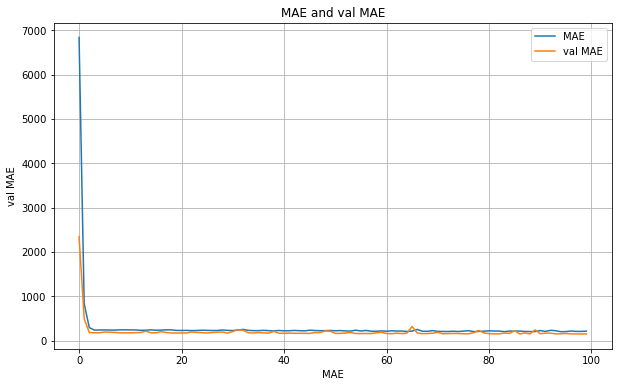

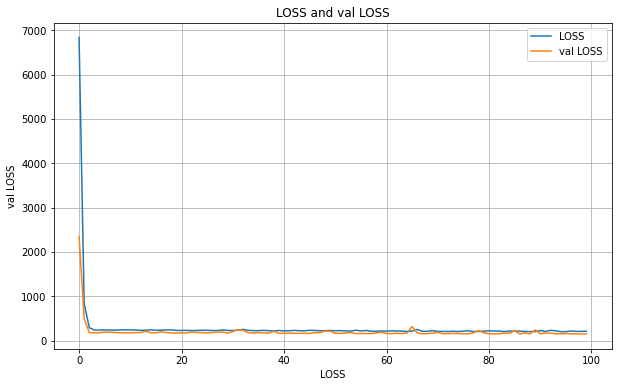

6/6 [==============================] - 0s 21ms/step


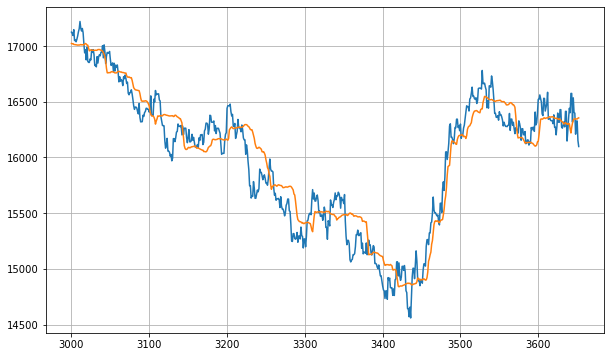

{'mae': 145.10257,
 'mse': 31859.654,
 'rmse': 178.49272,
 'mape': 0.9141184,
 'mase': 2.8038244}

In [21]:
# Load in best performing model
model_9 = tf.keras.models.load_model("model_experiments/model_9/")
model_9.evaluate(valid_set)

# Get mae and loss from history log
mae=history_9.history['mae']
val_mae=history_9.history['val_mae']
loss=history_9.history['loss']
val_loss=history_9.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_9 = model_forecast(model_9, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_9 = forecast_9.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_9))

eval_model_9 = evaluate_predss(y_true=x_valid,
                               y_pred=results_9)
eval_model_9

In [22]:
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[window_size]),
    tf.keras.layers.SimpleRNN(10),
    tf.keras.layers.Dense(1)
], name="model_10")

# Get initial weights
init_weights = model_10.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_10.set_weights(init_weights)

model_10.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_10.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_10 = model_10.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_10.name)])

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 30, 1)             0         
                                                                 
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     18/Unknown - 2s 19ms/step - loss: 15567.0332 - mae: 15567.5332

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 4s 115ms/step - loss: 15702.7627 - mae: 15703.2617 - val_loss: 15953.6904 - val_mae: 15954.1895
Epoch 2/100
16/24 [===================>..........] - ETA: 0s - loss: 15474.8652 - mae: 15475.3652

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 101ms/step - loss: 15702.4971 - mae: 15702.9971 - val_loss: 15953.4219 - val_mae: 15953.9229
Epoch 3/100
16/24 [===================>..........] - ETA: 0s - loss: 15499.0342 - mae: 15499.5342

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15702.2305 - mae: 15702.7314 - val_loss: 15953.1572 - val_mae: 15953.6562
Epoch 4/100
23/24 [===========================>..] - ETA: 0s - loss: 15697.4004 - mae: 15697.9004

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 104ms/step - loss: 15701.9668 - mae: 15702.4658 - val_loss: 15952.8906 - val_mae: 15953.3896
Epoch 5/100
16/24 [===================>..........] - ETA: 0s - loss: 15479.6152 - mae: 15480.1152

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 121ms/step - loss: 15701.6992 - mae: 15702.2002 - val_loss: 15952.6260 - val_mae: 15953.1270
Epoch 6/100
23/24 [===========================>..] - ETA: 0s - loss: 15699.8193 - mae: 15700.3193

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 103ms/step - loss: 15701.4355 - mae: 15701.9355 - val_loss: 15952.3623 - val_mae: 15952.8623
Epoch 7/100
16/24 [===================>..........] - ETA: 0s - loss: 15470.9512 - mae: 15471.4512

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 101ms/step - loss: 15701.1689 - mae: 15701.6699 - val_loss: 15952.0967 - val_mae: 15952.5967
Epoch 8/100
16/24 [===================>..........] - ETA: 0s - loss: 15466.7158 - mae: 15467.2158

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15700.9062 - mae: 15701.4062 - val_loss: 15951.8330 - val_mae: 15952.3320
Epoch 9/100
16/24 [===================>..........] - ETA: 0s - loss: 15484.0684 - mae: 15484.5684

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15700.6396 - mae: 15701.1406 - val_loss: 15951.5664 - val_mae: 15952.0674
Epoch 10/100
16/24 [===================>..........] - ETA: 0s - loss: 15496.2764 - mae: 15496.7764

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 103ms/step - loss: 15700.3760 - mae: 15700.8750 - val_loss: 15951.3037 - val_mae: 15951.8027
Epoch 11/100
16/24 [===================>..........] - ETA: 0s - loss: 15485.1523 - mae: 15485.6523

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 101ms/step - loss: 15700.1113 - mae: 15700.6113 - val_loss: 15951.0400 - val_mae: 15951.5391
Epoch 12/100
17/24 [====================>.........] - ETA: 0s - loss: 15521.6416 - mae: 15522.1416

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 125ms/step - loss: 15699.8447 - mae: 15700.3457 - val_loss: 15950.7754 - val_mae: 15951.2744
Epoch 13/100
17/24 [====================>.........] - ETA: 0s - loss: 15519.2705 - mae: 15519.7705

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15699.5820 - mae: 15700.0820 - val_loss: 15950.5107 - val_mae: 15951.0117
Epoch 14/100
16/24 [===================>..........] - ETA: 0s - loss: 15471.8291 - mae: 15472.3291

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 103ms/step - loss: 15699.3203 - mae: 15699.8193 - val_loss: 15950.2451 - val_mae: 15950.7451
Epoch 15/100
16/24 [===================>..........] - ETA: 0s - loss: 15466.2031 - mae: 15466.7031

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15699.0557 - mae: 15699.5557 - val_loss: 15949.9805 - val_mae: 15950.4814
Epoch 16/100
16/24 [===================>..........] - ETA: 0s - loss: 15484.7939 - mae: 15485.2939

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 103ms/step - loss: 15698.7920 - mae: 15699.2920 - val_loss: 15949.7178 - val_mae: 15950.2188
Epoch 17/100
16/24 [===================>..........] - ETA: 0s - loss: 15480.0176 - mae: 15480.5176

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15698.5264 - mae: 15699.0264 - val_loss: 15949.4531 - val_mae: 15949.9521
Epoch 18/100
16/24 [===================>..........] - ETA: 0s - loss: 15491.1426 - mae: 15491.6426

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15698.2627 - mae: 15698.7627 - val_loss: 15949.1875 - val_mae: 15949.6885
Epoch 19/100
16/24 [===================>..........] - ETA: 0s - loss: 15484.4141 - mae: 15484.9141

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 125ms/step - loss: 15697.9971 - mae: 15698.4971 - val_loss: 15948.9248 - val_mae: 15949.4238
Epoch 20/100
16/24 [===================>..........] - ETA: 0s - loss: 15458.0605 - mae: 15458.5605

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15697.7324 - mae: 15698.2334 - val_loss: 15948.6602 - val_mae: 15949.1602
Epoch 21/100
16/24 [===================>..........] - ETA: 0s - loss: 15479.6787 - mae: 15480.1787

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 101ms/step - loss: 15697.4697 - mae: 15697.9688 - val_loss: 15948.3945 - val_mae: 15948.8955
Epoch 22/100
16/24 [===================>..........] - ETA: 0s - loss: 15487.2871 - mae: 15487.7871

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15697.2051 - mae: 15697.7051 - val_loss: 15948.1318 - val_mae: 15948.6309
Epoch 23/100
16/24 [===================>..........] - ETA: 0s - loss: 15468.1699 - mae: 15468.6699

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15696.9385 - mae: 15697.4395 - val_loss: 15947.8672 - val_mae: 15948.3662
Epoch 24/100
24/24 [==============================] - ETA: 0s - loss: 15696.6748 - mae: 15697.1758

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15696.6748 - mae: 15697.1758 - val_loss: 15947.6016 - val_mae: 15948.1025
Epoch 25/100
16/24 [===================>..........] - ETA: 0s - loss: 15457.8994 - mae: 15458.3994

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 103ms/step - loss: 15696.4131 - mae: 15696.9131 - val_loss: 15947.3389 - val_mae: 15947.8398
Epoch 26/100
16/24 [===================>..........] - ETA: 0s - loss: 15470.4004 - mae: 15470.9004

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 133ms/step - loss: 15696.1494 - mae: 15696.6494 - val_loss: 15947.0742 - val_mae: 15947.5742
Epoch 27/100
16/24 [===================>..........] - ETA: 0s - loss: 15481.9199 - mae: 15482.4199

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15695.8828 - mae: 15696.3838 - val_loss: 15946.8105 - val_mae: 15947.3096
Epoch 28/100
17/24 [====================>.........] - ETA: 0s - loss: 15511.3164 - mae: 15511.8164

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15695.6201 - mae: 15696.1201 - val_loss: 15946.5459 - val_mae: 15947.0469
Epoch 29/100
17/24 [====================>.........] - ETA: 0s - loss: 15518.4688 - mae: 15518.9688

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 99ms/step - loss: 15695.3574 - mae: 15695.8574 - val_loss: 15946.2822 - val_mae: 15946.7812
Epoch 30/100
16/24 [===================>..........] - ETA: 0s - loss: 15457.7617 - mae: 15458.2617

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15695.0908 - mae: 15695.5918 - val_loss: 15946.0195 - val_mae: 15946.5205
Epoch 31/100
16/24 [===================>..........] - ETA: 0s - loss: 15475.9082 - mae: 15476.4082

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15694.8252 - mae: 15695.3252 - val_loss: 15945.7549 - val_mae: 15946.2539
Epoch 32/100
16/24 [===================>..........] - ETA: 0s - loss: 15473.2236 - mae: 15473.7236

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15694.5654 - mae: 15695.0654 - val_loss: 15945.4893 - val_mae: 15945.9902
Epoch 33/100
17/24 [====================>.........] - ETA: 0s - loss: 15497.0146 - mae: 15497.5146

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 125ms/step - loss: 15694.2988 - mae: 15694.7988 - val_loss: 15945.2246 - val_mae: 15945.7256
Epoch 34/100
16/24 [===================>..........] - ETA: 0s - loss: 15457.6602 - mae: 15458.1602

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 101ms/step - loss: 15694.0361 - mae: 15694.5371 - val_loss: 15944.9619 - val_mae: 15945.4609
Epoch 35/100
16/24 [===================>..........] - ETA: 0s - loss: 15468.3848 - mae: 15468.8848

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15693.7695 - mae: 15694.2695 - val_loss: 15944.6963 - val_mae: 15945.1973
Epoch 36/100
16/24 [===================>..........] - ETA: 0s - loss: 15470.8145 - mae: 15471.3145

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15693.5039 - mae: 15694.0059 - val_loss: 15944.4336 - val_mae: 15944.9346
Epoch 37/100
16/24 [===================>..........] - ETA: 0s - loss: 15474.2754 - mae: 15474.7754

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15693.2432 - mae: 15693.7432 - val_loss: 15944.1689 - val_mae: 15944.6689
Epoch 38/100
16/24 [===================>..........] - ETA: 0s - loss: 15440.2148 - mae: 15440.7148

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 100ms/step - loss: 15692.9795 - mae: 15693.4785 - val_loss: 15943.9053 - val_mae: 15944.4043
Epoch 39/100
16/24 [===================>..........] - ETA: 0s - loss: 15471.1719 - mae: 15471.6719

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 101ms/step - loss: 15692.7148 - mae: 15693.2148 - val_loss: 15943.6416 - val_mae: 15944.1416
Epoch 40/100
16/24 [===================>..........] - ETA: 0s - loss: 15470.0195 - mae: 15470.5195

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 124ms/step - loss: 15692.4502 - mae: 15692.9492 - val_loss: 15943.3770 - val_mae: 15943.8760
Epoch 41/100
24/24 [==============================] - ETA: 0s - loss: 15692.1875 - mae: 15692.6885

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 104ms/step - loss: 15692.1875 - mae: 15692.6885 - val_loss: 15943.1123 - val_mae: 15943.6133
Epoch 42/100
16/24 [===================>..........] - ETA: 0s - loss: 15464.0957 - mae: 15464.5957

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 101ms/step - loss: 15691.9219 - mae: 15692.4219 - val_loss: 15942.8486 - val_mae: 15943.3486
Epoch 43/100
16/24 [===================>..........] - ETA: 0s - loss: 15467.9209 - mae: 15468.4209

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 105ms/step - loss: 15691.6592 - mae: 15692.1592 - val_loss: 15942.5840 - val_mae: 15943.0850
Epoch 44/100
24/24 [==============================] - ETA: 0s - loss: 15691.3955 - mae: 15691.8945

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 105ms/step - loss: 15691.3955 - mae: 15691.8945 - val_loss: 15942.3213 - val_mae: 15942.8223
Epoch 45/100
17/24 [====================>.........] - ETA: 0s - loss: 15520.7314 - mae: 15521.2314

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 101ms/step - loss: 15691.1299 - mae: 15691.6299 - val_loss: 15942.0566 - val_mae: 15942.5566
Epoch 46/100
16/24 [===================>..........] - ETA: 0s - loss: 15480.9834 - mae: 15481.4834

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 101ms/step - loss: 15690.8643 - mae: 15691.3652 - val_loss: 15941.7930 - val_mae: 15942.2920
Epoch 47/100
16/24 [===================>..........] - ETA: 0s - loss: 15456.8105 - mae: 15457.3105

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 125ms/step - loss: 15690.6006 - mae: 15691.1006 - val_loss: 15941.5283 - val_mae: 15942.0293
Epoch 48/100
16/24 [===================>..........] - ETA: 0s - loss: 15461.6885 - mae: 15462.1885

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15690.3379 - mae: 15690.8379 - val_loss: 15941.2646 - val_mae: 15941.7637
Epoch 49/100
16/24 [===================>..........] - ETA: 0s - loss: 15464.5625 - mae: 15465.0625

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 98ms/step - loss: 15690.0742 - mae: 15690.5742 - val_loss: 15941.0020 - val_mae: 15941.5010
Epoch 50/100
16/24 [===================>..........] - ETA: 0s - loss: 15441.9619 - mae: 15442.4619

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15689.8105 - mae: 15690.3096 - val_loss: 15940.7354 - val_mae: 15941.2363
Epoch 51/100
17/24 [====================>.........] - ETA: 0s - loss: 15516.3037 - mae: 15516.8037

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 2s 101ms/step - loss: 15689.5459 - mae: 15690.0469 - val_loss: 15940.4736 - val_mae: 15940.9727
Epoch 52/100
16/24 [===================>..........] - ETA: 0s - loss: 15465.5381 - mae: 15466.0381

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 101ms/step - loss: 15689.2832 - mae: 15689.7832 - val_loss: 15940.2090 - val_mae: 15940.7080
Epoch 53/100
16/24 [===================>..........] - ETA: 0s - loss: 15464.0879 - mae: 15464.5879

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 123ms/step - loss: 15689.0186 - mae: 15689.5176 - val_loss: 15939.9453 - val_mae: 15940.4443
Epoch 54/100
16/24 [===================>..........] - ETA: 0s - loss: 15462.5400 - mae: 15463.0400

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 101ms/step - loss: 15688.7539 - mae: 15689.2539 - val_loss: 15939.6807 - val_mae: 15940.1797
Epoch 55/100
16/24 [===================>..........] - ETA: 0s - loss: 15468.0693 - mae: 15468.5693

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 103ms/step - loss: 15688.4893 - mae: 15688.9883 - val_loss: 15939.4160 - val_mae: 15939.9170
Epoch 56/100
18/24 [=====================>........] - ETA: 0s - loss: 15541.4062 - mae: 15541.9062

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15688.2275 - mae: 15688.7285 - val_loss: 15939.1523 - val_mae: 15939.6533
Epoch 57/100
23/24 [===========================>..] - ETA: 0s - loss: 15683.3232 - mae: 15683.8232

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 102ms/step - loss: 15687.9639 - mae: 15688.4629 - val_loss: 15938.8896 - val_mae: 15939.3887
Epoch 58/100
16/24 [===================>..........] - ETA: 0s - loss: 15464.9346 - mae: 15465.4346

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 135ms/step - loss: 15687.6973 - mae: 15688.1963 - val_loss: 15938.6230 - val_mae: 15939.1240
Epoch 59/100
16/24 [===================>..........] - ETA: 0s - loss: 15457.7451 - mae: 15458.2451

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 4s 153ms/step - loss: 15687.4326 - mae: 15687.9336 - val_loss: 15938.3594 - val_mae: 15938.8604
Epoch 60/100
18/24 [=====================>........] - ETA: 0s - loss: 15547.2607 - mae: 15547.7607

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 4s 157ms/step - loss: 15687.1699 - mae: 15687.6699 - val_loss: 15938.0967 - val_mae: 15938.5967
Epoch 61/100
22/24 [==========================>...] - ETA: 0s - loss: 15650.2754 - mae: 15650.7754

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15686.9062 - mae: 15687.4062 - val_loss: 15937.8311 - val_mae: 15938.3320
Epoch 62/100
23/24 [===========================>..] - ETA: 0s - loss: 15678.6104 - mae: 15679.1104

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 112ms/step - loss: 15686.6406 - mae: 15687.1406 - val_loss: 15937.5684 - val_mae: 15938.0674
Epoch 63/100
23/24 [===========================>..] - ETA: 0s - loss: 15683.7949 - mae: 15684.2949

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 114ms/step - loss: 15686.3760 - mae: 15686.8750 - val_loss: 15937.3037 - val_mae: 15937.8027
Epoch 64/100
24/24 [==============================] - ETA: 0s - loss: 15686.1113 - mae: 15686.6113

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15686.1113 - mae: 15686.6113 - val_loss: 15937.0400 - val_mae: 15937.5391
Epoch 65/100
22/24 [==========================>...] - ETA: 0s - loss: 15658.5977 - mae: 15659.0977

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15685.8506 - mae: 15686.3506 - val_loss: 15936.7773 - val_mae: 15937.2764
Epoch 66/100
24/24 [==============================] - ETA: 0s - loss: 15685.5850 - mae: 15686.0850

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 110ms/step - loss: 15685.5850 - mae: 15686.0850 - val_loss: 15936.5117 - val_mae: 15937.0117
Epoch 67/100
24/24 [==============================] - ETA: 0s - loss: 15685.3223 - mae: 15685.8223

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 4s 148ms/step - loss: 15685.3223 - mae: 15685.8223 - val_loss: 15936.2471 - val_mae: 15936.7480
Epoch 68/100
22/24 [==========================>...] - ETA: 0s - loss: 15664.7617 - mae: 15665.2617

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 110ms/step - loss: 15685.0557 - mae: 15685.5557 - val_loss: 15935.9844 - val_mae: 15936.4834
Epoch 69/100
19/24 [======================>.......] - ETA: 0s - loss: 15576.4785 - mae: 15576.9785

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 110ms/step - loss: 15684.7920 - mae: 15685.2930 - val_loss: 15935.7207 - val_mae: 15936.2197
Epoch 70/100
19/24 [======================>.......] - ETA: 0s - loss: 15571.5771 - mae: 15572.0771

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 110ms/step - loss: 15684.5293 - mae: 15685.0293 - val_loss: 15935.4541 - val_mae: 15935.9551
Epoch 71/100
24/24 [==============================] - ETA: 0s - loss: 15684.2637 - mae: 15684.7637

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 110ms/step - loss: 15684.2637 - mae: 15684.7637 - val_loss: 15935.1914 - val_mae: 15935.6914
Epoch 72/100
19/24 [======================>.......] - ETA: 0s - loss: 15557.8057 - mae: 15558.3057

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 107ms/step - loss: 15684.0029 - mae: 15684.5020 - val_loss: 15934.9277 - val_mae: 15935.4287
Epoch 73/100
22/24 [==========================>...] - ETA: 0s - loss: 15659.0938 - mae: 15659.5938

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15683.7363 - mae: 15684.2354 - val_loss: 15934.6641 - val_mae: 15935.1641
Epoch 74/100
22/24 [==========================>...] - ETA: 0s - loss: 15660.1104 - mae: 15660.6104

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 107ms/step - loss: 15683.4717 - mae: 15683.9727 - val_loss: 15934.3994 - val_mae: 15934.8984
Epoch 75/100
24/24 [==============================] - ETA: 0s - loss: 15683.2090 - mae: 15683.7090

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 136ms/step - loss: 15683.2090 - mae: 15683.7090 - val_loss: 15934.1348 - val_mae: 15934.6357
Epoch 76/100
22/24 [==========================>...] - ETA: 0s - loss: 15663.3125 - mae: 15663.8125

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 107ms/step - loss: 15682.9453 - mae: 15683.4453 - val_loss: 15933.8721 - val_mae: 15934.3721
Epoch 77/100
22/24 [==========================>...] - ETA: 0s - loss: 15657.9561 - mae: 15658.4561

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 110ms/step - loss: 15682.6816 - mae: 15683.1826 - val_loss: 15933.6084 - val_mae: 15934.1074
Epoch 78/100
23/24 [===========================>..] - ETA: 0s - loss: 15679.6904 - mae: 15680.1904

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15682.4180 - mae: 15682.9170 - val_loss: 15933.3438 - val_mae: 15933.8447
Epoch 79/100
24/24 [==============================] - ETA: 0s - loss: 15682.1533 - mae: 15682.6543

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15682.1533 - mae: 15682.6543 - val_loss: 15933.0791 - val_mae: 15933.5791
Epoch 80/100
20/24 [========================>.....] - ETA: 0s - loss: 15584.6221 - mae: 15585.1221

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 110ms/step - loss: 15681.8887 - mae: 15682.3896 - val_loss: 15932.8154 - val_mae: 15933.3145
Epoch 81/100
19/24 [======================>.......] - ETA: 0s - loss: 15591.2617 - mae: 15591.7617

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 132ms/step - loss: 15681.6240 - mae: 15682.1240 - val_loss: 15932.5508 - val_mae: 15933.0498
Epoch 82/100
22/24 [==========================>...] - ETA: 0s - loss: 15651.9814 - mae: 15652.4814

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15681.3613 - mae: 15681.8623 - val_loss: 15932.2871 - val_mae: 15932.7881
Epoch 83/100
24/24 [==============================] - ETA: 0s - loss: 15681.0947 - mae: 15681.5957

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 110ms/step - loss: 15681.0947 - mae: 15681.5957 - val_loss: 15932.0225 - val_mae: 15932.5234
Epoch 84/100
22/24 [==========================>...] - ETA: 0s - loss: 15646.0615 - mae: 15646.5615

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 117ms/step - loss: 15680.8340 - mae: 15681.3330 - val_loss: 15931.7588 - val_mae: 15932.2598
Epoch 85/100
18/24 [=====================>........] - ETA: 0s - loss: 15525.9102 - mae: 15526.4102

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 116ms/step - loss: 15680.5684 - mae: 15681.0684 - val_loss: 15931.4941 - val_mae: 15931.9951
Epoch 86/100
18/24 [=====================>........] - ETA: 0s - loss: 15543.5000 - mae: 15544.0000

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15680.3047 - mae: 15680.8037 - val_loss: 15931.2314 - val_mae: 15931.7305
Epoch 87/100
18/24 [=====================>........] - ETA: 0s - loss: 15555.7119 - mae: 15556.2119

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 109ms/step - loss: 15680.0391 - mae: 15680.5391 - val_loss: 15930.9658 - val_mae: 15931.4658
Epoch 88/100
22/24 [==========================>...] - ETA: 0s - loss: 15650.3809 - mae: 15650.8809

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 132ms/step - loss: 15679.7773 - mae: 15680.2783 - val_loss: 15930.7031 - val_mae: 15931.2021
Epoch 89/100
24/24 [==============================] - ETA: 0s - loss: 15679.5098 - mae: 15680.0107

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 134ms/step - loss: 15679.5098 - mae: 15680.0107 - val_loss: 15930.4385 - val_mae: 15930.9395
Epoch 90/100
24/24 [==============================] - ETA: 0s - loss: 15679.2471 - mae: 15679.7480

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 142ms/step - loss: 15679.2471 - mae: 15679.7480 - val_loss: 15930.1748 - val_mae: 15930.6738
Epoch 91/100
18/24 [=====================>........] - ETA: 0s - loss: 15529.2705 - mae: 15529.7705

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 4s 143ms/step - loss: 15678.9844 - mae: 15679.4844 - val_loss: 15929.9102 - val_mae: 15930.4111
Epoch 92/100
23/24 [===========================>..] - ETA: 0s - loss: 15675.5273 - mae: 15676.0273

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 4s 152ms/step - loss: 15678.7188 - mae: 15679.2188 - val_loss: 15929.6465 - val_mae: 15930.1465
Epoch 93/100
22/24 [==========================>...] - ETA: 0s - loss: 15652.8975 - mae: 15653.3975

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 115ms/step - loss: 15678.4570 - mae: 15678.9561 - val_loss: 15929.3838 - val_mae: 15929.8828
Epoch 94/100
19/24 [======================>.......] - ETA: 0s - loss: 15559.2959 - mae: 15559.7959

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 121ms/step - loss: 15678.1914 - mae: 15678.6924 - val_loss: 15929.1172 - val_mae: 15929.6182
Epoch 95/100
23/24 [===========================>..] - ETA: 0s - loss: 15673.7119 - mae: 15674.2119

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 131ms/step - loss: 15677.9297 - mae: 15678.4297 - val_loss: 15928.8535 - val_mae: 15929.3545
Epoch 96/100
24/24 [==============================] - ETA: 0s - loss: 15677.6650 - mae: 15678.1641

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 107ms/step - loss: 15677.6650 - mae: 15678.1641 - val_loss: 15928.5908 - val_mae: 15929.0898
Epoch 97/100
18/24 [=====================>........] - ETA: 0s - loss: 15518.7363 - mae: 15519.2363

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 115ms/step - loss: 15677.4004 - mae: 15677.9004 - val_loss: 15928.3271 - val_mae: 15928.8262
Epoch 98/100
22/24 [==========================>...] - ETA: 0s - loss: 15654.1729 - mae: 15654.6729

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 108ms/step - loss: 15677.1367 - mae: 15677.6367 - val_loss: 15928.0625 - val_mae: 15928.5615
Epoch 99/100
23/24 [===========================>..] - ETA: 0s - loss: 15670.2871 - mae: 15670.7871

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 123ms/step - loss: 15676.8711 - mae: 15677.3711 - val_loss: 15927.7998 - val_mae: 15928.2988
Epoch 100/100
24/24 [==============================] - ETA: 0s - loss: 15676.6074 - mae: 15677.1074

INFO:tensorflow:Assets written to: model_experiments\model_10\assets


INFO:tensorflow:Assets written to: model_experiments\model_10\assets


24/24 [==============================] - 3s 115ms/step - loss: 15676.6074 - mae: 15677.1074 - val_loss: 15927.5342 - val_mae: 15928.0342


6/6 [==============================] - 0s 28ms/step


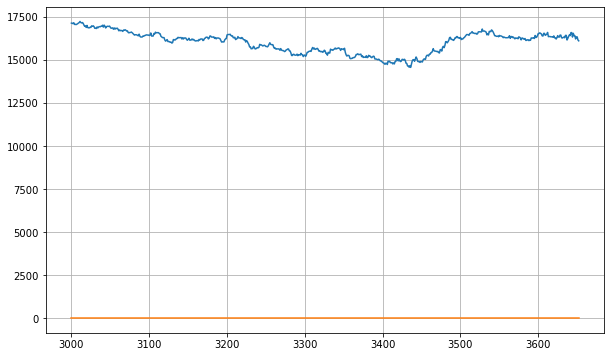

{'mae': 15977.193,
 'mse': 255643410.0,
 'rmse': 15988.853,
 'mape': 99.82102,
 'mase': 308.72815}

In [70]:
# Load in best performing model
model_10 = tf.keras.models.load_model("model_experiments/model_10/")
model_10.evaluate(valid_set)

# Get mae and loss from history log
mae=history_10.history['mae']
val_mae=history_10.history['val_mae']
loss=history_10.history['loss']
val_loss=history_10.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_10 = model_forecast(model_10, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_10 = forecast_10.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_10))

eval_model_10 = evaluate_predss(y_true=x_valid,
                               y_pred=results_10)
eval_model_10

In [24]:
import pandas as pd
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"model_1_dense30,10,1": eval_model_1,
                              "model_2_dense128,32,1": eval_model_2,
                              "model_3_dense10,1": eval_model_3,
                              "model_4_dense32,32,10,1": eval_model_4,
                              "model_5_dense32,32,10,7": eval_model_5,
                              "model_6_conv1D64_globalmaxpooling1D_dense1": eval_model_6,
                              "model_7_conv1D512_globalmaxpooling1D_dense1":eval_model_7,
                              "model_8_bidirectionalLSTM32_dense1": eval_model_8,
                              "model_9_conv1D128_globalmaxpooling1D_dense32,32,10,1": eval_model_9,
                              "model_10_RNN10_dense1": eval_model_10}).T
model_results

,mae,mse,rmse,mape,mase
"model_1_dense30,10,1",125.148796,2.613381e+04,161.659546,0.787175,2.418257
"model_2_dense128,32,1",83.131042,1.134078e+04,106.493095,0.523332,1.606345
"model_3_dense10,1",163.873062,4.411421e+04,210.033844,1.030318,3.166528
"model_4_dense32,32,10,1",95.121864,1.478206e+04,121.581505,0.598194,1.838045
"model_5_dense32,32,10,7",107.080353,1.903074e+04,107.583054,0.673432,2.069119
model_6_conv1D64_globalmaxpooling1D_dense1,147.614563,3.271325e+04,180.868042,0.929302,2.852364
model_7_conv1D512_globalmaxpooling1D_dense1,146.051147,3.252185e+04,180.338165,0.920538,2.822154
model_8_bidirectionalLSTM32_dense1,15999.692383,2.563628e+08,16011.334961,99.961784,309.162872
"model_9_conv1D128_globalmaxpooling1D_dense32,32,10,1",145.102570,3.185965e+04,178.492722,0.914118,2.803824
model_10_RNN10_dense1,15977.193359,2.556434e+08,15988.852539,99.821022,308.728149


In [4]:
model_11 = tf.keras.models.Sequential([
    tf.keras.layers.GRU(30, input_shape=(window_size,1), activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_11")

# Get initial weights
init_weights = model_11.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_11.set_weights(init_weights)

model_11.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_11.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_11 = model_11.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_11.name)])

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30)                2970      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     24/Unknown - 3s 27ms/step - loss: 15606.5762 - mae: 15607.0762

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 9s 273ms/step - loss: 15606.5762 - mae: 15607.0762 - val_loss: 15348.8428 - val_mae: 15349.3438
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 14664.5869 - mae: 14665.0869

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 145ms/step - loss: 14664.5869 - mae: 14665.0869 - val_loss: 14339.0273 - val_mae: 14339.5264
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 13447.8037 - mae: 13448.3047

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 159ms/step - loss: 13447.8037 - mae: 13448.3047 - val_loss: 12821.8613 - val_mae: 12822.3613
Epoch 4/100
21/24 [=========================>....] - ETA: 0s - loss: 11604.4707 - mae: 11604.9707

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 156ms/step - loss: 11476.8750 - mae: 11477.3760 - val_loss: 10074.5352 - val_mae: 10075.0352
Epoch 5/100
24/24 [==============================] - ETA: 0s - loss: 8443.8408 - mae: 8444.3408

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 174ms/step - loss: 8443.8408 - mae: 8444.3408 - val_loss: 6526.3467 - val_mae: 6526.8467
Epoch 6/100
24/24 [==============================] - ETA: 0s - loss: 3554.5232 - mae: 3555.0232

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 144ms/step - loss: 3554.5232 - mae: 3555.0232 - val_loss: 233.0612 - val_mae: 233.5606
Epoch 7/100
24/24 [==============================] - 1s 42ms/step - loss: 350.4221 - mae: 350.9220 - val_loss: 251.5803 - val_mae: 252.0799
Epoch 8/100
24/24 [==============================] - ETA: 0s - loss: 228.5372 - mae: 229.0366

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 160ms/step - loss: 228.5372 - mae: 229.0366 - val_loss: 149.5856 - val_mae: 150.0852
Epoch 9/100
24/24 [==============================] - ETA: 0s - loss: 193.5909 - mae: 194.0900

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 158ms/step - loss: 193.5909 - mae: 194.0900 - val_loss: 141.5860 - val_mae: 142.0860
Epoch 10/100
21/24 [=========================>....] - ETA: 0s - loss: 184.6050 - mae: 185.1036

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 154ms/step - loss: 184.5330 - mae: 185.0315 - val_loss: 129.7987 - val_mae: 130.2975
Epoch 11/100
24/24 [==============================] - 1s 35ms/step - loss: 178.7453 - mae: 179.2446 - val_loss: 139.4094 - val_mae: 139.9078
Epoch 12/100
24/24 [==============================] - 1s 36ms/step - loss: 191.2332 - mae: 191.7323 - val_loss: 155.2856 - val_mae: 155.7855
Epoch 13/100
24/24 [==============================] - 1s 34ms/step - loss: 209.2590 - mae: 209.7583 - val_loss: 155.9965 - val_mae: 156.4965
Epoch 14/100
24/24 [==============================] - 1s 33ms/step - loss: 212.8517 - mae: 213.3512 - val_loss: 153.4173 - val_mae: 153.9166
Epoch 15/100
24/24 [==============================] - 1s 37ms/step - loss: 211.4284 - mae: 211.9275 - val_loss: 153.0211 - val_mae: 153.5208
Epoch 16/100
24/24 [==============================] - 1s 39ms/step - loss: 214.0041 - mae: 214.5036 - val_loss: 156.5713 - val_mae: 157.0708
Epoch 17/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 172ms/step - loss: 168.2137 - mae: 168.7127 - val_loss: 122.4829 - val_mae: 122.9822
Epoch 42/100
23/24 [===========================>..] - ETA: 0s - loss: 157.9723 - mae: 158.4715

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 153ms/step - loss: 158.7361 - mae: 159.2353 - val_loss: 120.6595 - val_mae: 121.1586
Epoch 43/100
24/24 [==============================] - 1s 41ms/step - loss: 157.8405 - mae: 158.3401 - val_loss: 138.1630 - val_mae: 138.6628
Epoch 44/100
24/24 [==============================] - 1s 41ms/step - loss: 176.8845 - mae: 177.3837 - val_loss: 132.2202 - val_mae: 132.7194
Epoch 45/100
24/24 [==============================] - 1s 38ms/step - loss: 176.1058 - mae: 176.6042 - val_loss: 130.5624 - val_mae: 131.0623
Epoch 46/100
24/24 [==============================] - 1s 35ms/step - loss: 175.7630 - mae: 176.2619 - val_loss: 133.3072 - val_mae: 133.8070
Epoch 47/100
24/24 [==============================] - 1s 36ms/step - loss: 175.9872 - mae: 176.4867 - val_loss: 130.2277 - val_mae: 130.7253
Epoch 48/100
24/24 [==============================] - 1s 36ms/step - loss: 171.5204 - mae: 172.0193 - val_loss: 138.2427 - val_mae: 138.7427
Epoch 49/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 165ms/step - loss: 158.8186 - mae: 159.3178 - val_loss: 117.8061 - val_mae: 118.3049
Epoch 59/100
24/24 [==============================] - ETA: 0s - loss: 156.5552 - mae: 157.0548

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 3s 142ms/step - loss: 156.5552 - mae: 157.0548 - val_loss: 116.5743 - val_mae: 117.0720
Epoch 60/100
24/24 [==============================] - 1s 33ms/step - loss: 156.8830 - mae: 157.3823 - val_loss: 124.0347 - val_mae: 124.5338
Epoch 61/100
24/24 [==============================] - 1s 33ms/step - loss: 155.7554 - mae: 156.2544 - val_loss: 128.8173 - val_mae: 129.3168
Epoch 62/100
24/24 [==============================] - 1s 34ms/step - loss: 154.6779 - mae: 155.1772 - val_loss: 133.3840 - val_mae: 133.8832
Epoch 63/100
24/24 [==============================] - 1s 33ms/step - loss: 159.8375 - mae: 160.3367 - val_loss: 132.8806 - val_mae: 133.3805
Epoch 64/100
24/24 [==============================] - 1s 34ms/step - loss: 154.8439 - mae: 155.3431 - val_loss: 139.9642 - val_mae: 140.4638
Epoch 65/100
24/24 [==============================] - 1s 33ms/step - loss: 154.5239 - mae: 155.0234 - val_loss: 121.3165 - val_mae: 121.8154
Epoch 66/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 3s 139ms/step - loss: 147.0034 - mae: 147.5029 - val_loss: 110.5468 - val_mae: 111.0446
Epoch 67/100
21/24 [=========================>....] - ETA: 0s - loss: 144.5100 - mae: 145.0091

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 166ms/step - loss: 145.2337 - mae: 145.7328 - val_loss: 107.8065 - val_mae: 108.3054
Epoch 68/100
24/24 [==============================] - 1s 36ms/step - loss: 141.8487 - mae: 142.3477 - val_loss: 116.0051 - val_mae: 116.5034
Epoch 69/100
24/24 [==============================] - 1s 35ms/step - loss: 142.4666 - mae: 142.9664 - val_loss: 108.2102 - val_mae: 108.7095
Epoch 70/100
24/24 [==============================] - 1s 38ms/step - loss: 140.2296 - mae: 140.7290 - val_loss: 113.6186 - val_mae: 114.1180
Epoch 71/100
24/24 [==============================] - ETA: 0s - loss: 139.5394 - mae: 140.0383

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 144ms/step - loss: 139.5394 - mae: 140.0383 - val_loss: 101.7739 - val_mae: 102.2722
Epoch 72/100
24/24 [==============================] - ETA: 0s - loss: 133.6292 - mae: 134.1279

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 3s 133ms/step - loss: 133.6292 - mae: 134.1279 - val_loss: 100.8527 - val_mae: 101.3508
Epoch 73/100
24/24 [==============================] - 1s 36ms/step - loss: 131.4005 - mae: 131.9000 - val_loss: 109.8963 - val_mae: 110.3952
Epoch 74/100
24/24 [==============================] - ETA: 0s - loss: 133.3055 - mae: 133.8043

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 167ms/step - loss: 133.3055 - mae: 133.8043 - val_loss: 99.9318 - val_mae: 100.4300
Epoch 75/100
24/24 [==============================] - ETA: 0s - loss: 128.1859 - mae: 128.6848

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 3s 134ms/step - loss: 128.1859 - mae: 128.6848 - val_loss: 98.6253 - val_mae: 99.1246
Epoch 76/100
24/24 [==============================] - ETA: 0s - loss: 135.6343 - mae: 136.1339

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 157ms/step - loss: 135.6343 - mae: 136.1339 - val_loss: 94.7604 - val_mae: 95.2591
Epoch 77/100
24/24 [==============================] - ETA: 0s - loss: 127.9849 - mae: 128.4841

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 158ms/step - loss: 127.9849 - mae: 128.4841 - val_loss: 92.7990 - val_mae: 93.2982
Epoch 78/100
24/24 [==============================] - ETA: 0s - loss: 119.9164 - mae: 120.4154

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 155ms/step - loss: 119.9164 - mae: 120.4154 - val_loss: 91.6637 - val_mae: 92.1625
Epoch 79/100
24/24 [==============================] - ETA: 0s - loss: 120.0286 - mae: 120.5272

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 3s 139ms/step - loss: 120.0286 - mae: 120.5272 - val_loss: 91.0290 - val_mae: 91.5286
Epoch 80/100
24/24 [==============================] - 1s 35ms/step - loss: 118.1855 - mae: 118.6848 - val_loss: 95.3317 - val_mae: 95.8315
Epoch 81/100
24/24 [==============================] - ETA: 0s - loss: 121.7473 - mae: 122.2467

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 3s 137ms/step - loss: 121.7473 - mae: 122.2467 - val_loss: 86.5222 - val_mae: 87.0210
Epoch 82/100
24/24 [==============================] - 1s 34ms/step - loss: 111.5282 - mae: 112.0275 - val_loss: 104.4602 - val_mae: 104.9583
Epoch 83/100
24/24 [==============================] - 1s 35ms/step - loss: 113.3056 - mae: 113.8048 - val_loss: 103.6094 - val_mae: 104.1090
Epoch 84/100
24/24 [==============================] - 1s 34ms/step - loss: 106.6185 - mae: 107.1171 - val_loss: 95.0116 - val_mae: 95.5092
Epoch 85/100
24/24 [==============================] - 1s 35ms/step - loss: 103.8432 - mae: 104.3423 - val_loss: 101.3299 - val_mae: 101.8299
Epoch 86/100
24/24 [==============================] - 1s 34ms/step - loss: 107.7905 - mae: 108.2895 - val_loss: 95.1605 - val_mae: 95.6597
Epoch 87/100
24/24 [==============================] - ETA: 0s - loss: 106.9651 - mae: 107.4640

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 154ms/step - loss: 106.9651 - mae: 107.4640 - val_loss: 76.7311 - val_mae: 77.2310
Epoch 88/100
21/24 [=========================>....] - ETA: 0s - loss: 100.9240 - mae: 101.4228

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 151ms/step - loss: 101.4931 - mae: 101.9920 - val_loss: 75.7112 - val_mae: 76.2097
Epoch 89/100
24/24 [==============================] - 1s 38ms/step - loss: 94.1239 - mae: 94.6227 - val_loss: 76.5960 - val_mae: 77.0947
Epoch 90/100
21/24 [=========================>....] - ETA: 0s - loss: 91.8782 - mae: 92.3770

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 3s 127ms/step - loss: 91.7160 - mae: 92.2148 - val_loss: 71.6156 - val_mae: 72.1140
Epoch 91/100
24/24 [==============================] - 1s 32ms/step - loss: 91.5626 - mae: 92.0618 - val_loss: 73.0589 - val_mae: 73.5567
Epoch 92/100
24/24 [==============================] - 1s 38ms/step - loss: 85.9655 - mae: 86.4645 - val_loss: 79.1854 - val_mae: 79.6847
Epoch 93/100
24/24 [==============================] - 1s 38ms/step - loss: 85.0706 - mae: 85.5697 - val_loss: 86.5540 - val_mae: 87.0522
Epoch 94/100
24/24 [==============================] - 1s 38ms/step - loss: 94.8845 - mae: 95.3829 - val_loss: 77.4624 - val_mae: 77.9618
Epoch 95/100
24/24 [==============================] - ETA: 0s - loss: 81.3298 - mae: 81.8284

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 146ms/step - loss: 81.3298 - mae: 81.8284 - val_loss: 65.3466 - val_mae: 65.8445
Epoch 96/100
24/24 [==============================] - 1s 33ms/step - loss: 84.1269 - mae: 84.6252 - val_loss: 70.1480 - val_mae: 70.6460
Epoch 97/100
24/24 [==============================] - 1s 38ms/step - loss: 81.5050 - mae: 82.0038 - val_loss: 67.8637 - val_mae: 68.3615
Epoch 98/100
24/24 [==============================] - 1s 40ms/step - loss: 76.3309 - mae: 76.8293 - val_loss: 66.7887 - val_mae: 67.2861
Epoch 99/100
23/24 [===========================>..] - ETA: 0s - loss: 75.4853 - mae: 75.9839

INFO:tensorflow:Assets written to: model_experiments\model_11\assets


INFO:tensorflow:Assets written to: model_experiments\model_11\assets


24/24 [==============================] - 4s 150ms/step - loss: 75.6153 - mae: 76.1140 - val_loss: 63.9344 - val_mae: 64.4310
Epoch 100/100
24/24 [==============================] - 1s 35ms/step - loss: 75.5107 - mae: 76.0097 - val_loss: 63.9958 - val_mae: 64.4936


5/5 [==============================] - 0s 16ms/step - loss: 63.9344 - mae: 64.4310


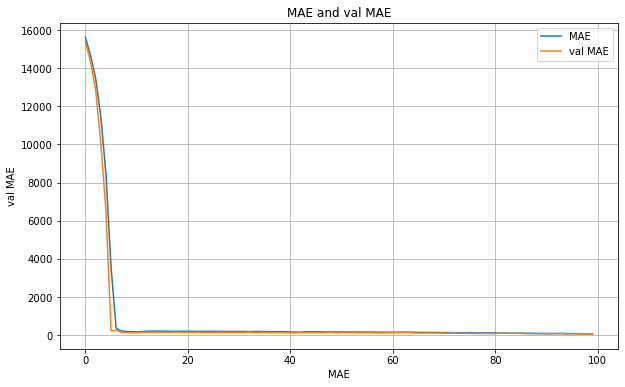

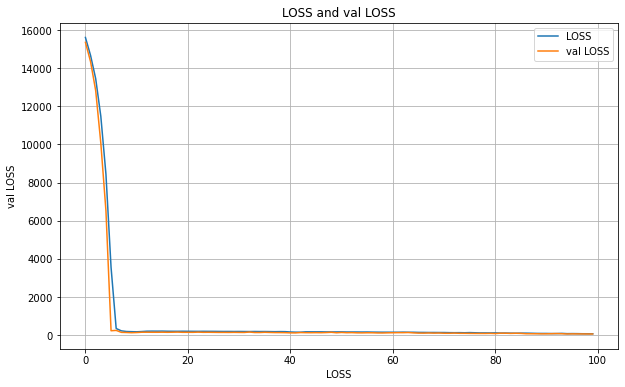

6/6 [==============================] - 0s 26ms/step


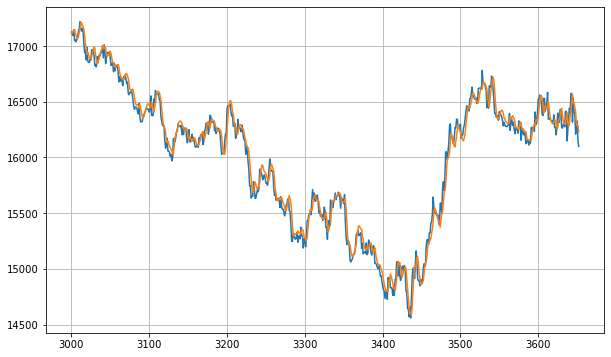

{'mae': 63.81503,
 'mse': 6926.501,
 'rmse': 83.2256,
 'mape': 0.4009342,
 'mase': 1.2331011}

In [5]:
# Load in best performing model
model_11 = tf.keras.models.load_model("model_experiments/model_11/")
model_11.evaluate(valid_set)

# Get mae and loss from history log
mae=history_11.history['mae']
val_mae=history_11.history['val_mae']
loss=history_11.history['loss']
val_loss=history_11.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_11 = model_forecast(model_11, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_11 = forecast_11.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_11))

eval_model_11 = evaluate_predss(y_true=x_valid,
                               y_pred=results_11)
eval_model_11

In [6]:
model_12 = tf.keras.models.Sequential([
    tf.keras.layers.GRU(30, input_shape=(window_size,1), activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_12")

# Get initial weights
init_weights = model_12.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_12.set_weights(init_weights)

model_12.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_12.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_12 = model_12.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_12.name)])

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30)                2970      
                                                                 
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 11,407
Trainable params: 11,407
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     24/Unknown - 4s 29ms/step - loss: 151

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 8s 180ms/step - loss: 15105.1328 - mae: 15105.6338 - val_loss: 14319.2051 - val_mae: 14319.7061
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 12088.3115 - mae: 12088.8105

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 174ms/step - loss: 12088.3115 - mae: 12088.8105 - val_loss: 9083.9404 - val_mae: 9084.4404
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 4055.7800 - mae: 4056.2800

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 5s 200ms/step - loss: 4055.7800 - mae: 4056.2800 - val_loss: 850.0864 - val_mae: 850.5864
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 366.5313 - mae: 367.0313

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 163ms/step - loss: 366.5313 - mae: 367.0313 - val_loss: 158.0345 - val_mae: 158.5345
Epoch 5/100
24/24 [==============================] - ETA: 0s - loss: 120.9152 - mae: 121.4144

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 167ms/step - loss: 120.9152 - mae: 121.4144 - val_loss: 66.5359 - val_mae: 67.0349
Epoch 6/100
24/24 [==============================] - 1s 36ms/step - loss: 82.5997 - mae: 83.0980 - val_loss: 68.2278 - val_mae: 68.7270
Epoch 7/100
22/24 [==========================>...] - ETA: 0s - loss: 82.8182 - mae: 83.3173

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 5s 193ms/step - loss: 82.9300 - mae: 83.4291 - val_loss: 66.3935 - val_mae: 66.8918
Epoch 8/100
24/24 [==============================] - 1s 35ms/step - loss: 81.2195 - mae: 81.7175 - val_loss: 66.4126 - val_mae: 66.9120
Epoch 9/100
24/24 [==============================] - 1s 36ms/step - loss: 84.1805 - mae: 84.6791 - val_loss: 87.1071 - val_mae: 87.6067
Epoch 10/100
24/24 [==============================] - 1s 34ms/step - loss: 89.1761 - mae: 89.6748 - val_loss: 84.8633 - val_mae: 85.3625
Epoch 11/100
24/24 [==============================] - ETA: 0s - loss: 80.8374 - mae: 81.3356

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 162ms/step - loss: 80.8374 - mae: 81.3356 - val_loss: 64.9036 - val_mae: 65.4012
Epoch 12/100
22/24 [==========================>...] - ETA: 0s - loss: 78.5092 - mae: 79.0074

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 5s 188ms/step - loss: 78.6161 - mae: 79.1144 - val_loss: 64.8866 - val_mae: 65.3848
Epoch 13/100
24/24 [==============================] - ETA: 0s - loss: 83.2613 - mae: 83.7604

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 171ms/step - loss: 83.2613 - mae: 83.7604 - val_loss: 64.6247 - val_mae: 65.1223
Epoch 14/100
24/24 [==============================] - 1s 40ms/step - loss: 79.4271 - mae: 79.9255 - val_loss: 70.0800 - val_mae: 70.5793
Epoch 15/100
22/24 [==========================>...] - ETA: 0s - loss: 77.5967 - mae: 78.0955

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 178ms/step - loss: 77.9177 - mae: 78.4165 - val_loss: 63.9639 - val_mae: 64.4623
Epoch 16/100
24/24 [==============================] - 1s 35ms/step - loss: 83.5137 - mae: 84.0129 - val_loss: 64.8879 - val_mae: 65.3862
Epoch 17/100
24/24 [==============================] - 1s 36ms/step - loss: 82.0678 - mae: 82.5665 - val_loss: 77.5565 - val_mae: 78.0548
Epoch 18/100
24/24 [==============================] - 1s 38ms/step - loss: 82.7513 - mae: 83.2499 - val_loss: 77.1822 - val_mae: 77.6794
Epoch 19/100
24/24 [==============================] - 1s 36ms/step - loss: 78.6964 - mae: 79.1953 - val_loss: 78.5878 - val_mae: 79.0857
Epoch 20/100
24/24 [==============================] - 1s 38ms/step - loss: 78.0361 - mae: 78.5348 - val_loss: 75.7095 - val_mae: 76.2086
Epoch 21/100
24/24 [==============================] - 1s 36ms/step - loss: 87.1801 - mae: 87.6790 - val_loss: 106.4642 - val_mae: 106.9639
Epoch 22/100
24/24 [==============================]

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 179ms/step - loss: 77.4264 - mae: 77.9248 - val_loss: 61.8455 - val_mae: 62.3434
Epoch 24/100
24/24 [==============================] - ETA: 0s - loss: 76.2073 - mae: 76.7060

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 156ms/step - loss: 76.2073 - mae: 76.7060 - val_loss: 60.8765 - val_mae: 61.3729
Epoch 25/100
24/24 [==============================] - 1s 36ms/step - loss: 74.8180 - mae: 75.3163 - val_loss: 61.8748 - val_mae: 62.3732
Epoch 26/100
24/24 [==============================] - 1s 34ms/step - loss: 74.9493 - mae: 75.4474 - val_loss: 86.4486 - val_mae: 86.9474
Epoch 27/100
24/24 [==============================] - ETA: 0s - loss: 85.7248 - mae: 86.2237

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 153ms/step - loss: 85.7248 - mae: 86.2237 - val_loss: 59.8090 - val_mae: 60.3065
Epoch 28/100
24/24 [==============================] - 1s 35ms/step - loss: 72.6425 - mae: 73.1404 - val_loss: 62.2530 - val_mae: 62.7518
Epoch 29/100
24/24 [==============================] - 1s 35ms/step - loss: 78.7169 - mae: 79.2162 - val_loss: 66.1763 - val_mae: 66.6752
Epoch 30/100
24/24 [==============================] - 1s 35ms/step - loss: 72.9904 - mae: 73.4887 - val_loss: 60.5321 - val_mae: 61.0303
Epoch 31/100
24/24 [==============================] - 1s 35ms/step - loss: 76.9192 - mae: 77.4174 - val_loss: 62.5480 - val_mae: 63.0465
Epoch 32/100
24/24 [==============================] - 1s 35ms/step - loss: 71.1347 - mae: 71.6330 - val_loss: 77.2677 - val_mae: 77.7664
Epoch 33/100
24/24 [==============================] - 1s 36ms/step - loss: 73.3569 - mae: 73.8556 - val_loss: 69.9001 - val_mae: 70.3989
Epoch 34/100
24/24 [==============================] -

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 174ms/step - loss: 79.8793 - mae: 80.3784 - val_loss: 58.1762 - val_mae: 58.6746
Epoch 38/100
24/24 [==============================] - 1s 35ms/step - loss: 69.3002 - mae: 69.7986 - val_loss: 58.5141 - val_mae: 59.0128
Epoch 39/100
24/24 [==============================] - 1s 34ms/step - loss: 72.6938 - mae: 73.1917 - val_loss: 75.5605 - val_mae: 76.0591
Epoch 40/100
24/24 [==============================] - 1s 35ms/step - loss: 74.6554 - mae: 75.1537 - val_loss: 62.7039 - val_mae: 63.2003
Epoch 41/100
23/24 [===========================>..] - ETA: 0s - loss: 69.0119 - mae: 69.5102

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 178ms/step - loss: 68.9997 - mae: 69.4979 - val_loss: 57.3563 - val_mae: 57.8544
Epoch 42/100
24/24 [==============================] - 1s 34ms/step - loss: 70.3792 - mae: 70.8769 - val_loss: 59.9870 - val_mae: 60.4849
Epoch 43/100
24/24 [==============================] - 1s 35ms/step - loss: 75.9227 - mae: 76.4212 - val_loss: 57.4819 - val_mae: 57.9782
Epoch 44/100
24/24 [==============================] - 1s 34ms/step - loss: 73.5188 - mae: 74.0173 - val_loss: 93.1430 - val_mae: 93.6430
Epoch 45/100
24/24 [==============================] - 1s 34ms/step - loss: 79.2720 - mae: 79.7712 - val_loss: 59.1861 - val_mae: 59.6841
Epoch 46/100
24/24 [==============================] - 1s 34ms/step - loss: 68.5682 - mae: 69.0667 - val_loss: 68.1550 - val_mae: 68.6544
Epoch 47/100
24/24 [==============================] - 1s 37ms/step - loss: 78.7764 - mae: 79.2741 - val_loss: 63.6023 - val_mae: 64.1010
Epoch 48/100
24/24 [==============================] -

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 160ms/step - loss: 67.5043 - mae: 68.0033 - val_loss: 57.2740 - val_mae: 57.7724
Epoch 49/100
24/24 [==============================] - 1s 35ms/step - loss: 74.6956 - mae: 75.1944 - val_loss: 62.5715 - val_mae: 63.0687
Epoch 50/100
24/24 [==============================] - 1s 34ms/step - loss: 67.3277 - mae: 67.8257 - val_loss: 65.9851 - val_mae: 66.4820
Epoch 51/100
24/24 [==============================] - 1s 33ms/step - loss: 81.0909 - mae: 81.5899 - val_loss: 109.6851 - val_mae: 110.1842
Epoch 52/100
24/24 [==============================] - 1s 36ms/step - loss: 78.6746 - mae: 79.1734 - val_loss: 68.1937 - val_mae: 68.6928
Epoch 53/100
24/24 [==============================] - 1s 35ms/step - loss: 67.0403 - mae: 67.5379 - val_loss: 69.4068 - val_mae: 69.9068
Epoch 54/100
24/24 [==============================] - 1s 35ms/step - loss: 66.2734 - mae: 66.7711 - val_loss: 64.4855 - val_mae: 64.9832
Epoch 55/100
24/24 [==============================]

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 5s 200ms/step - loss: 82.9796 - mae: 83.4787 - val_loss: 55.6018 - val_mae: 56.0999
Epoch 60/100
24/24 [==============================] - 1s 36ms/step - loss: 65.1493 - mae: 65.6475 - val_loss: 68.0347 - val_mae: 68.5344
Epoch 61/100
24/24 [==============================] - 1s 38ms/step - loss: 76.5065 - mae: 77.0047 - val_loss: 70.6279 - val_mae: 71.1269
Epoch 62/100
24/24 [==============================] - 1s 39ms/step - loss: 69.4666 - mae: 69.9654 - val_loss: 65.0279 - val_mae: 65.5269
Epoch 63/100
24/24 [==============================] - 1s 43ms/step - loss: 78.6181 - mae: 79.1170 - val_loss: 85.5289 - val_mae: 86.0281
Epoch 64/100
24/24 [==============================] - 1s 42ms/step - loss: 77.6340 - mae: 78.1321 - val_loss: 64.3234 - val_mae: 64.8206
Epoch 65/100
24/24 [==============================] - 1s 44ms/step - loss: 70.1878 - mae: 70.6866 - val_loss: 61.8748 - val_mae: 62.3720
Epoch 66/100
24/24 [==============================] -

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 5s 211ms/step - loss: 70.2975 - mae: 70.7959 - val_loss: 55.3087 - val_mae: 55.8075
Epoch 69/100
24/24 [==============================] - 1s 35ms/step - loss: 68.5766 - mae: 69.0754 - val_loss: 62.3782 - val_mae: 62.8761
Epoch 70/100
24/24 [==============================] - 1s 34ms/step - loss: 66.9550 - mae: 67.4542 - val_loss: 64.3071 - val_mae: 64.8053
Epoch 71/100
24/24 [==============================] - 1s 36ms/step - loss: 72.0872 - mae: 72.5856 - val_loss: 57.2760 - val_mae: 57.7757
Epoch 72/100
24/24 [==============================] - 1s 37ms/step - loss: 75.5463 - mae: 76.0451 - val_loss: 73.1167 - val_mae: 73.6150
Epoch 73/100
24/24 [==============================] - 1s 39ms/step - loss: 84.9888 - mae: 85.4882 - val_loss: 55.4937 - val_mae: 55.9909
Epoch 74/100
24/24 [==============================] - 1s 38ms/step - loss: 70.0847 - mae: 70.5823 - val_loss: 65.4437 - val_mae: 65.9436
Epoch 75/100
24/24 [==============================] -

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 171ms/step - loss: 66.0777 - mae: 66.5754 - val_loss: 54.0026 - val_mae: 54.5010
Epoch 80/100
24/24 [==============================] - 1s 36ms/step - loss: 74.8667 - mae: 75.3650 - val_loss: 79.9756 - val_mae: 80.4754
Epoch 81/100
24/24 [==============================] - 1s 34ms/step - loss: 75.6113 - mae: 76.1098 - val_loss: 55.0097 - val_mae: 55.5086
Epoch 82/100
24/24 [==============================] - 1s 37ms/step - loss: 72.2400 - mae: 72.7371 - val_loss: 81.1042 - val_mae: 81.6037
Epoch 83/100
24/24 [==============================] - 1s 35ms/step - loss: 72.8634 - mae: 73.3617 - val_loss: 69.5696 - val_mae: 70.0679
Epoch 84/100
24/24 [==============================] - ETA: 0s - loss: 70.3728 - mae: 70.8712

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 171ms/step - loss: 70.3728 - mae: 70.8712 - val_loss: 53.9035 - val_mae: 54.4017
Epoch 85/100
24/24 [==============================] - 1s 38ms/step - loss: 71.0924 - mae: 71.5909 - val_loss: 66.2806 - val_mae: 66.7797
Epoch 86/100
24/24 [==============================] - 1s 34ms/step - loss: 66.5570 - mae: 67.0547 - val_loss: 57.8767 - val_mae: 58.3752
Epoch 87/100
24/24 [==============================] - 1s 35ms/step - loss: 63.1414 - mae: 63.6382 - val_loss: 72.1753 - val_mae: 72.6745
Epoch 88/100
24/24 [==============================] - 1s 37ms/step - loss: 70.0413 - mae: 70.5397 - val_loss: 53.9311 - val_mae: 54.4278
Epoch 89/100
24/24 [==============================] - 1s 37ms/step - loss: 65.1468 - mae: 65.6443 - val_loss: 63.0383 - val_mae: 63.5377
Epoch 90/100
24/24 [==============================] - 1s 41ms/step - loss: 66.1961 - mae: 66.6932 - val_loss: 99.2074 - val_mae: 99.7069
Epoch 91/100
24/24 [==============================] -

INFO:tensorflow:Assets written to: model_experiments\model_12\assets


INFO:tensorflow:Assets written to: model_experiments\model_12\assets


24/24 [==============================] - 4s 170ms/step - loss: 74.9870 - mae: 75.4851 - val_loss: 53.8075 - val_mae: 54.3059
Epoch 92/100
24/24 [==============================] - 1s 37ms/step - loss: 74.8354 - mae: 75.3339 - val_loss: 89.8326 - val_mae: 90.3326
Epoch 93/100
24/24 [==============================] - 1s 34ms/step - loss: 67.6139 - mae: 68.1127 - val_loss: 56.5213 - val_mae: 57.0171
Epoch 94/100
24/24 [==============================] - 1s 34ms/step - loss: 62.7468 - mae: 63.2446 - val_loss: 59.2025 - val_mae: 59.7023
Epoch 95/100
24/24 [==============================] - 1s 35ms/step - loss: 66.2584 - mae: 66.7561 - val_loss: 56.4280 - val_mae: 56.9247
Epoch 96/100
24/24 [==============================] - 1s 39ms/step - loss: 66.1510 - mae: 66.6487 - val_loss: 56.8373 - val_mae: 57.3352
Epoch 97/100
24/24 [==============================] - 1s 42ms/step - loss: 74.3692 - mae: 74.8683 - val_loss: 99.0349 - val_mae: 99.5349
Epoch 98/100
24/24 [==============================] -

5/5 [==============================] - 1s 19ms/step - loss: 53.8075 - mae: 54.3059


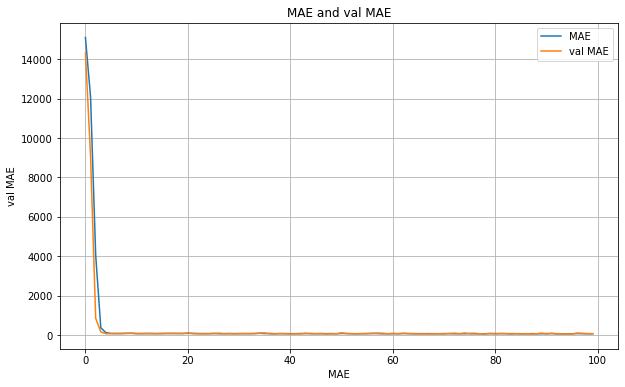

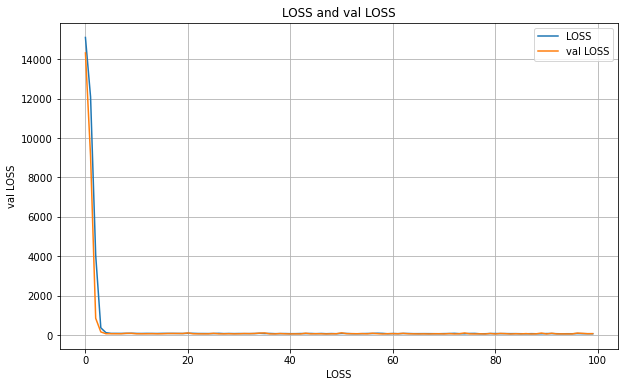

6/6 [==============================] - 0s 29ms/step


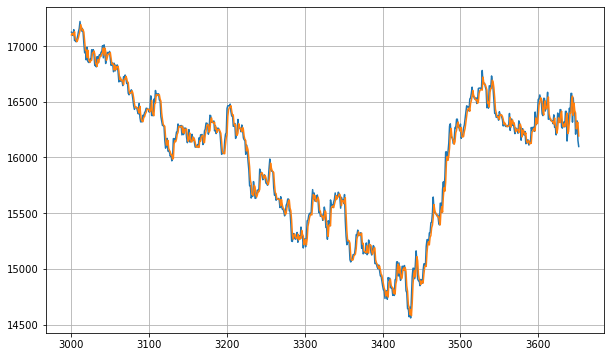

{'mae': 53.770363,
 'mse': 5319.397,
 'rmse': 72.9342,
 'mape': 0.33755037,
 'mase': 1.0390075}

In [7]:
# Load in best performing model
model_12 = tf.keras.models.load_model("model_experiments/model_12/")
model_12.evaluate(valid_set)

# Get mae and loss from history log
mae=history_12.history['mae']
val_mae=history_12.history['val_mae']
loss=history_12.history['loss']
val_loss=history_12.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_12 = model_forecast(model_12, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_12 = forecast_12.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_12))

eval_model_12 = evaluate_predss(y_true=x_valid,
                               y_pred=results_12)
eval_model_12

In [8]:
model_13 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=30, kernel_size=3, activation="relu", input_shape=[window_size, 1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv1D(filters=30, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.LSTM(30, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_13")

# Get initial weights
init_weights = model_13.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_13.set_weights(init_weights)

model_13.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_13.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_13 = model_13.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_13.name)])

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 30)            120       
                                                                 
 batch_normalization (BatchN  (None, 28, 30)           120       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 batch_normalization_1 (Batc  (None, 26, 30)           120       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 26, 30)            0  

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 14s 395ms/step - loss: 15699.9219 - mae: 15700.4219 - val_loss: 15931.8955 - val_mae: 15932.3945
Epoch 2/100
23/24 [===========================>..] - ETA: 0s - loss: 15659.3018 - mae: 15659.8018

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 334ms/step - loss: 15659.5674 - mae: 15660.0684 - val_loss: 15869.5059 - val_mae: 15870.0068
Epoch 3/100
23/24 [===========================>..] - ETA: 0s - loss: 15573.1934 - mae: 15573.6934

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 9s 378ms/step - loss: 15576.1377 - mae: 15576.6367 - val_loss: 15777.5742 - val_mae: 15778.0742
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 15476.3701 - mae: 15476.8711

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 353ms/step - loss: 15476.3701 - mae: 15476.8711 - val_loss: 15662.7832 - val_mae: 15663.2842
Epoch 5/100
24/24 [==============================] - ETA: 0s - loss: 15372.1074 - mae: 15372.6074

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 326ms/step - loss: 15372.1074 - mae: 15372.6074 - val_loss: 15557.9229 - val_mae: 15558.4219
Epoch 6/100
23/24 [===========================>..] - ETA: 0s - loss: 15259.4033 - mae: 15259.9033

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 344ms/step - loss: 15262.0986 - mae: 15262.5996 - val_loss: 15445.5020 - val_mae: 15446.0020
Epoch 7/100
22/24 [==========================>...] - ETA: 0s - loss: 15122.0654 - mae: 15122.5654

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 9s 362ms/step - loss: 15144.3721 - mae: 15144.8711 - val_loss: 15324.3340 - val_mae: 15324.8350
Epoch 8/100
24/24 [==============================] - ETA: 0s - loss: 15017.9678 - mae: 15018.4678

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 10s 421ms/step - loss: 15017.9678 - mae: 15018.4678 - val_loss: 15193.9727 - val_mae: 15194.4736
Epoch 9/100
23/24 [===========================>..] - ETA: 0s - loss: 14879.6885 - mae: 14880.1885

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 334ms/step - loss: 14882.3008 - mae: 14882.7998 - val_loss: 15054.0566 - val_mae: 15054.5566
Epoch 10/100
23/24 [===========================>..] - ETA: 0s - loss: 14732.9473 - mae: 14733.4473

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 316ms/step - loss: 14737.2549 - mae: 14737.7549 - val_loss: 14904.4238 - val_mae: 14904.9229
Epoch 11/100
23/24 [===========================>..] - ETA: 0s - loss: 14582.9541 - mae: 14583.4541

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 332ms/step - loss: 14582.5742 - mae: 14583.0732 - val_loss: 14744.8428 - val_mae: 14745.3438
Epoch 12/100
23/24 [===========================>..] - ETA: 0s - loss: 14412.2197 - mae: 14412.7197

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 330ms/step - loss: 14418.0352 - mae: 14418.5352 - val_loss: 14575.2676 - val_mae: 14575.7676
Epoch 13/100
23/24 [===========================>..] - ETA: 0s - loss: 14241.4434 - mae: 14241.9434

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 316ms/step - loss: 14243.5029 - mae: 14244.0029 - val_loss: 14395.8477 - val_mae: 14396.3486
Epoch 14/100
23/24 [===========================>..] - ETA: 0s - loss: 14055.2021 - mae: 14055.7021

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 335ms/step - loss: 14058.9600 - mae: 14059.4600 - val_loss: 14206.5664 - val_mae: 14207.0654
Epoch 15/100
23/24 [===========================>..] - ETA: 0s - loss: 13860.5566 - mae: 13861.0566

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 331ms/step - loss: 13864.3262 - mae: 13864.8252 - val_loss: 14007.9473 - val_mae: 14008.4463
Epoch 16/100
23/24 [===========================>..] - ETA: 0s - loss: 13654.6914 - mae: 13655.1914

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 316ms/step - loss: 13659.5137 - mae: 13660.0146 - val_loss: 13798.3770 - val_mae: 13798.8779
Epoch 17/100
22/24 [==========================>...] - ETA: 0s - loss: 13419.9658 - mae: 13420.4658

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 332ms/step - loss: 13444.5469 - mae: 13445.0469 - val_loss: 13581.5361 - val_mae: 13582.0371
Epoch 18/100
23/24 [===========================>..] - ETA: 0s - loss: 13216.2158 - mae: 13216.7158

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 317ms/step - loss: 13219.4277 - mae: 13219.9287 - val_loss: 13353.1963 - val_mae: 13353.6963
Epoch 19/100
23/24 [===========================>..] - ETA: 0s - loss: 12982.1074 - mae: 12982.6074

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 332ms/step - loss: 12984.1445 - mae: 12984.6436 - val_loss: 13113.4658 - val_mae: 13113.9658
Epoch 20/100
23/24 [===========================>..] - ETA: 0s - loss: 12736.7803 - mae: 12737.2803

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 332ms/step - loss: 12738.7178 - mae: 12739.2178 - val_loss: 12866.4238 - val_mae: 12866.9229
Epoch 21/100
23/24 [===========================>..] - ETA: 0s - loss: 12479.3223 - mae: 12479.8223

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 316ms/step - loss: 12483.1260 - mae: 12483.6260 - val_loss: 12604.4150 - val_mae: 12604.9150
Epoch 22/100
24/24 [==============================] - ETA: 0s - loss: 12217.4463 - mae: 12217.9463

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 9s 360ms/step - loss: 12217.4463 - mae: 12217.9463 - val_loss: 12327.2090 - val_mae: 12327.7090
Epoch 23/100
23/24 [===========================>..] - ETA: 0s - loss: 11937.8262 - mae: 11938.3262

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 331ms/step - loss: 11941.6777 - mae: 11942.1777 - val_loss: 12043.0518 - val_mae: 12043.5518
Epoch 24/100
24/24 [==============================] - ETA: 0s - loss: 11655.8682 - mae: 11656.3682

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 320ms/step - loss: 11655.8682 - mae: 11656.3682 - val_loss: 11753.5537 - val_mae: 11754.0537
Epoch 25/100
23/24 [===========================>..] - ETA: 0s - loss: 11360.1221 - mae: 11360.6221

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 339ms/step - loss: 11360.0459 - mae: 11360.5459 - val_loss: 11450.8379 - val_mae: 11451.3369
Epoch 26/100
24/24 [==============================] - ETA: 0s - loss: 11054.2646 - mae: 11054.7646

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 318ms/step - loss: 11054.2646 - mae: 11054.7646 - val_loss: 11140.7168 - val_mae: 11141.2168
Epoch 27/100
23/24 [===========================>..] - ETA: 0s - loss: 10734.6348 - mae: 10735.1348

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 333ms/step - loss: 10738.5830 - mae: 10739.0830 - val_loss: 10825.1318 - val_mae: 10825.6328
Epoch 28/100
24/24 [==============================] - ETA: 0s - loss: 10413.0137 - mae: 10413.5137

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 330ms/step - loss: 10413.0137 - mae: 10413.5137 - val_loss: 10494.5488 - val_mae: 10495.0498
Epoch 29/100
24/24 [==============================] - ETA: 0s - loss: 10077.6396 - mae: 10078.1396

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 315ms/step - loss: 10077.6396 - mae: 10078.1396 - val_loss: 10155.9248 - val_mae: 10156.4248
Epoch 30/100
24/24 [==============================] - ETA: 0s - loss: 9732.4912 - mae: 9732.9912

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 341ms/step - loss: 9732.4912 - mae: 9732.9912 - val_loss: 9800.5938 - val_mae: 9801.0928
Epoch 31/100
24/24 [==============================] - ETA: 0s - loss: 9377.6289 - mae: 9378.1289

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 319ms/step - loss: 9377.6289 - mae: 9378.1289 - val_loss: 9439.0801 - val_mae: 9439.5791
Epoch 32/100
24/24 [==============================] - ETA: 0s - loss: 9013.1230 - mae: 9013.6230

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 341ms/step - loss: 9013.1230 - mae: 9013.6230 - val_loss: 9067.1709 - val_mae: 9067.6709
Epoch 33/100
23/24 [===========================>..] - ETA: 0s - loss: 8635.6514 - mae: 8636.1514

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 330ms/step - loss: 8639.0029 - mae: 8639.5039 - val_loss: 8686.6543 - val_mae: 8687.1543
Epoch 34/100
23/24 [===========================>..] - ETA: 0s - loss: 8250.1709 - mae: 8250.6709

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 316ms/step - loss: 8255.3301 - mae: 8255.8301 - val_loss: 8299.7803 - val_mae: 8300.2803
Epoch 35/100
23/24 [===========================>..] - ETA: 0s - loss: 7856.4619 - mae: 7856.9619

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 345ms/step - loss: 7862.1738 - mae: 7862.6733 - val_loss: 7899.9800 - val_mae: 7900.4800
Epoch 36/100
24/24 [==============================] - ETA: 0s - loss: 7459.5874 - mae: 7460.0869

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 328ms/step - loss: 7459.5874 - mae: 7460.0869 - val_loss: 7493.0898 - val_mae: 7493.5898
Epoch 37/100
23/24 [===========================>..] - ETA: 0s - loss: 7046.7261 - mae: 7047.2261

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 342ms/step - loss: 7047.6328 - mae: 7048.1328 - val_loss: 7074.5112 - val_mae: 7075.0112
Epoch 38/100
23/24 [===========================>..] - ETA: 0s - loss: 6627.4478 - mae: 6627.9478

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 337ms/step - loss: 6626.3604 - mae: 6626.8599 - val_loss: 6647.8716 - val_mae: 6648.3716
Epoch 39/100
24/24 [==============================] - ETA: 0s - loss: 6195.8325 - mae: 6196.3325

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 334ms/step - loss: 6195.8325 - mae: 6196.3325 - val_loss: 6212.3950 - val_mae: 6212.8950
Epoch 40/100
23/24 [===========================>..] - ETA: 0s - loss: 5752.4424 - mae: 5752.9424

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 315ms/step - loss: 5756.1143 - mae: 5756.6143 - val_loss: 5767.5693 - val_mae: 5768.0693
Epoch 41/100
24/24 [==============================] - ETA: 0s - loss: 5307.2510 - mae: 5307.7510

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 346ms/step - loss: 5307.2510 - mae: 5307.7510 - val_loss: 5314.2217 - val_mae: 5314.7217
Epoch 42/100
23/24 [===========================>..] - ETA: 0s - loss: 4847.3843 - mae: 4847.8843

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 317ms/step - loss: 4849.3145 - mae: 4849.8145 - val_loss: 4851.4438 - val_mae: 4851.9438
Epoch 43/100
23/24 [===========================>..] - ETA: 0s - loss: 4383.5420 - mae: 4384.0420

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 335ms/step - loss: 4382.3584 - mae: 4382.8584 - val_loss: 4379.4668 - val_mae: 4379.9673
Epoch 44/100
23/24 [===========================>..] - ETA: 0s - loss: 3904.1667 - mae: 3904.6667

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 330ms/step - loss: 3906.4412 - mae: 3906.9412 - val_loss: 3898.4253 - val_mae: 3898.9253
Epoch 45/100
23/24 [===========================>..] - ETA: 0s - loss: 3421.6750 - mae: 3422.1750

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 316ms/step - loss: 3421.6174 - mae: 3422.1174 - val_loss: 3408.8169 - val_mae: 3409.3169
Epoch 46/100
23/24 [===========================>..] - ETA: 0s - loss: 2923.7473 - mae: 2924.2473

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 338ms/step - loss: 2928.3767 - mae: 2928.8767 - val_loss: 2911.4338 - val_mae: 2911.9338
Epoch 47/100
23/24 [===========================>..] - ETA: 0s - loss: 2438.6792 - mae: 2439.1792

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 332ms/step - loss: 2438.8723 - mae: 2439.3723 - val_loss: 2414.7209 - val_mae: 2415.2209
Epoch 48/100
23/24 [===========================>..] - ETA: 0s - loss: 1957.2717 - mae: 1957.7717

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 317ms/step - loss: 1961.0389 - mae: 1961.5389 - val_loss: 1918.5841 - val_mae: 1919.0841
Epoch 49/100
24/24 [==============================] - ETA: 0s - loss: 1516.5411 - mae: 1517.0411

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 338ms/step - loss: 1516.5411 - mae: 1517.0411 - val_loss: 1450.9788 - val_mae: 1451.4788
Epoch 50/100
23/24 [===========================>..] - ETA: 0s - loss: 1186.1355 - mae: 1186.6355

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 332ms/step - loss: 1191.3745 - mae: 1191.8745 - val_loss: 1076.5392 - val_mae: 1077.0391
Epoch 51/100
23/24 [===========================>..] - ETA: 0s - loss: 1005.6458 - mae: 1006.1458

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 316ms/step - loss: 1008.4902 - mae: 1008.9902 - val_loss: 836.3389 - val_mae: 836.8389
Epoch 52/100
23/24 [===========================>..] - ETA: 0s - loss: 922.5788 - mae: 923.0787

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 355ms/step - loss: 924.1113 - mae: 924.6112 - val_loss: 700.4745 - val_mae: 700.9745
Epoch 53/100
23/24 [===========================>..] - ETA: 0s - loss: 877.5179 - mae: 878.0178

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 330ms/step - loss: 878.7476 - mae: 879.2476 - val_loss: 622.7917 - val_mae: 623.2917
Epoch 54/100
23/24 [===========================>..] - ETA: 0s - loss: 857.2307 - mae: 857.7307

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 316ms/step - loss: 859.2203 - mae: 859.7203 - val_loss: 581.7122 - val_mae: 582.2120
Epoch 55/100
24/24 [==============================] - ETA: 0s - loss: 815.8566 - mae: 816.3565

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 336ms/step - loss: 815.8566 - mae: 816.3565 - val_loss: 548.9180 - val_mae: 549.4180
Epoch 56/100
23/24 [===========================>..] - ETA: 0s - loss: 694.7164 - mae: 695.2164

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 320ms/step - loss: 693.1036 - mae: 693.6036 - val_loss: 512.6457 - val_mae: 513.1457
Epoch 57/100
23/24 [===========================>..] - ETA: 0s - loss: 657.1361 - mae: 657.6361

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 338ms/step - loss: 657.4578 - mae: 657.9578 - val_loss: 494.6217 - val_mae: 495.1217
Epoch 58/100
23/24 [===========================>..] - ETA: 0s - loss: 627.1893 - mae: 627.6892

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 331ms/step - loss: 626.8677 - mae: 627.3676 - val_loss: 482.0047 - val_mae: 482.5047
Epoch 59/100
23/24 [===========================>..] - ETA: 0s - loss: 618.0307 - mae: 618.5303

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 319ms/step - loss: 618.7581 - mae: 619.2577 - val_loss: 477.9455 - val_mae: 478.4454
Epoch 60/100
24/24 [==============================] - ETA: 0s - loss: 602.1561 - mae: 602.6560

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 9s 365ms/step - loss: 602.1561 - mae: 602.6560 - val_loss: 476.8728 - val_mae: 477.3728
Epoch 61/100
24/24 [==============================] - ETA: 0s - loss: 600.4391 - mae: 600.9388

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 336ms/step - loss: 600.4391 - mae: 600.9388 - val_loss: 397.9589 - val_mae: 398.4587
Epoch 62/100
23/24 [===========================>..] - ETA: 0s - loss: 573.8016 - mae: 574.3015

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 324ms/step - loss: 573.5541 - mae: 574.0540 - val_loss: 340.7289 - val_mae: 341.2282
Epoch 63/100
24/24 [==============================] - ETA: 0s - loss: 586.2090 - mae: 586.7086

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 8s 338ms/step - loss: 586.2090 - mae: 586.7086 - val_loss: 301.5292 - val_mae: 302.0292
Epoch 64/100
24/24 [==============================] - 1s 48ms/step - loss: 549.0040 - mae: 549.5040 - val_loss: 330.1600 - val_mae: 330.6600
Epoch 65/100
24/24 [==============================] - 1s 47ms/step - loss: 541.8862 - mae: 542.3860 - val_loss: 357.9019 - val_mae: 358.4019
Epoch 66/100
24/24 [==============================] - 1s 48ms/step - loss: 544.0930 - mae: 544.5927 - val_loss: 361.6517 - val_mae: 362.1516
Epoch 67/100
24/24 [==============================] - 1s 48ms/step - loss: 531.9795 - mae: 532.4794 - val_loss: 393.1500 - val_mae: 393.6500
Epoch 68/100
24/24 [==============================] - 1s 48ms/step - loss: 527.4705 - mae: 527.9703 - val_loss: 368.3455 - val_mae: 368.8455
Epoch 69/100
24/24 [==============================] - 1s 48ms/step - loss: 528.0223 - mae: 528.5223 - val_loss: 459.0682 - val_mae: 459.5677
Epoch 70/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 9s 359ms/step - loss: 476.7239 - mae: 477.2237 - val_loss: 251.4275 - val_mae: 251.9275
Epoch 85/100
24/24 [==============================] - 1s 48ms/step - loss: 460.2236 - mae: 460.7232 - val_loss: 821.3458 - val_mae: 821.8458
Epoch 86/100
24/24 [==============================] - 1s 49ms/step - loss: 462.9195 - mae: 463.4192 - val_loss: 1639.7896 - val_mae: 1640.2896
Epoch 87/100
24/24 [==============================] - 1s 50ms/step - loss: 450.8427 - mae: 451.3426 - val_loss: 285.7830 - val_mae: 286.2830
Epoch 88/100
24/24 [==============================] - 1s 46ms/step - loss: 455.0962 - mae: 455.5958 - val_loss: 462.9989 - val_mae: 463.4989
Epoch 89/100
24/24 [==============================] - 1s 48ms/step - loss: 448.7851 - mae: 449.2845 - val_loss: 1036.9868 - val_mae: 1037.4868
Epoch 90/100
24/24 [==============================] - 1s 48ms/step - loss: 453.8416 - mae: 454.3412 - val_loss: 812.9852 - val_mae: 813.4852
Epoch 91/100
24/24 [=

INFO:tensorflow:Assets written to: model_experiments\model_13\assets


INFO:tensorflow:Assets written to: model_experiments\model_13\assets


24/24 [==============================] - 7s 315ms/step - loss: 440.6812 - mae: 441.1812 - val_loss: 199.7167 - val_mae: 200.2160
Epoch 95/100
24/24 [==============================] - 1s 50ms/step - loss: 422.8078 - mae: 423.3074 - val_loss: 1088.3303 - val_mae: 1088.8303
Epoch 96/100
24/24 [==============================] - 1s 49ms/step - loss: 450.9082 - mae: 451.4077 - val_loss: 1100.5107 - val_mae: 1101.0107
Epoch 97/100
24/24 [==============================] - 1s 48ms/step - loss: 425.0318 - mae: 425.5315 - val_loss: 998.8719 - val_mae: 999.3719
Epoch 98/100
24/24 [==============================] - 1s 49ms/step - loss: 452.9469 - mae: 453.4467 - val_loss: 318.4317 - val_mae: 318.9306
Epoch 99/100
24/24 [==============================] - 1s 49ms/step - loss: 432.6672 - mae: 433.1672 - val_loss: 317.2729 - val_mae: 317.7723
Epoch 100/100
24/24 [==============================] - 2s 56ms/step - loss: 455.4933 - mae: 455.9932 - val_loss: 346.2159 - val_mae: 346.7159


5/5 [==============================] - 1s 24ms/step - loss: 199.7167 - mae: 200.2160


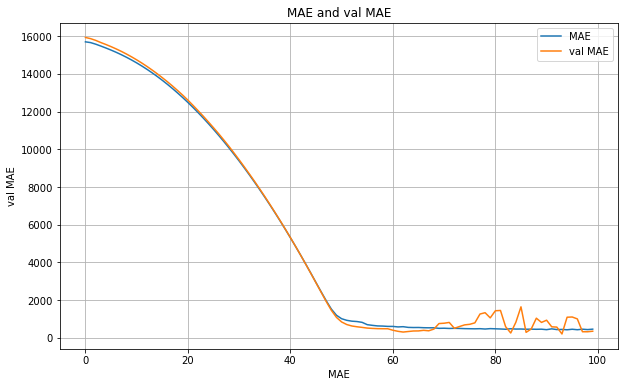

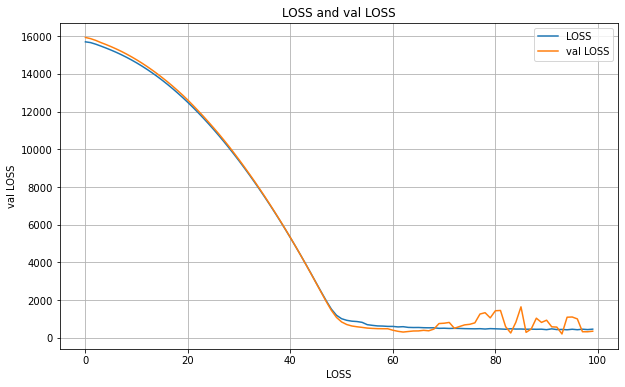

6/6 [==============================] - 1s 27ms/step


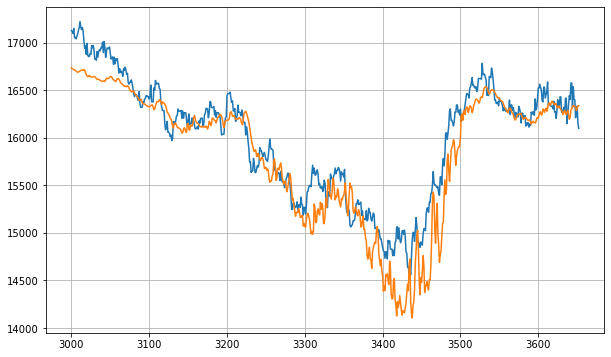

{'mae': 206.75072,
 'mse': 77168.82,
 'rmse': 277.79276,
 'mape': 1.3072441,
 'mase': 3.9950547}

In [9]:
# Load in best performing model
model_13 = tf.keras.models.load_model("model_experiments/model_13/")
model_13.evaluate(valid_set)

# Get mae and loss from history log
mae=history_13.history['mae']
val_mae=history_13.history['val_mae']
loss=history_13.history['loss']
val_loss=history_13.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_13 = model_forecast(model_13, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_13 = forecast_13.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_13))

eval_model_13 = evaluate_predss(y_true=x_valid,
                               y_pred=results_13)
eval_model_13

In [10]:
model_14 = tf.keras.models.Sequential([
    tf.keras.layers.GRU(30, input_shape=[window_size, 1], activation="relu", return_sequences=True),
    tf.keras.layers.Conv1D(filters=30, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv1D(filters=30, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.LSTM(30, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_14")

# Get initial weights
init_weights = model_14.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_14.set_weights(init_weights)

model_14.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_14.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_14 = model_14.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_14.name)])

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 30)            2970      
                                                                 
 conv1d (Conv1D)             (None, 28, 30)            2730      
                                                                 
 batch_normalization (BatchN  (None, 28, 30)           120       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 30)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 30)            2730      
                                                                 
 batch_normalization_1 (Batc  (None, 26, 30)           120       
 hNormalization)                                          

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 18s 513ms/step - loss: 15698.7881 - mae: 15699.2871 - val_loss: 15927.3037 - val_mae: 15927.8027
Epoch 2/100
23/24 [===========================>..] - ETA: 0s - loss: 15647.2510 - mae: 15647.7510

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 473ms/step - loss: 15650.1348 - mae: 15650.6348 - val_loss: 15855.3418 - val_mae: 15855.8408
Epoch 3/100
23/24 [===========================>..] - ETA: 0s - loss: 15548.9053 - mae: 15549.4053

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 417ms/step - loss: 15552.4053 - mae: 15552.9053 - val_loss: 15743.4658 - val_mae: 15743.9658
Epoch 4/100
23/24 [===========================>..] - ETA: 0s - loss: 15432.3096 - mae: 15432.8096

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 436ms/step - loss: 15437.7725 - mae: 15438.2725 - val_loss: 15640.3174 - val_mae: 15640.8184
Epoch 5/100
23/24 [===========================>..] - ETA: 0s - loss: 15312.7090 - mae: 15313.2090

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 410ms/step - loss: 15319.1367 - mae: 15319.6367 - val_loss: 15526.0645 - val_mae: 15526.5635
Epoch 6/100
23/24 [===========================>..] - ETA: 0s - loss: 15186.9336 - mae: 15187.4336

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 441ms/step - loss: 15193.4004 - mae: 15193.9004 - val_loss: 15403.1367 - val_mae: 15403.6377
Epoch 7/100
23/24 [===========================>..] - ETA: 0s - loss: 15055.1035 - mae: 15055.6035

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 442ms/step - loss: 15058.2832 - mae: 15058.7822 - val_loss: 15271.3164 - val_mae: 15271.8174
Epoch 8/100
23/24 [===========================>..] - ETA: 0s - loss: 14907.5635 - mae: 14908.0635

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 413ms/step - loss: 14912.6562 - mae: 14913.1553 - val_loss: 15089.5840 - val_mae: 15090.0850
Epoch 9/100
23/24 [===========================>..] - ETA: 0s - loss: 14752.9697 - mae: 14753.4697

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 433ms/step - loss: 14755.9287 - mae: 14756.4287 - val_loss: 14927.3818 - val_mae: 14927.8828
Epoch 10/100
23/24 [===========================>..] - ETA: 0s - loss: 14587.7314 - mae: 14588.2314

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 427ms/step - loss: 14587.7090 - mae: 14588.2090 - val_loss: 14746.1045 - val_mae: 14746.6055
Epoch 11/100
23/24 [===========================>..] - ETA: 0s - loss: 14403.1211 - mae: 14403.6211

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 411ms/step - loss: 14407.7227 - mae: 14408.2227 - val_loss: 14561.9375 - val_mae: 14562.4365
Epoch 12/100
23/24 [===========================>..] - ETA: 0s - loss: 14210.0059 - mae: 14210.5059

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 434ms/step - loss: 14215.7305 - mae: 14216.2305 - val_loss: 14359.7725 - val_mae: 14360.2715
Epoch 13/100
23/24 [===========================>..] - ETA: 0s - loss: 14005.0752 - mae: 14005.5752

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 433ms/step - loss: 14011.5996 - mae: 14012.0996 - val_loss: 14148.3271 - val_mae: 14148.8262
Epoch 14/100
23/24 [===========================>..] - ETA: 0s - loss: 13790.9785 - mae: 13791.4785

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 417ms/step - loss: 13795.1084 - mae: 13795.6084 - val_loss: 13969.0176 - val_mae: 13969.5166
Epoch 15/100
23/24 [===========================>..] - ETA: 0s - loss: 13562.7461 - mae: 13563.2461

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 442ms/step - loss: 13565.5244 - mae: 13566.0244 - val_loss: 13774.6035 - val_mae: 13775.1025
Epoch 16/100
23/24 [===========================>..] - ETA: 0s - loss: 13319.5371 - mae: 13320.0371

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 434ms/step - loss: 13323.9746 - mae: 13324.4736 - val_loss: 13577.2373 - val_mae: 13577.7383
Epoch 17/100
23/24 [===========================>..] - ETA: 0s - loss: 13070.9834 - mae: 13071.4834

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 416ms/step - loss: 13070.4180 - mae: 13070.9170 - val_loss: 13333.5010 - val_mae: 13334.0020
Epoch 18/100
23/24 [===========================>..] - ETA: 0s - loss: 12796.7227 - mae: 12797.2227

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 448ms/step - loss: 12804.6328 - mae: 12805.1338 - val_loss: 13070.3164 - val_mae: 13070.8174
Epoch 19/100
23/24 [===========================>..] - ETA: 0s - loss: 12522.9170 - mae: 12523.4170

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 456ms/step - loss: 12526.5762 - mae: 12527.0771 - val_loss: 12747.0791 - val_mae: 12747.5791
Epoch 20/100
23/24 [===========================>..] - ETA: 0s - loss: 12232.7783 - mae: 12233.2783

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 443ms/step - loss: 12236.2559 - mae: 12236.7568 - val_loss: 12360.4268 - val_mae: 12360.9268
Epoch 21/100
23/24 [===========================>..] - ETA: 0s - loss: 11928.3643 - mae: 11928.8643

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 437ms/step - loss: 11933.6982 - mae: 11934.1982 - val_loss: 12032.4434 - val_mae: 12032.9434
Epoch 22/100
23/24 [===========================>..] - ETA: 0s - loss: 11614.2314 - mae: 11614.7314

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 414ms/step - loss: 11618.9268 - mae: 11619.4258 - val_loss: 11707.1973 - val_mae: 11707.6982
Epoch 23/100
23/24 [===========================>..] - ETA: 0s - loss: 11287.5039 - mae: 11288.0039

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 442ms/step - loss: 11291.9766 - mae: 11292.4766 - val_loss: 11368.9434 - val_mae: 11369.4434
Epoch 24/100
23/24 [===========================>..] - ETA: 0s - loss: 10953.3438 - mae: 10953.8438

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 478ms/step - loss: 10952.9082 - mae: 10953.4082 - val_loss: 11026.7129 - val_mae: 11027.2129
Epoch 25/100
23/24 [===========================>..] - ETA: 0s - loss: 10600.5107 - mae: 10601.0107

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 431ms/step - loss: 10601.7559 - mae: 10602.2559 - val_loss: 10662.0010 - val_mae: 10662.5010
Epoch 26/100
23/24 [===========================>..] - ETA: 0s - loss: 10237.8516 - mae: 10238.3516

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 442ms/step - loss: 10238.5791 - mae: 10239.0791 - val_loss: 10291.0654 - val_mae: 10291.5664
Epoch 27/100
23/24 [===========================>..] - ETA: 0s - loss: 9856.4697 - mae: 9856.9697

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 449ms/step - loss: 9863.4346 - mae: 9863.9336 - val_loss: 9910.2979 - val_mae: 9910.7979
Epoch 28/100
23/24 [===========================>..] - ETA: 0s - loss: 9471.5449 - mae: 9472.0449

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 461ms/step - loss: 9476.3809 - mae: 9476.8818 - val_loss: 9515.2070 - val_mae: 9515.7070
Epoch 29/100
23/24 [===========================>..] - ETA: 0s - loss: 9074.0059 - mae: 9074.5059

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 440ms/step - loss: 9077.4824 - mae: 9077.9814 - val_loss: 9110.1992 - val_mae: 9110.6982
Epoch 30/100
23/24 [===========================>..] - ETA: 0s - loss: 8664.7383 - mae: 8665.2383

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 435ms/step - loss: 8666.8057 - mae: 8667.3057 - val_loss: 8692.8701 - val_mae: 8693.3701
Epoch 31/100
23/24 [===========================>..] - ETA: 0s - loss: 8243.1719 - mae: 8243.6719

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 445ms/step - loss: 8244.4092 - mae: 8244.9092 - val_loss: 8264.1787 - val_mae: 8264.6787
Epoch 32/100
23/24 [===========================>..] - ETA: 0s - loss: 7804.1499 - mae: 7804.6499

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 446ms/step - loss: 7810.3691 - mae: 7810.8691 - val_loss: 7823.8662 - val_mae: 7824.3662
Epoch 33/100
23/24 [===========================>..] - ETA: 0s - loss: 7363.2002 - mae: 7363.7002

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 418ms/step - loss: 7364.7515 - mae: 7365.2510 - val_loss: 7372.0508 - val_mae: 7372.5508
Epoch 34/100
23/24 [===========================>..] - ETA: 0s - loss: 6903.7749 - mae: 6904.2749

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 444ms/step - loss: 6907.6289 - mae: 6908.1294 - val_loss: 6908.7964 - val_mae: 6909.2954
Epoch 35/100
23/24 [===========================>..] - ETA: 0s - loss: 6438.2217 - mae: 6438.7217

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 438ms/step - loss: 6439.0708 - mae: 6439.5708 - val_loss: 6434.0273 - val_mae: 6434.5273
Epoch 36/100
23/24 [===========================>..] - ETA: 0s - loss: 5958.5532 - mae: 5959.0532

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 421ms/step - loss: 5959.1509 - mae: 5959.6504 - val_loss: 5948.0684 - val_mae: 5948.5684
Epoch 37/100
23/24 [===========================>..] - ETA: 0s - loss: 5465.7158 - mae: 5466.2158

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 442ms/step - loss: 5467.9385 - mae: 5468.4385 - val_loss: 5450.8242 - val_mae: 5451.3242
Epoch 38/100
23/24 [===========================>..] - ETA: 0s - loss: 4967.3765 - mae: 4967.8765

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 439ms/step - loss: 4965.5083 - mae: 4966.0083 - val_loss: 4942.3711 - val_mae: 4942.8711
Epoch 39/100
23/24 [===========================>..] - ETA: 0s - loss: 4449.7529 - mae: 4450.2529

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 414ms/step - loss: 4451.9302 - mae: 4452.4302 - val_loss: 4422.8516 - val_mae: 4423.3516
Epoch 40/100
23/24 [===========================>..] - ETA: 0s - loss: 3927.8796 - mae: 3928.3796

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 445ms/step - loss: 3927.2815 - mae: 3927.7815 - val_loss: 3892.3467 - val_mae: 3892.8467
Epoch 41/100
23/24 [===========================>..] - ETA: 0s - loss: 3389.9915 - mae: 3390.4915

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 427ms/step - loss: 3391.6304 - mae: 3392.1304 - val_loss: 3350.7268 - val_mae: 3351.2268
Epoch 42/100
23/24 [===========================>..] - ETA: 0s - loss: 2844.0100 - mae: 2844.5100

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 468ms/step - loss: 2846.0061 - mae: 2846.5061 - val_loss: 2799.6377 - val_mae: 2800.1377
Epoch 43/100
23/24 [===========================>..] - ETA: 0s - loss: 2306.7310 - mae: 2307.2310

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 436ms/step - loss: 2307.3481 - mae: 2307.8481 - val_loss: 2250.2576 - val_mae: 2250.7576
Epoch 44/100
24/24 [==============================] - 2s 76ms/step - loss: 1783.9652 - mae: 1784.4652 - val_loss: 2407.1128 - val_mae: 2407.6128
Epoch 45/100
23/24 [===========================>..] - ETA: 0s - loss: 1337.6992 - mae: 1338.1992

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 435ms/step - loss: 1340.8838 - mae: 1341.3838 - val_loss: 2094.4893 - val_mae: 2094.9893
Epoch 46/100
23/24 [===========================>..] - ETA: 0s - loss: 1028.9191 - mae: 1029.4191

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 418ms/step - loss: 1030.7069 - mae: 1031.2069 - val_loss: 1726.6814 - val_mae: 1727.1814
Epoch 47/100
23/24 [===========================>..] - ETA: 0s - loss: 828.7640 - mae: 829.2640

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 443ms/step - loss: 832.1412 - mae: 832.6412 - val_loss: 1422.4547 - val_mae: 1422.9547
Epoch 48/100
23/24 [===========================>..] - ETA: 0s - loss: 731.4050 - mae: 731.9049

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 12s 506ms/step - loss: 733.3477 - mae: 733.8475 - val_loss: 1189.6818 - val_mae: 1190.1818
Epoch 49/100
23/24 [===========================>..] - ETA: 0s - loss: 727.2513 - mae: 727.7513

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 481ms/step - loss: 726.8602 - mae: 727.3602 - val_loss: 1039.2487 - val_mae: 1039.7487
Epoch 50/100
23/24 [===========================>..] - ETA: 0s - loss: 724.4349 - mae: 724.9349

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 459ms/step - loss: 724.2105 - mae: 724.7105 - val_loss: 963.8724 - val_mae: 964.3724
Epoch 51/100
23/24 [===========================>..] - ETA: 0s - loss: 669.4449 - mae: 669.9449

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 447ms/step - loss: 670.5677 - mae: 671.0677 - val_loss: 900.0807 - val_mae: 900.5807
Epoch 52/100
23/24 [===========================>..] - ETA: 0s - loss: 662.4429 - mae: 662.9427

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 460ms/step - loss: 661.7713 - mae: 662.2711 - val_loss: 845.3218 - val_mae: 845.8218
Epoch 53/100
23/24 [===========================>..] - ETA: 0s - loss: 670.0988 - mae: 670.5986

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 460ms/step - loss: 669.4984 - mae: 669.9983 - val_loss: 812.4470 - val_mae: 812.9464
Epoch 54/100
23/24 [===========================>..] - ETA: 0s - loss: 641.2286 - mae: 641.7281

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 12s 503ms/step - loss: 642.2720 - mae: 642.7716 - val_loss: 774.9382 - val_mae: 775.4382
Epoch 55/100
23/24 [===========================>..] - ETA: 0s - loss: 611.3625 - mae: 611.8624

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 474ms/step - loss: 611.3641 - mae: 611.8640 - val_loss: 735.9050 - val_mae: 736.4050
Epoch 56/100
24/24 [==============================] - 2s 85ms/step - loss: 649.2498 - mae: 649.7498 - val_loss: 888.7453 - val_mae: 889.2453
Epoch 57/100
24/24 [==============================] - 2s 83ms/step - loss: 602.0945 - mae: 602.5942 - val_loss: 818.9525 - val_mae: 819.4525
Epoch 58/100
23/24 [===========================>..] - ETA: 0s - loss: 620.4424 - mae: 620.9422

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 424ms/step - loss: 618.0439 - mae: 618.5436 - val_loss: 673.5500 - val_mae: 674.0495
Epoch 59/100
23/24 [===========================>..] - ETA: 0s - loss: 581.6734 - mae: 582.1732

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 11s 448ms/step - loss: 581.5728 - mae: 582.0726 - val_loss: 580.8090 - val_mae: 581.3089
Epoch 60/100
24/24 [==============================] - 2s 80ms/step - loss: 596.7349 - mae: 597.2345 - val_loss: 863.5991 - val_mae: 864.0991
Epoch 61/100
24/24 [==============================] - 2s 79ms/step - loss: 585.1182 - mae: 585.6180 - val_loss: 626.6553 - val_mae: 627.1553
Epoch 62/100
23/24 [===========================>..] - ETA: 0s - loss: 569.0577 - mae: 569.5575

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 437ms/step - loss: 569.2433 - mae: 569.7431 - val_loss: 530.2622 - val_mae: 530.7622
Epoch 63/100
24/24 [==============================] - 2s 79ms/step - loss: 533.9480 - mae: 534.4478 - val_loss: 532.2194 - val_mae: 532.7192
Epoch 64/100
23/24 [===========================>..] - ETA: 0s - loss: 565.9637 - mae: 566.4634

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 443ms/step - loss: 564.7637 - mae: 565.2635 - val_loss: 510.5101 - val_mae: 511.0096
Epoch 65/100
23/24 [===========================>..] - ETA: 0s - loss: 527.7983 - mae: 528.2983

INFO:tensorflow:Assets written to: model_experiments\model_14\assets


INFO:tensorflow:Assets written to: model_experiments\model_14\assets


24/24 [==============================] - 10s 416ms/step - loss: 527.4636 - mae: 527.9636 - val_loss: 485.8986 - val_mae: 486.3983
Epoch 66/100
24/24 [==============================] - 2s 85ms/step - loss: 569.6226 - mae: 570.1224 - val_loss: 560.7487 - val_mae: 561.2487
Epoch 67/100
24/24 [==============================] - 2s 86ms/step - loss: 562.8427 - mae: 563.3427 - val_loss: 790.0776 - val_mae: 790.5776
Epoch 68/100
24/24 [==============================] - 2s 85ms/step - loss: 571.4313 - mae: 571.9311 - val_loss: 694.5703 - val_mae: 695.0699
Epoch 69/100
24/24 [==============================] - 2s 85ms/step - loss: 559.7632 - mae: 560.2628 - val_loss: 742.0599 - val_mae: 742.5599
Epoch 70/100
24/24 [==============================] - 2s 86ms/step - loss: 563.9262 - mae: 564.4260 - val_loss: 726.2352 - val_mae: 726.7352
Epoch 71/100
24/24 [==============================] - 2s 86ms/step - loss: 515.1219 - mae: 515.6219 - val_loss: 673.7112 - val_mae: 674.2112
Epoch 72/100
24/24 [====

5/5 [==============================] - 1s 33ms/step - loss: 485.8986 - mae: 486.3983


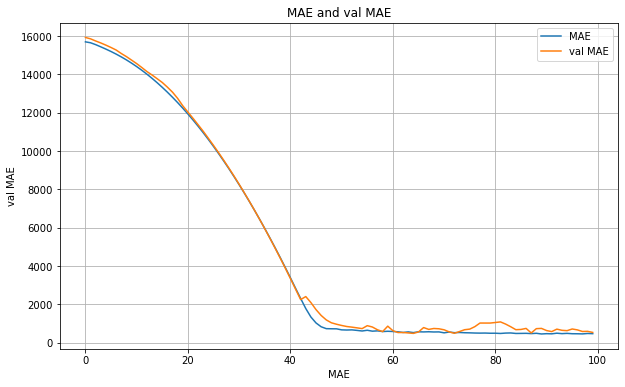

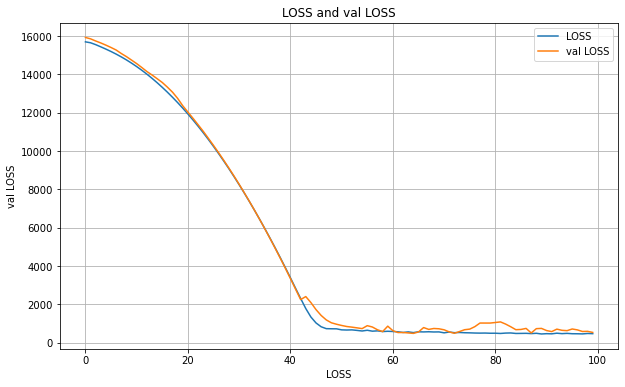

6/6 [==============================] - 1s 35ms/step


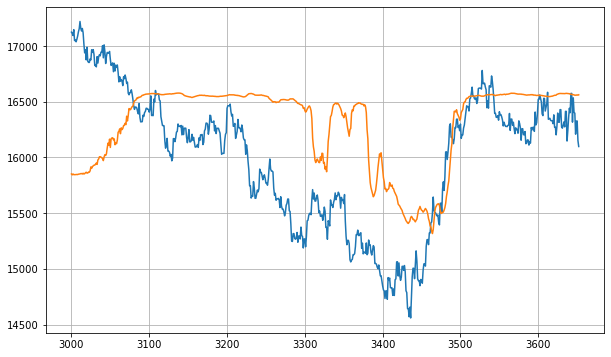

{'mae': 517.3968,
 'mse': 406429.78,
 'rmse': 637.51843,
 'mape': 3.272421,
 'mase': 9.997685}

In [11]:
# Load in best performing model
model_14 = tf.keras.models.load_model("model_experiments/model_14/")
model_14.evaluate(valid_set)

# Get mae and loss from history log
mae=history_14.history['mae']
val_mae=history_14.history['val_mae']
loss=history_14.history['loss']
val_loss=history_14.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_14 = model_forecast(model_14, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_14 = forecast_14.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_14))

eval_model_14 = evaluate_predss(y_true=x_valid,
                               y_pred=results_14)
eval_model_14

In [12]:
model_15 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=[window_size, 1]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.GRU(64, return_sequences=True),
    tf.keras.layers.GRU(64),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_15")

# Get initial weights
init_weights = model_15.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_15.set_weights(init_weights)

model_15.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_15.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_15 = model_15.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_15.name)])

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 64)            256       
                                                                 
 batch_normalization (BatchN  (None, 28, 64)           256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 26, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 26, 64)           256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 26, 64)            0  

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 24s 745ms/step - loss: 15699.6660 - mae: 15700.1670 - val_loss: 15937.1689 - val_mae: 15937.6689
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 15648.6387 - mae: 15649.1396

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 16s 694ms/step - loss: 15648.6387 - mae: 15649.1396 - val_loss: 15840.9248 - val_mae: 15841.4238
Epoch 3/100
24/24 [==============================] - ETA: 0s - loss: 15495.2930 - mae: 15495.7930

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 17s 721ms/step - loss: 15495.2930 - mae: 15495.7930 - val_loss: 15601.3711 - val_mae: 15601.8721
Epoch 4/100
24/24 [==============================] - ETA: 0s - loss: 15154.3438 - mae: 15154.8447

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 17s 732ms/step - loss: 15154.3438 - mae: 15154.8447 - val_loss: 15124.0576 - val_mae: 15124.5566
Epoch 5/100
24/24 [==============================] - ETA: 0s - loss: 14527.4180 - mae: 14527.9180

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 18s 761ms/step - loss: 14527.4180 - mae: 14527.9180 - val_loss: 14304.8701 - val_mae: 14305.3711
Epoch 6/100
24/24 [==============================] - ETA: 0s - loss: 13508.0957 - mae: 13508.5957

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 20s 835ms/step - loss: 13508.0957 - mae: 13508.5957 - val_loss: 13030.4922 - val_mae: 13030.9922
Epoch 7/100
24/24 [==============================] - ETA: 0s - loss: 11975.7734 - mae: 11976.2744

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 19s 806ms/step - loss: 11975.7734 - mae: 11976.2744 - val_loss: 11183.9170 - val_mae: 11184.4170
Epoch 8/100
24/24 [==============================] - ETA: 0s - loss: 9816.3623 - mae: 9816.8623

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 17s 737ms/step - loss: 9816.3623 - mae: 9816.8623 - val_loss: 8650.2188 - val_mae: 8650.7188
Epoch 9/100
24/24 [==============================] - ETA: 0s - loss: 6922.6089 - mae: 6923.1084

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 18s 767ms/step - loss: 6922.6089 - mae: 6923.1084 - val_loss: 5316.5439 - val_mae: 5317.0439
Epoch 10/100
24/24 [==============================] - ETA: 0s - loss: 3204.9458 - mae: 3205.4458

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 18s 756ms/step - loss: 3204.9458 - mae: 3205.4458 - val_loss: 1129.8849 - val_mae: 1130.3849
Epoch 11/100
24/24 [==============================] - ETA: 0s - loss: 1055.5248 - mae: 1056.0247

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 19s 787ms/step - loss: 1055.5248 - mae: 1056.0247 - val_loss: 477.6862 - val_mae: 478.1862
Epoch 12/100
24/24 [==============================] - 7s 299ms/step - loss: 1198.1609 - mae: 1198.6609 - val_loss: 565.3744 - val_mae: 565.8744
Epoch 13/100
24/24 [==============================] - 7s 297ms/step - loss: 1116.6569 - mae: 1117.1566 - val_loss: 529.7275 - val_mae: 530.2275
Epoch 14/100
24/24 [==============================] - 7s 296ms/step - loss: 1151.7975 - mae: 1152.2974 - val_loss: 531.2794 - val_mae: 531.7794
Epoch 15/100
24/24 [==============================] - 7s 297ms/step - loss: 1139.2932 - mae: 1139.7932 - val_loss: 534.5037 - val_mae: 535.0037
Epoch 16/100
24/24 [==============================] - 7s 299ms/step - loss: 1158.2390 - mae: 1158.7389 - val_loss: 528.8876 - val_mae: 529.3876
Epoch 17/100
24/24 [==============================] - 7s 299ms/step - loss: 1143.7053 - mae: 1144.2052 - val_loss: 532.8785 - val_mae: 533.3785
Epoc

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 17s 735ms/step - loss: 939.6591 - mae: 940.1591 - val_loss: 378.4166 - val_mae: 378.9166
Epoch 35/100
24/24 [==============================] - 7s 297ms/step - loss: 936.0443 - mae: 936.5441 - val_loss: 412.2252 - val_mae: 412.7249
Epoch 36/100
24/24 [==============================] - 7s 303ms/step - loss: 916.3619 - mae: 916.8619 - val_loss: 419.1940 - val_mae: 419.6940
Epoch 37/100
24/24 [==============================] - 7s 299ms/step - loss: 906.0806 - mae: 906.5801 - val_loss: 733.4438 - val_mae: 733.9438
Epoch 38/100
24/24 [==============================] - 7s 298ms/step - loss: 894.5548 - mae: 895.0548 - val_loss: 804.4777 - val_mae: 804.9777
Epoch 39/100
24/24 [==============================] - 7s 300ms/step - loss: 910.1652 - mae: 910.6652 - val_loss: 803.4503 - val_mae: 803.9503
Epoch 40/100
24/24 [==============================] - 7s 302ms/step - loss: 925.0659 - mae: 925.5659 - val_loss: 534.1747 - val_mae: 534.6743
Epoch 41/100
24/24

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 17s 736ms/step - loss: 921.0677 - mae: 921.5677 - val_loss: 349.0042 - val_mae: 349.5041
Epoch 43/100
24/24 [==============================] - 8s 324ms/step - loss: 895.6157 - mae: 896.1155 - val_loss: 511.6225 - val_mae: 512.1225
Epoch 44/100
24/24 [==============================] - 8s 321ms/step - loss: 877.6486 - mae: 878.1483 - val_loss: 433.7526 - val_mae: 434.2520
Epoch 45/100
24/24 [==============================] - 8s 329ms/step - loss: 920.8133 - mae: 921.3133 - val_loss: 1551.7640 - val_mae: 1552.2638
Epoch 46/100
24/24 [==============================] - 8s 325ms/step - loss: 910.2543 - mae: 910.7542 - val_loss: 8871.8604 - val_mae: 8872.3604
Epoch 47/100
24/24 [==============================] - 8s 324ms/step - loss: 890.2456 - mae: 890.7453 - val_loss: 8923.6631 - val_mae: 8924.1631
Epoch 48/100
24/24 [==============================] - 8s 319ms/step - loss: 927.7338 - mae: 928.2334 - val_loss: 3206.4788 - val_mae: 3206.9788
Epoch 49/1

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 18s 773ms/step - loss: 911.2531 - mae: 911.7527 - val_loss: 316.4630 - val_mae: 316.9630
Epoch 58/100
24/24 [==============================] - 8s 314ms/step - loss: 894.8386 - mae: 895.3384 - val_loss: 387.5123 - val_mae: 388.0123
Epoch 59/100
24/24 [==============================] - 8s 313ms/step - loss: 876.0293 - mae: 876.5291 - val_loss: 744.7598 - val_mae: 745.2598
Epoch 60/100
24/24 [==============================] - ETA: 0s - loss: 874.6171 - mae: 875.1169

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 17s 733ms/step - loss: 874.6171 - mae: 875.1169 - val_loss: 314.5875 - val_mae: 315.0872
Epoch 61/100
24/24 [==============================] - 8s 311ms/step - loss: 870.7444 - mae: 871.2444 - val_loss: 1832.1914 - val_mae: 1832.6914
Epoch 62/100
24/24 [==============================] - 8s 308ms/step - loss: 902.4680 - mae: 902.9680 - val_loss: 5506.0239 - val_mae: 5506.5239
Epoch 63/100
24/24 [==============================] - 8s 308ms/step - loss: 867.1914 - mae: 867.6914 - val_loss: 800.8297 - val_mae: 801.3297
Epoch 64/100
24/24 [==============================] - 8s 309ms/step - loss: 882.8961 - mae: 883.3959 - val_loss: 719.7851 - val_mae: 720.2851
Epoch 65/100
24/24 [==============================] - 8s 309ms/step - loss: 873.5671 - mae: 874.0669 - val_loss: 638.0403 - val_mae: 638.5403
Epoch 66/100
24/24 [==============================] - 8s 307ms/step - loss: 867.4714 - mae: 867.9714 - val_loss: 568.8978 - val_mae: 569.3978
Epoch 67/100
2

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 19s 826ms/step - loss: 846.8859 - mae: 847.3859 - val_loss: 257.9977 - val_mae: 258.4977
Epoch 69/100
24/24 [==============================] - ETA: 0s - loss: 877.5992 - mae: 878.0992

INFO:tensorflow:Assets written to: model_experiments\model_15\assets


INFO:tensorflow:Assets written to: model_experiments\model_15\assets


24/24 [==============================] - 19s 790ms/step - loss: 877.5992 - mae: 878.0992 - val_loss: 231.7970 - val_mae: 232.2963
Epoch 70/100
24/24 [==============================] - 8s 321ms/step - loss: 861.0651 - mae: 861.5650 - val_loss: 801.4365 - val_mae: 801.9365
Epoch 71/100
24/24 [==============================] - 8s 315ms/step - loss: 836.3889 - mae: 836.8885 - val_loss: 842.2742 - val_mae: 842.7742
Epoch 72/100
24/24 [==============================] - 8s 330ms/step - loss: 877.3710 - mae: 877.8710 - val_loss: 883.2960 - val_mae: 883.7960
Epoch 73/100
24/24 [==============================] - 8s 308ms/step - loss: 867.6558 - mae: 868.1557 - val_loss: 313.7903 - val_mae: 314.2903
Epoch 74/100
24/24 [==============================] - 8s 305ms/step - loss: 861.9431 - mae: 862.4429 - val_loss: 581.1849 - val_mae: 581.6849
Epoch 75/100
24/24 [==============================] - 8s 309ms/step - loss: 866.6719 - mae: 867.1716 - val_loss: 911.7578 - val_mae: 912.2578
Epoch 76/100
24/24

5/5 [==============================] - 2s 91ms/step - loss: 231.7970 - mae: 232.2963


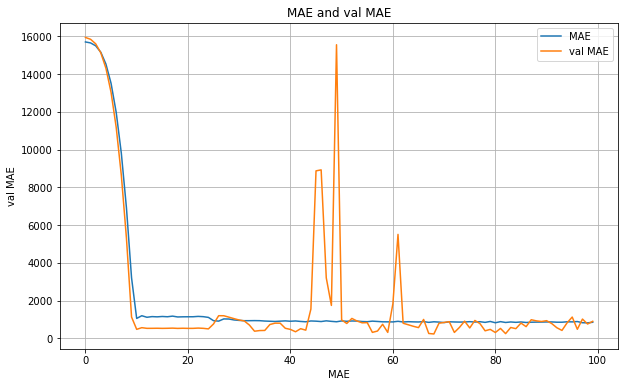

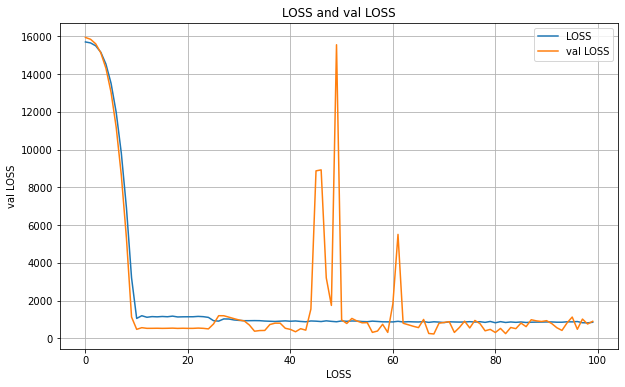

6/6 [==============================] - 1s 77ms/step


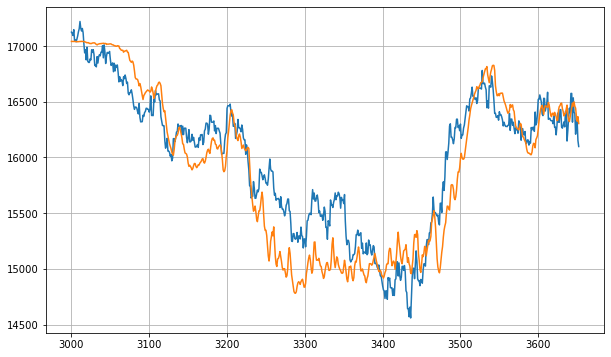

{'mae': 225.75502,
 'mse': 80166.61,
 'rmse': 283.1371,
 'mape': 1.4253772,
 'mase': 4.362276}

In [13]:
# Load in best performing model
model_15 = tf.keras.models.load_model("model_experiments/model_15/")
model_15.evaluate(valid_set)

# Get mae and loss from history log
mae=history_15.history['mae']
val_mae=history_15.history['val_mae']
loss=history_15.history['loss']
val_loss=history_15.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_15 = model_forecast(model_15, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_15 = forecast_15.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_15))

eval_model_15 = evaluate_predss(y_true=x_valid,
                               y_pred=results_15)
eval_model_15

In [80]:
import pandas as pd
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"model_11_gru30_dense1": eval_model_11,
                              "model_12_gru30_dense128,32,10,1": eval_model_12,
                              "model_13_complex": eval_model_13,
                              "model_14_complex": eval_model_14,
                              "model_15_complex": eval_model_15}).T
model_results

,mae,mse,rmse,mape,mase
model_11_gru30_dense1,63.815029,6926.500977,83.225601,0.400934,1.233101
"model_12_gru30_dense128,32,10,1",53.770363,5319.396973,72.934196,0.337550,1.039008
model_13_complex,206.750717,77168.820312,277.792755,1.307244,3.995055
model_14_complex,517.396790,406429.781250,637.518433,3.272421,9.997685
model_15_complex,225.755020,80166.609375,283.137085,1.425377,4.362276


From 15 model we will choose good Model 2,9,12,13,15 to try forecast at least 30 days ahead whether the model is overfitting or not?

1/1 [==============================] - 0s 33ms/step


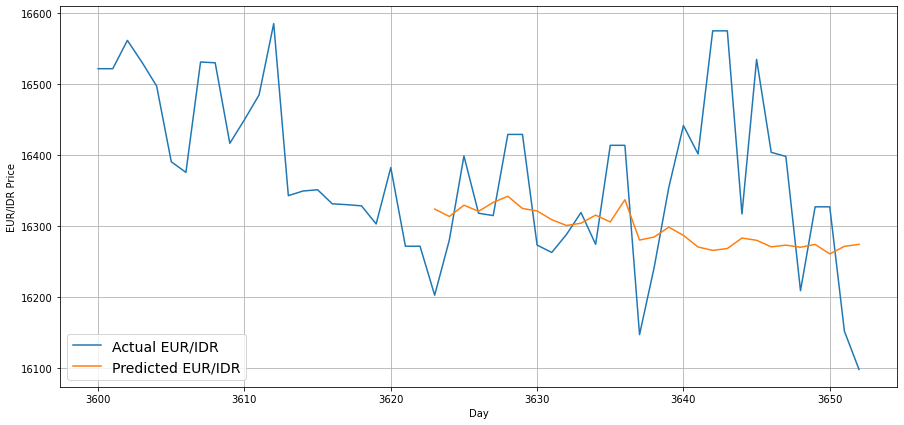

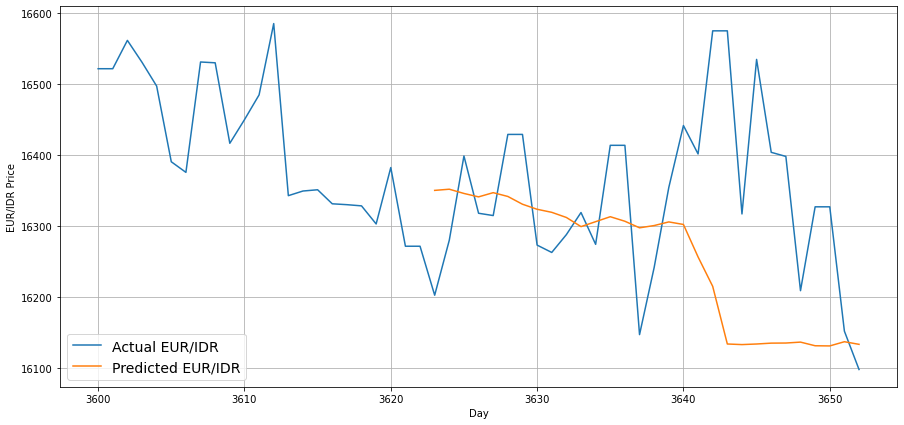

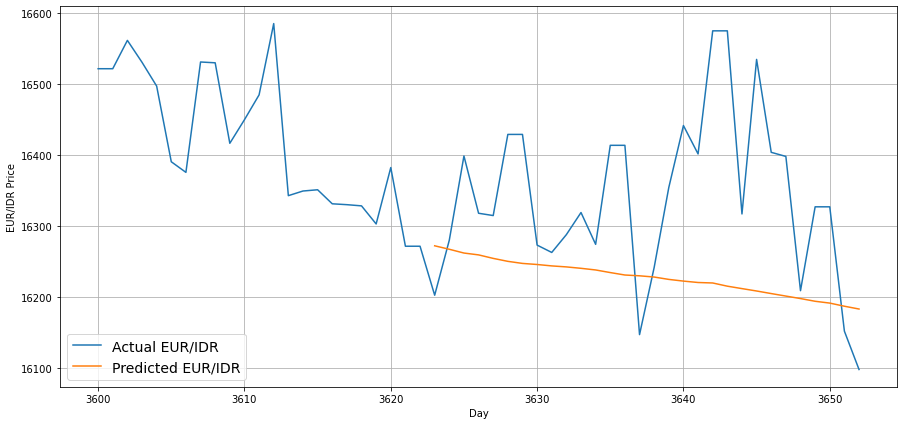

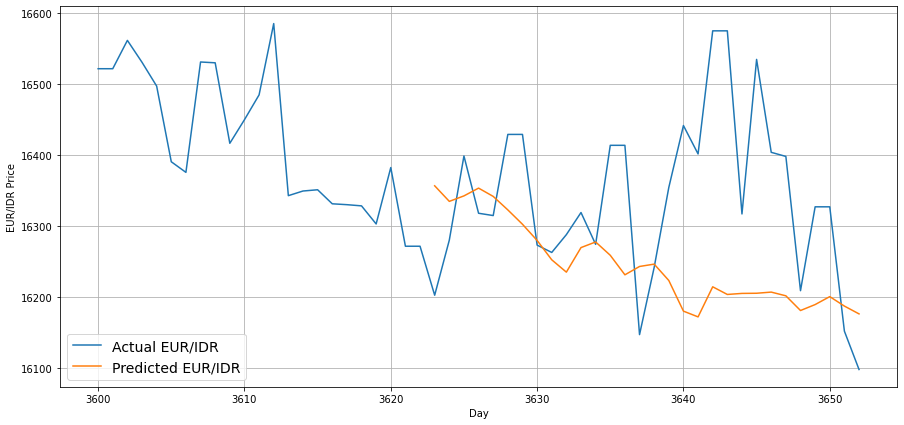

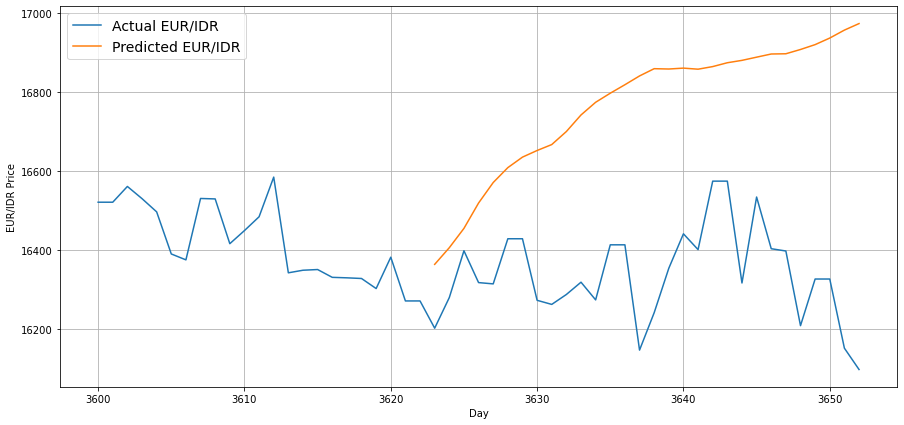

In [96]:
md = [2,9,12,13,15]
eva = []

for i in md:
    # Load the best performing model
    model = tf.keras.models.load_model(f"model_experiments/model_{i}/")
    model.evaluate(valid_set)

    into_future = 30
    future_forecast = make_future_forecast(values=series[:-30],
                                           model=model,
                                           into_future=into_future,
                                           window_size=window_size)
    
#     future_forecast = np.insert(future_forecast, 0, series[-31:])
    
    plt.figure(figsize=(15, 7))
    plot_time_series(time, series, start=3600, format="-", label="Actual EUR/IDR")
    plot_time_series(time[-30:], future_forecast, format="-", label="Predicted EUR/IDR")
    
#     plot_series(time[-31:], (series[:-30], future_forecast))

    eval_model = evaluate_predss(y_true=series[-30:],
                                   y_pred=future_forecast)
    
    eva.append(eval_model)
# ["model_" + str(i)] = tf.keras.models.load_model("model_experiments/model_1/")
# model_1.evaluate(valid_set)

# next_time_steps = np.arange(time[-1] + 1, time[-1] + 1 + into_future)
#     next_time_steps

#     # Insert last timestep/final price into next time steps and future forecasts so the plot connects
#     next_time_steps = np.insert(next_time_steps, 0, time[-1])
#     future_forecast = np.insert(future_forecast, 0, series[-1])

In [100]:
# Create a dictionary using the "md" list as keys and the "eva" list as values
eva_data = {str(m): e for m, e in zip(md, eva)}

# Convert the dictionary into a DataFrame
eva_results = pd.DataFrame.from_dict(eva_data, orient='index')

# Add a column for the row names
eva_results.index.name = 'md'

eva_results

,mae,mse,rmse,mape,mase
md,,,,,
2,97.994171,15740.906250,125.462769,0.598084,1.043635
9,129.199539,29644.759766,172.176544,0.787554,1.375972
12,127.767609,25722.833984,160.383392,0.778437,1.360721
13,123.763474,25927.589844,161.020462,0.754143,1.318078
15,429.082733,222802.234375,472.019318,2.630996,4.569719


based on this result, we will use model 2